In [1]:
# ==============================================================================
# FlowCast Project: 01_data_exploration.ipynb
# 
# เป้าหมาย: ทดลองดึงข้อมูลจาก API กรมชลประทาน (ข้อมูลน้ำในเขื่อน)
# และแปลงให้อยู่ในรูปแบบตาราง (DataFrame) เพื่อสำรวจเบื้องต้น
# ==============================================================================

# 1. Import library ที่จำเป็น
# requests ใช้สำหรับยิง HTTP request ไปยัง API Server
# pandas เป็นเครื่องมือหลักของเราในการจัดการข้อมูลในรูปแบบตาราง
import requests
import pandas as pd

# ตั้งค่าให้ pandas แสดงผลคอลัมน์ทั้งหมด จะได้เห็นข้อมูลครบถ้วน
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

# 2. กำหนด URL ของ API ที่เราต้องการดึงข้อมูล
# นี่คือ API สำหรับข้อมูลอ่างเก็บน้ำ/เขื่อนขนาดใหญ่ของกรมชลประทาน
api_url = "https://app.rid.go.th/reservoir/api/dam/public"

print(f"Attempting to fetch data from: {api_url}")

# 3. ส่งคำขอ (GET request) ไปยัง API และตรวจสอบสถานะ
try:
    response = requests.get(api_url)
    
    # ตรวจสอบว่าการเชื่อมต่อสำเร็จหรือไม่ (Status code 200 คือสำเร็จ)
    response.raise_for_status() 
    
    print(f"✅ Connection successful! (Status code: {response.status_code})")
    
    # 4. แปลงข้อมูลที่ได้จาก JSON format ให้เป็น Python Dictionary
    raw_data = response.json()
    
    # ลองแสดงผลข้อมูลดิบเพื่อดูโครงสร้างคร่าวๆ
    # print("\nRaw JSON data structure:")
    # print(raw_data)

    # 5. แปลงข้อมูลให้อยู่ในรูปแบบตาราง (DataFrame)
    # จากการดูโครงสร้าง JSON เราพบว่าข้อมูลเขื่อนจริงๆ อยู่ใน list ที่ซ้อนกันอยู่ข้างใน
    # เราจึงต้องเจาะเข้าไปเพื่อดึงข้อมูลส่วนนั้นออกมา
    
    all_dams_list = []
    # วนลูปเข้าไปในแต่ละภาค (region)
    for region in raw_data['data']:
        # วนลูปเข้าไปในแต่ละเขื่อน (dam) ของภาคนั้นๆ
        for dam in region['dam']:
            # เพิ่มข้อมูล 'ภาค' เข้าไปในข้อมูลของแต่ละเขื่อน เพื่อให้รู้ว่าเขื่อนนี้อยู่ภาคไหน
            dam['region'] = region['region'] 
            all_dams_list.append(dam)

    # สร้าง DataFrame จาก list ของข้อมูลเขื่อนทั้งหมด
    df = pd.DataFrame(all_dams_list)

    print("\n🎉 Successfully converted JSON to DataFrame!")
    
    # 6. แสดงผลข้อมูลเบื้องต้นเพื่อสำรวจ
    print("\n--- First 5 rows of the data ---")
    display(df.head())
    
    print("\n--- Data types and non-null values ---")
    df.info()

except requests.exceptions.RequestException as e:
    print(f"❌ Failed to connect to the API: {e}")

Libraries imported successfully!
Attempting to fetch data from: https://app.rid.go.th/reservoir/api/dam/public
✅ Connection successful! (Status code: 200)

🎉 Successfully converted JSON to DataFrame!

--- First 5 rows of the data ---


,id,name,owner,capacity,storage,active_storage,dead_storage,volume,percent_storage,inflow,outflow,region
0,100104,เขื่อนแม่กวงอุดมธารา,กรมชลประทาน,295.00,263.00,249.00,14.00,186.34,70.85,1.22,0.36,ภาคเหนือ
1,100105,เขื่อนกิ่วลม,กรมชลประทาน,106.22,106.22,102.67,3.55,61.18,57.60,5.25,4.10,ภาคเหนือ
2,100106,เขื่อนกิ่วคอหมา,กรมชลประทาน,208.60,170.00,163.80,6.20,99.54,58.55,1.50,1.80,ภาคเหนือ
3,100107,เขื่อนแควน้อยบำรุงแดน,กรมชลประทาน,1080.00,939.00,896.00,43.00,652.25,69.46,36.80,1.30,ภาคเหนือ
4,100108,เขื่อนแม่มอก,กรมชลประทาน,110.00,110.00,94.10,15.90,112.80,102.55,1.48,2.60,ภาคเหนือ



--- Data types and non-null values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               35 non-null     object 
 1   name             35 non-null     object 
 2   owner            35 non-null     object 
 3   capacity         35 non-null     float64
 4   storage          35 non-null     float64
 5   active_storage   35 non-null     float64
 6   dead_storage     35 non-null     float64
 7   volume           35 non-null     float64
 8   percent_storage  35 non-null     float64
 9   inflow           35 non-null     float64
 10  outflow          30 non-null     float64
 11  region           35 non-null     object 
dtypes: float64(8), object(4)
memory usage: 3.4+ KB


Libraries imported and Thai font configured for plotting!
Attempting to download zip file from: https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip
✅ Zip file downloaded successfully.
🎉 Success! Shapefile loaded with correct Thai encoding.

--- First 5 rows of the data (with correct Thai) ---


,OBJECTID,AREA,dcode,dname,dname_e,pcode,pname,num_male,num_female,num_school,num_hos,num_comm,num_temple,num_health,geometry
0,29,11804564.0,1025,เขตบางพลัด,Bang Phlat,10,กรุงเทพมหานคร,45904.0,53249.0,11.0,0.0,46.0,23.0,1.0,"POLYGON ((663924.794 1526162.057, 663895.856 1..."
1,30,16319268.0,1017,เขตห้วยขวาง,Huai Khwang,10,กรุงเทพมหานคร,35884.0,42323.0,3.0,0.0,25.0,3.0,2.0,"POLYGON ((671711.864 1526487.438, 671710.552 1..."
2,31,17075578.0,1045,เขตวังทองหลาง,Wang Thong Lang,10,กรุงเทพมหานคร,52758.0,61990.0,3.0,0.0,19.0,1.0,0.0,"POLYGON ((674358.118 1525633.939, 674369.43 15..."
3,32,51732144.0,1048,เขตทวีวัฒนา,Thawi Watthana,10,กรุงเทพมหานคร,35487.0,40787.0,7.0,0.0,16.0,3.0,1.0,"POLYGON ((650975.092 1526253.298, 651115.593 1..."
4,33,128628048.0,1011,เขตลาดกระบัง,Lat Krabang,10,กรุงเทพมหานคร,78158.0,85159.0,20.0,1.0,63.0,13.0,2.0,"POLYGON ((694058.076 1525667.706, 694060.576 1..."



--- Plotting Bangkok Districts Map (with correct Thai title) ---


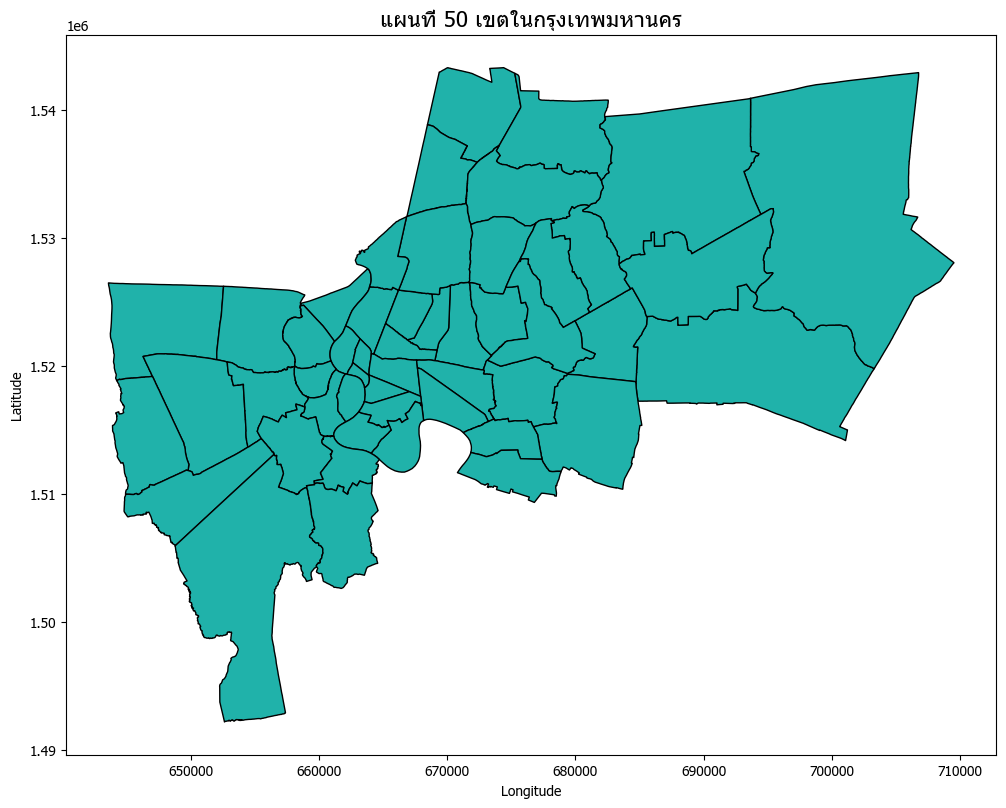

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
import io

# --- 1. ตั้งค่าให้ Matplotlib รู้จักฟอนต์ภาษาไทย ---
# เราจะตั้งค่าฟอนต์เริ่มต้นสำหรับทุกกราฟที่จะวาดหลังจากนี้
# หมายเหตุ: ชื่อฟอนต์อาจแตกต่างกันไปในแต่ละเครื่อง (macOS/Windows)
# ลองใช้ 'Tahoma', 'Leelawadee UI', หรือ 'TH SarabunPSK'
plt.rcParams['font.family'] = 'Tahoma'
print("Libraries imported and Thai font configured for plotting!")

# 2. กำหนด URL สำหรับดาวน์โหลดไฟล์ .zip
zip_file_url = "https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip"

print(f"Attempting to download zip file from: {zip_file_url}")

try:
    # 3. ดาวน์โหลดและแตกไฟล์ในหน่วยความจำ
    response = requests.get(zip_file_url)
    response.raise_for_status()
    zip_in_memory = io.BytesIO(response.content)
    print("✅ Zip file downloaded successfully.")

    # 4. **จุดแก้ไขสำคัญ:** เพิ่ม encoding='TIS-620' ตอนอ่านไฟล์
    # TIS-620 คือมาตรฐานการเข้ารหัสภาษาไทยที่นิยมใช้ในไฟล์จากหน่วยงานราชการ
    gdf_bkk = gpd.read_file(zip_in_memory, encoding='TIS-620')

    print("🎉 Success! Shapefile loaded with correct Thai encoding.")

    # 5. แสดงผลข้อมูลและแผนที่
    print("\n--- First 5 rows of the data (with correct Thai) ---")
    display(gdf_bkk.head())

    print("\n--- Plotting Bangkok Districts Map (with correct Thai title) ---")
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    gdf_bkk.plot(ax=ax, edgecolor='black', facecolor='lightseagreen')
    
    ax.set_title("แผนที่ 50 เขตในกรุงเทพมหานคร", fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.show()

except Exception as e:
    print(f"❌ An error occurred: {e}")

In [24]:
# ==============================================================================
# FlowCast Project: Exploring Bangkok Canal Data (Fixing Encoding)
#
# เป้าหมาย: โหลดข้อมูลคลองในกรุงเทพฯ โดยใช้ encoding ที่ถูกต้อง
# ==============================================================================

import pandas as pd

print("Library imported successfully!")

# 1. กำหนด URL สำหรับดาวน์โหลดไฟล์ .csv
canal_csv_url = "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/06ca01be-1c1f-419d-a514-e05cd0557484/download/canal.csv"

print(f"Attempting to load CSV data from: {canal_csv_url}")

try:
    # 2. **จุดแก้ไขสำคัญ:** เปลี่ยน encoding เป็น 'utf-8'
    # UTF-8 เป็นมาตรฐานสากลที่รองรับตัวอักษรได้หลากหลายภาษา
    df_canals = pd.read_csv(canal_csv_url, encoding='utf-8')

    print("✅ Success! Canal data loaded into DataFrame.")

    # 3. แสดงผลข้อมูลเบื้องต้นเพื่อทำความเข้าใจ
    print("\n--- First 5 rows of the canal data ---")
    display(df_canals.head())

    print("\n--- Data types, non-null values, and memory usage ---")
    df_canals.info()
    
    # 4. ลองดูข้อมูลสรุปทางสถิติ
    print("\n--- Descriptive statistics ---")
    display(df_canals.describe())

except UnicodeDecodeError:
    print("❌ Failed to decode using 'utf-8'. The file might have a different encoding.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

Library imported successfully!
Attempting to load CSV data from: https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/06ca01be-1c1f-419d-a514-e05cd0557484/download/canal.csv
✅ Success! Canal data loaded into DataFrame.

--- First 5 rows of the canal data ---


,id_canal,name_canal,Water Storage,TEMP_54,TEMP_55,TEMP_56,TEMP_57,pH_54,pH_55,pH_56,pH_57,DO_54,DO_55,DO_56,DO_57,H2S_54,H2S_55,H2S_56,H2S_57,BOD_54,BOD_55,BOD_56,BOD_57,COD_54,COD_55,COD_56,COD_57,SS_54,SS_55,SS_56,SS_57,TKN_54,TKN_55,TKN_56,TKN_57,NH3N_54,NH3N_55,NH3N_56,NH3N_57,NO2_54,NO2_55,NO2_56,NO2_57,NO3_54,NO3_55,NO3_56,NO3_57,T-P_54,T-P_55,T-P_56,T-P_57
0,1,คลองกรวย,ซ.เจริญกรุง 71,28.8,29.1,29.4,29.8,7.0,6.9,7.4,7.2,0.9,0.0,1.5,1.0,0.2,0.2,1.0,0.2,18.8,38.2,17.5,25.4,71.3,199.1,193.8,109.5,20.2,84.5,24.9,34.2,11.4,11.0,11.2,10.9,7.8,7.5,8.3,7.9,0.1,0.2,0.2,0.2,2.2,2.2,2.8,2.5,0.6,1.3,1.0,1.1
1,2,คลองกุ่ม,หมู่บ้านสหกรณ์ (ซ.28),29.4,29.0,29.4,29.3,7.1,7.2,7.5,7.5,0.7,0.5,0.0,0.5,0.2,0.1,2.4,2.5,20.2,32.5,36.1,24.5,77.0,121.3,246.4,93.3,25.1,32.6,27.8,25.5,9.5,13.7,25.9,23.7,6.1,11.0,23.2,18.8,0.0,0.1,0.1,0.0,2.5,2.4,2.6,2.8,0.9,1.4,1.7,1.3
2,3,คลองกุ่ม,ถ.สุขาภิบาล 2,29.4,29.0,29.4,29.3,7.1,7.1,7.5,7.4,0.6,2.1,1.9,1.5,0.2,0.1,0.1,1.3,18.3,14.5,13.8,18.1,69.3,84.0,97.8,73.6,27.0,27.2,22.3,21.3,8.9,10.0,13.2,16.6,6.0,6.1,9.5,13.4,0.1,0.4,0.3,0.2,2.6,2.1,2.2,2.7,0.8,1.0,1.3,1.3
3,4,คลองเกร็ด,ถ.ปัญญา - เนเจอรัลปาร์ค,30.7,29.3,29.6,29.0,7.0,7.0,7.3,7.2,0.9,0.6,0.1,0.1,0.8,0.1,1.4,3.1,12.4,10.4,11.4,14.4,38.9,58.2,83.5,56.5,9.0,21.5,10.9,11.2,7.7,7.5,14.4,13.7,4.4,4.8,11.2,11.4,0.1,0.2,0.3,0.1,2.5,2.2,2.3,2.6,0.5,0.8,1.2,1.0
4,5,คลองขวาง,ถ.เจริญกรุง 72,28.8,29.1,29.4,29.8,7.1,6.9,7.4,7.2,0.4,0.5,0.1,0.3,0.2,0.2,1.2,0.4,21.2,24.9,28.9,24.1,73.3,93.2,140.6,90.1,18.7,39.1,18.4,23.4,12.4,9.1,15.2,12.9,8.8,6.0,12.5,10.2,0.1,0.2,0.2,0.1,2.6,1.9,2.3,2.3,0.7,1.1,1.2,1.6



--- Data types, non-null values, and memory usage ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_canal       303 non-null    int64  
 1   name_canal     303 non-null    object 
 2   Water Storage  303 non-null    object 
 3   TEMP_54        303 non-null    float64
 4   TEMP_55        303 non-null    float64
 5   TEMP_56        303 non-null    float64
 6   TEMP_57        303 non-null    float64
 7   pH_54          303 non-null    float64
 8   pH_55          303 non-null    float64
 9   pH_56          303 non-null    float64
 10  pH_57          303 non-null    float64
 11  DO_54          303 non-null    float64
 12  DO_55          303 non-null    float64
 13  DO_56          303 non-null    float64
 14  DO_57          303 non-null    float64
 15  H2S_54         303 non-null    float64
 16  H2S_55         303 non-null    float64
 17 

,id_canal,TEMP_54,TEMP_55,TEMP_56,TEMP_57,pH_54,pH_55,pH_56,pH_57,DO_54,DO_55,DO_56,DO_57,H2S_54,H2S_55,H2S_56,H2S_57,BOD_54,BOD_55,BOD_56,BOD_57,COD_54,COD_55,COD_56,COD_57,SS_54,SS_55,SS_56,SS_57,TKN_54,TKN_55,TKN_56,TKN_57,NH3N_54,NH3N_55,NH3N_56,NH3N_57,NO2_54,NO2_55,NO2_56,NO2_57,NO3_54,NO3_55,NO3_56,NO3_57,T-P_54,T-P_55,T-P_56,T-P_57
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,27.823762,27.687459,27.877228,29.560726,6.721122,6.663696,6.975248,7.238944,1.634983,1.846535,1.877228,1.615842,0.163036,0.054455,0.269307,0.507921,9.562376,10.558086,10.131023,12.404950,51.779868,60.416502,89.042904,63.295710,18.825083,25.153465,19.157756,23.074257,5.339604,5.175248,7.073927,8.313861,2.833663,2.757426,4.580528,5.549175,0.232343,0.267987,0.234323,0.169637,1.779208,1.674917,1.810891,1.861386,0.717822,0.818812,0.982838,0.970957
std,87.612784,7.045817,7.007421,7.039715,1.759706,1.703682,1.692954,1.758559,0.442975,1.158883,1.303223,1.375896,1.147621,0.340461,0.109355,0.480909,0.990286,6.922880,9.378392,8.153979,9.108017,23.648458,30.356543,45.648188,28.852554,9.521055,25.891674,15.045694,16.763538,3.458211,3.381447,4.680134,5.777257,2.684920,2.689248,4.173099,4.557171,0.259029,0.158422,0.147417,0.113065,0.941218,0.836243,1.024912,0.881559,0.506722,0.541224,0.527868,0.434309
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.500000,28.800000,28.850000,29.100000,29.300000,7.000000,6.900000,7.300000,7.200000,0.650000,0.600000,0.600000,0.600000,0.000000,0.000000,0.000000,0.000000,5.850000,5.550000,6.000000,7.700000,36.850000,45.100000,62.250000,51.150000,13.700000,15.300000,13.300000,17.300000,2.900000,2.700000,2.800000,3.000000,0.800000,0.800000,1.000000,1.100000,0.100000,0.200000,0.100000,0.100000,0.700000,0.850000,0.550000,1.700000,0.400000,0.400000,0.600000,0.700000
50%,152.000000,29.400000,29.200000,29.500000,29.700000,7.100000,7.000000,7.400000,7.200000,1.600000,2.000000,2.000000,1.600000,0.000000,0.000000,0.000000,0.100000,8.000000,7.800000,7.600000,10.200000,51.500000,57.500000,83.000000,58.300000,17.700000,22.600000,15.500000,20.800000,4.800000,4.400000,6.500000,7.800000,2.300000,1.700000,3.900000,5.000000,0.100000,0.200000,0.200000,0.100000,2.100000,2.000000,2.100000,2.100000,0.600000,0.700000,1.000000,0.900000
75%,227.500000,30.300000,29.400000,30.000000,30.000000,7.200000,7.200000,7.500000,7.400000,2.500000,2.900000,2.900000,2.400000,0.200000,0.100000,0.350000,0.700000,11.150000,12.250000,11.850000,13.150000,65.650000,70.900000,111.300000,69.300000,22.650000,28.750000,20.900000,24.300000,7.000000,6.950000,10.150000,11.400000,3.800000,4.300000,7.200000,8.450000,0.300000,0.400000,0.300000,0.200000,2.400000,2.200000,2.500000,2.400000,0.900000,1.300000,1.350000,1.300000
max,303.000000,30.900000,31.200000,31.100000,30.700000,7.800000,7.600000,7.800000,7.900000,4.600000,6.700000,6.500000,5.900000,2.700000,0.600000,3.100000,11.600000,52.500000,61.400000,47.500000,103.300000,173.600000,199.100000,287.500000,361.300000,62.300000,402.500000,181.800000,276.000000,22.300000,17.100000,25.900000,56.900000,17.200000,13.200000,23.200000,25.400

Libraries imported successfully!
Attempting to download flood points data from: https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip
✅ Flood points zip file downloaded successfully.
🎉 Success! Flood points data loaded into GeoDataFrame.

--- First 5 rows of the flood points data ---


,id_flood,location,dcode,scode,geometry
0,001,จุดอ่อนน้ำท่วมดอนเมืองอนุสรสถาน,1036,103605,POINT (674982.813 1542933.854)
1,002,จุดอ่อนน้ำท่วมแจ้งวัฒนะ,1041,104105,POINT (668776.356 1536365.74)
2,003,จุดอ่อนน้ำท่วมพหลโยธินแยกเกษตร,1030,103001,POINT (670138.195 1530585.771)
3,004,จุดอ่อนน้ำท่วมลาดพร้าว บางกะปิ นวมินทร์,1006,100601,POINT (678159.488 1522497.853)
4,005,ขุดอ่อนน้ำท่วมพหลโยธินสนามเป้า,1014,101401,POINT (666492.959 1522607.488)



--- Plotting Flood Vulnerability Points on Bangkok Map ---


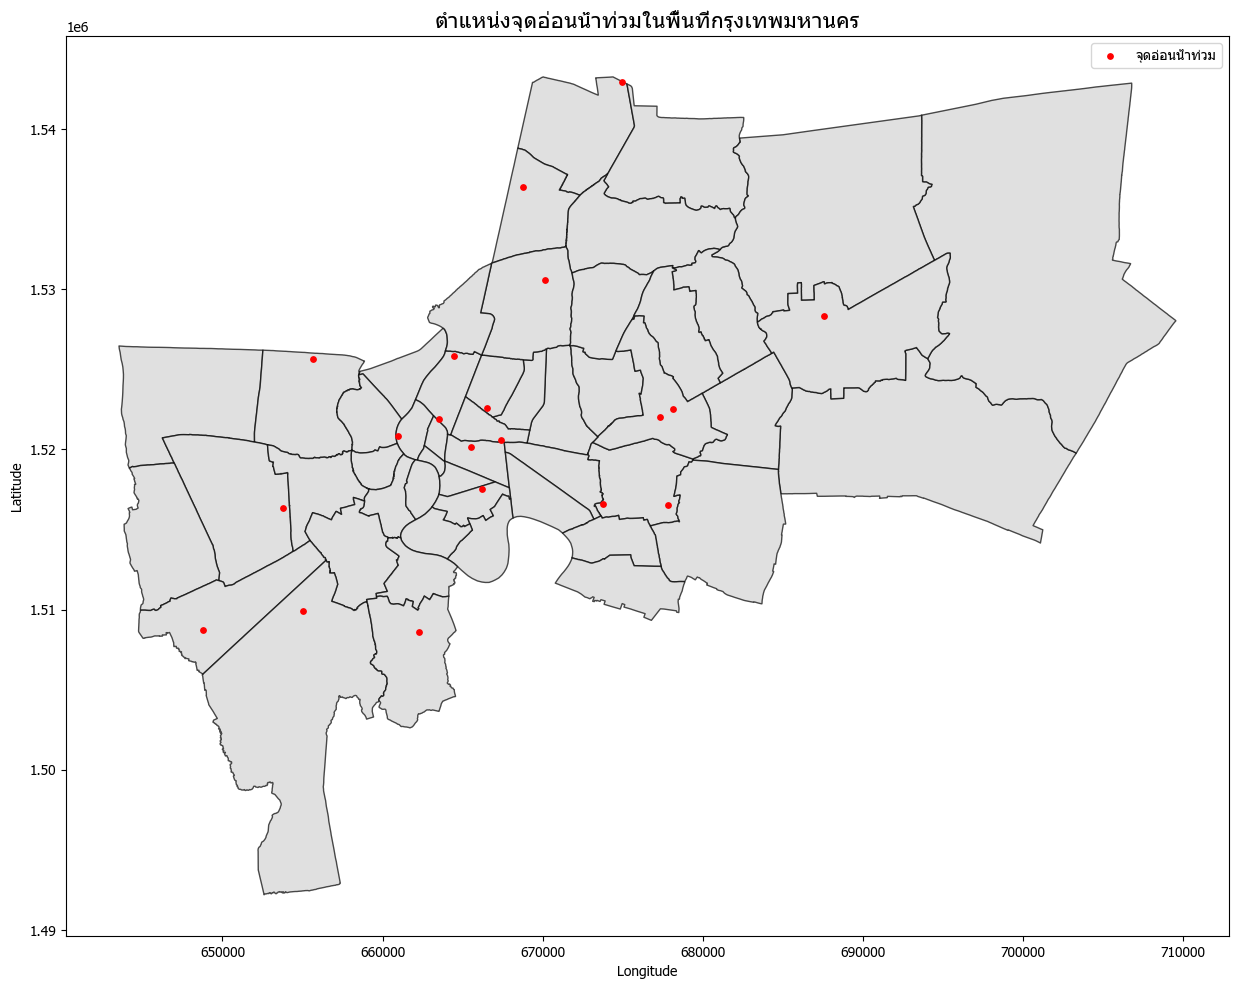

In [25]:
# ==============================================================================
# FlowCast Project: Exploring Flood Vulnerability Points
#
# เป้าหมาย: โหลดข้อมูลจุดอ่อนน้ำท่วม และนำมาแสดงผลบนแผนที่เขตของกรุงเทพฯ
# ==============================================================================

import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
import io

print("Libraries imported successfully!")

# 1. กำหนด URL สำหรับดาวน์โหลดไฟล์ .zip ของจุดอ่อนน้ำท่วม
flood_points_url = "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip"

print(f"Attempting to download flood points data from: {flood_points_url}")

try:
    # 2. ดาวน์โหลดและแตกไฟล์ในหน่วยความจำ
    response = requests.get(flood_points_url)
    response.raise_for_status()
    zip_in_memory = io.BytesIO(response.content)
    print("✅ Flood points zip file downloaded successfully.")

    # 3. โหลดข้อมูล Shapefile ของจุดอ่อนน้ำท่วม (ลองใช้ TIS-620 ก่อน)
    gdf_flood_points = gpd.read_file(zip_in_memory, encoding='TIS-620')
    print("🎉 Success! Flood points data loaded into GeoDataFrame.")

    # 4. แสดงผลข้อมูลเบื้องต้น
    print("\n--- First 5 rows of the flood points data ---")
    display(gdf_flood_points.head())

    # 5. **ขั้นตอนสำคัญ:** แสดงผลข้อมูลจุดอ่อนน้ำท่วมลงบนแผนที่เขต
    print("\n--- Plotting Flood Vulnerability Points on Bangkok Map ---")
    
    # สร้าง Figure และ Axes สำหรับวาดแผนที่
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    
    # วาดแผนที่เขตเป็นพื้นหลัง (Base map) - ใช้ตัวแปร gdf_bkk จาก cell ก่อนหน้า
    gdf_bkk.plot(ax=ax, edgecolor='black', facecolor='lightgray', alpha=0.7)
    
    # วาดข้อมูลจุดอ่อนน้ำท่วมทับลงไป
    gdf_flood_points.plot(ax=ax, marker='o', color='red', markersize=15, label='จุดอ่อนน้ำท่วม')
    
    ax.set_title("ตำแหน่งจุดอ่อนน้ำท่วมในพื้นที่กรุงเทพมหานคร", fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()
    plt.show()

except Exception as e:
    print(f"❌ An error occurred: {e}")

In [32]:
# ==============================================================================
# FlowCast Project: Master Data Retrieval Script via CKAN API
#
# เป้าหมาย: ดึง URL ดาวน์โหลดของชุดข้อมูลสำคัญทั้งหมดที่เราต้องการโดยอัตโนมัติ
# ==============================================================================

import requests
import pprint

print("Libraries imported successfully!")

# 1. รายชื่อชุดข้อมูลเป้าหมายของเรา (ใช้ชื่อสั้นๆ จาก URL ที่คุณให้มา)
dataset_names = [
    "50",            # ขอบเขต 50 เขต
    "floodpoint",    # จุดอ่อนน้ำท่วม
    "pumpstation",   # สถานีสูบน้ำ
    "floodgate",     # ประตูระบายน้ำ
    "canal",         # คลอง
    "bmazone"        # กลุ่มเขต
]

# 2. กำหนด API Endpoint ของ BMA Data Portal
ckan_api_base_url = "https://data.bangkok.go.th/api/3/action/"
action = "package_search"
search_url = ckan_api_base_url + action

print("--- Starting Data Retrieval Mission ---")

# 3. วนลูปเพื่อค้นหาข้อมูลแต่ละชุด
for name in dataset_names:
    print(f"\n🔎 Searching for dataset: '{name}'...")
    
    params = {"q": name}
    
    try:
        response = requests.get(search_url, params=params)
        response.raise_for_status()
        search_data = response.json()
        
        if search_data.get("success") and search_data['result']['results']:
            # เอาผลลัพธ์ที่ตรงที่สุด (อันแรก)
            dataset = search_data['result']['results'][0]
            
            print(f"  ✅ Found Dataset: {dataset.get('title')}")
            
            if dataset.get('resources'):
                print("  --- Downloadable Resources ---")
                for resource in dataset['resources']:
                    # เราจะสนใจไฟล์ที่เป็น Shapefile (zip) หรือ CSV เป็นพิเศษ
                    res_format = resource.get('format', 'N/A').upper()
                    if res_format in ['SHP', 'ZIP', 'CSV']:
                        print(f"    - Format: {res_format}")
                        print(f"      Name: {resource.get('name')}")
                        print(f"      URL: {resource.get('url')}")
            else:
                print("    - No downloadable resources found.")
        else:
            print(f"  ❌ Dataset '{name}' not found.")

    except requests.exceptions.RequestException as e:
        print(f"  ❌ An error occurred for '{name}': {e}")

print("\n--- Data Retrieval Mission Complete ---")

Libraries imported successfully!
--- Starting Data Retrieval Mission ---

🔎 Searching for dataset: '50'...
  ✅ Found Dataset: พื้นที่เขตปกครอง 50 เขตของกรุงเทพมหานคร
  --- Downloadable Resources ---
    - Format: CSV
      Name: พื้นที่เขตปกครอง 50 เขตของกรุงเทพมหานคร
      URL: https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/7bf56a08-044f-4287-b10e-c2beefccdfcc/download/50district.csv

🔎 Searching for dataset: 'floodpoint'...
  ✅ Found Dataset: จุดอ่อนน้ำท่วมในพื้นที่เขตกรุงเทพมหานคร
  --- Downloadable Resources ---
    - Format: ZIP
      Name: จุดอ่อนน้ำท่วมในพื้นที่เขตกรุงเทพมหานคร
      URL: https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip

🔎 Searching for dataset: 'pumpstation'...
  ✅ Found Dataset: ที่ตั้งบ่อสูบน้ำในพื้นที่กรุงเทพมหานคร
  --- Downloadable Resources ---
    - Format: ZIP
      Name: ที่ตั้งบ่อสูบน้ำในพื้นที่กรุงเทพมหานคร
      URL: https:

In [ ]:
# ==============================================================================
# FlowCast Project: 03_Data_Loading_and_Integration.ipynb
#
# เป้าหมาย: โหลดชุดข้อมูลสำคัญทั้งหมดจาก URL ที่เราได้มา
#          และเตรียมพร้อมสำหรับขั้นตอนการทำความสะอาดและเชื่อมโยงข้อมูล
# ==============================================================================

import pandas as pd
import geopandas as gpd
import requests
import io

print("Libraries imported successfully!")

# 1. สร้าง "แคตตาล็อกข้อมูล" ของเราจาก URL ที่หามาได้
data_urls = {
    "districts": {
        "url": "https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip",
        "type": "shapefile"
    },
    "flood_points": {
        "url": "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip",
        "type": "shapefile"
    },
    "flood_gate": {
        "url": "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/floodgate.zip",
        "type": "csv"
    },
    "pump_stations": {
        "url": "https://data.bangkok.go.th/dataset/82cb9fcc-ddea-436a-abfa-eb5dc9fc85fc/resource/739e6a23-3aa7-4b84-bbfb-bc8fd7cd692b/download/pump_sta.zip",
        "type": "shapefile"
    },
     "canals": {
        "url": "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/06ca01be-1c1f-419d-a514-e05cd0557484/download/canal.csv",
        "type": "csv"
    }
    # เราสามารถเพิ่มข้อมูลประตูระบายน้ำ (floodgate) เข้ามาได้อีกในอนาคต
}

# 2. สร้าง Dictionary ว่างๆ เพื่อเก็บ DataFrame ของเรา
dataframes = {}

print("--- Starting Data Loading Process ---")

# 3. วนลูปเพื่อโหลดข้อมูลแต่ละชุด
for name, info in data_urls.items():
    print(f"\n⏳ Loading '{name}' data...")
    try:
        if info['type'] == 'shapefile':
            # ใช้เทคนิคเดิมในการโหลด Shapefile จาก zip ใน memory
            response = requests.get(info['url'])
            response.raise_for_status()
            zip_in_memory = io.BytesIO(response.content)
            # ใช้ TIS-620 เป็น encoding เริ่มต้นสำหรับ Shapefile
            df = gpd.read_file(zip_in_memory, encoding='TIS-620')
        
        elif info['type'] == 'csv':
            # ใช้ UTF-8 เป็น encoding เริ่มต้นสำหรับ CSV
            df = pd.read_csv(info['url'], encoding='utf-8')
            
        # เก็บ DataFrame ที่โหลดสำเร็จแล้วเข้าไปใน Dictionary
        dataframes[name] = df
        print(f"  ✅ Successfully loaded '{name}' data.")
        
    except Exception as e:
        print(f"  ❌ Failed to load '{name}' data. Error: {e}")

print("\n--- Data Loading Process Complete ---")

# 4. แสดงผลเพื่อตรวจสอบว่าข้อมูลทุกชุดเข้ามาครบถ้วน
print("\n--- Verifying Loaded DataFrames ---")
for name, df in dataframes.items():
    print(f"\n--- {name.upper()} Data ---")
    print(f"Shape: {df.shape}")
    display(df.head(3))

In [29]:
# ==============================================================================
# FlowCast Project: Data Preprocessing Step 1 - Check CRS
#
# เป้าหมาย: ตรวจสอบระบบพิกัด (CRS) ของ GeoDataFrames ทั้งหมด
# ==============================================================================

print("--- Checking Coordinate Reference Systems (CRS) ---")

# ดึง GeoDataFrame จาก Dictionary ของเรา
gdf_districts = dataframes['districts']
gdf_flood_points = dataframes['flood_points']
gdf_pump_stations = dataframes['pump_stations']

# พิมพ์ค่า CRS ของแต่ละ GeoDataFrame ออกมาดู
print(f"Districts CRS:      {gdf_districts.crs}")
print(f"Flood Points CRS:   {gdf_flood_points.crs}")
print(f"Pump Stations CRS:  {gdf_pump_stations.crs}")

# ตรวจสอบว่า CRS ทั้งหมดตรงกันหรือไม่
if gdf_districts.crs == gdf_flood_points.crs == gdf_pump_stations.crs:
    print("\n✅ Success! All geospatial datasets share the same CRS.")
else:
    print("\n⚠️ Warning! CRS mismatch detected. They need to be standardized.")

--- Checking Coordinate Reference Systems (CRS) ---
Districts CRS:      EPSG:32647
Flood Points CRS:   EPSG:32647
Pump Stations CRS:  EPSG:32647

✅ Success! All geospatial datasets share the same CRS.


In [30]:
# ==============================================================================
# FlowCast Project: Feature Engineering Step 1 - Spatial Joins
#
# เป้าหมาย: สร้างฟีเจอร์ใหม่โดยการนับจำนวนจุดอ่อนน้ำท่วมและสถานีสูบน้ำในแต่ละเขต
# ==============================================================================

print("--- Starting Feature Engineering: Spatial Joins ---")

# 1. เตรียม GeoDataFrames จาก Dictionary ของเรา
gdf_districts = dataframes['districts'].copy() # ใช้ .copy() เพื่อป้องกันการแก้ไขข้อมูลต้นฉบับ
gdf_flood_points = dataframes['flood_points'].copy()
gdf_pump_stations = dataframes['pump_stations'].copy()

# 2. ทำ Spatial Join เพื่อหาว่าแต่ละ "จุด" อยู่ใน "เขต" ไหน
#    เราจะ join จุดอ่อนน้ำท่วม (points) เข้ากับแผนที่เขต (polygons)
joined_flood_points = gpd.sjoin(gdf_flood_points, gdf_districts, how="inner", predicate='within')
print("✅ Spatial join for flood points complete.")

#    ทำเช่นเดียวกันกับสถานีสูบน้ำ
joined_pump_stations = gpd.sjoin(gdf_pump_stations, gdf_districts, how="inner", predicate='within')
print("✅ Spatial join for pump stations complete.")

# 3. นับจำนวนจุดในแต่ละเขต
#    เราจะนับว่าชื่อเขต (dname) แต่ละชื่อปรากฏขึ้นกี่ครั้งหลังจากการ join
flood_point_counts = joined_flood_points['dname'].value_counts().reset_index()
flood_point_counts.columns = ['dname', 'flood_point_count'] # เปลี่ยนชื่อคอลัมน์ให้อ่านง่าย

pump_station_counts = joined_pump_stations['dname'].value_counts().reset_index()
pump_station_counts.columns = ['dname', 'pump_station_count'] # เปลี่ยนชื่อคอลัมน์

# 4. นำฟีเจอร์ใหม่ที่ได้กลับไปรวมกับตารางข้อมูลเขตหลัก
gdf_districts = gdf_districts.merge(flood_point_counts, on='dname', how='left')
gdf_districts = gdf_districts.merge(pump_station_counts, on='dname', how='left')

# 5. จัดการเขตที่ไม่มีจุดอ่อนหรือสถานีสูบน้ำ (จะได้ค่าเป็น NaN) โดยเติม 0 แทน
gdf_districts['flood_point_count'] = gdf_districts['flood_point_count'].fillna(0).astype(int)
gdf_districts['pump_station_count'] = gdf_districts['pump_station_count'].fillna(0).astype(int)

print("\n🎉 Success! New features created and merged.")

# 6. แสดงผล DataFrame ที่มีฟีเจอร์ใหม่เพิ่มเข้ามา
print("\n--- Districts DataFrame with new features ---")
display(gdf_districts[['dname', 'flood_point_count', 'pump_station_count']].sort_values(by='flood_point_count', ascending=False).head(10))

--- Starting Feature Engineering: Spatial Joins ---
✅ Spatial join for flood points complete.
✅ Spatial join for pump stations complete.

🎉 Success! New features created and merged.

--- Districts DataFrame with new features ---


,dname,flood_point_count,pump_station_count
48,เขตบางกะปิ,2,0
7,เขตดุสิต,2,2
16,เขตสวนหลวง,2,0
49,เขตทุ่งครุ,1,0
12,เขตพระนคร,1,1
27,เขตสาทร,1,0
33,เขตบางบอน,1,0
35,เขตบางขุนเทียน,1,0
36,เขตดอนเมือง,1,0
40,เขตหลักสี่,1,1


In [75]:
# ==============================================================================
# FlowCast Project: Fully Automated Data Ingestion Pipeline (with Manual Override)
#
# เป้าหมาย: รับรายชื่อชุดข้อมูล -> ถ้ามี URL ที่ระบุไว้ให้ใช้เลย -> ถ้าไม่มีให้ค้นหา
# ==============================================================================

import pandas as pd
import geopandas as gpd
import requests
import io

print("Libraries imported successfully!")

# 1. สร้าง "แคตตาล็อกข้อมูล" ของเรา โดยใส่ URL ที่เราหาเจอเองเข้าไปเลย
#    นี่คือช่องทางพิเศษ (Manual Override) ของเรา
data_catalog = {
    "districts": {
        "search_term": "50",
        "url": None # ปล่อยให้สคริปต์หาเอง
    },
    "bmazone": {
        "search_term": "bmazone",
        "url": None or "https://data.bangkok.go.th/dataset/6ff6277d-e945-4bec-a2e7-4ecee59526fd/resource/988a7284-7f2d-4b59-8a09-c262f1a03f46/download/bma_zone.zip" 
    },
    "flood_points": {
        "search_term": "floodpoint",
        "url": None # ปล่อยให้สคริปต์หาเอง
    },
    "pump_stations": {
        "search_term": "pumpstation",
        "url": None # ปล่อยให้สคริปต์หาเอง
    },
    "floodgate": {
        "search_term": "floodgate",
        "url": None or "https://data.bangkok.go.th/dataset/83ae5639-a37f-4e19-bd37-e1c97930f39d/resource/9ce9a608-c25c-49cc-80aa-4145f08effbf/download/floodgate.zip"
    },
    "canals": {
        "search_term": "canal",
        "url": None or "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/06ca01be-1c1f-419d-a514-e05cd0557484/download/canal.csv"
    },
    "bangplad_pond": {
        "search_term": "bangplad_pond",
        "url": None 
    },
    "chatuchak_pond": {
        "search_term": "chatuchak_pond",
        "url": None or "https://data.bangkok.go.th/dataset/5750ff95-eccd-4f16-aa6b-631ea995d7e0/resource/ffe7c8f4-d21a-41c0-acba-a924da98223e/download/9.3-.csv"
    },
    "khlong_toei_pond": {
        "search_term": "chatuchak_pond",
        "url": None or "https://data.bangkok.go.th/dataset/52073f25-e324-445c-aab8-4f4f4e27a0b8/resource/4058205b-c5c5-4489-af87-fc951889c12f/download/dkt_5ecf769b3979f.csv"
    },
    "lat_krabang_pond": {
        "search_term": "chatuchak_pond",
        "url": None or "https://data.bangkok.go.th/dataset/592c2885-dbc4-4bae-aafc-578069f0c372/resource/598e8bbb-8445-45a9-aefc-7b47b763faa0/download/.csv"
    },
    "pond": { #ข้อมูลแหล่งน้ำเขตพระนคร
        "search_term": "pond",
        "url": "https://data.bangkok.go.th/dataset/68867196-d220-4384-955d-033728bc875c/resource/48ee0fc3-d0bc-411b-a542-c86c133fd69f/download/.csv"
    },
    "frd_dds": {
        "search_term": "frd_dds",
        "url": "https://data.bangkok.go.th/dataset/68867196-d220-4384-955d-033728bc875c/resource/48ee0fc3-d0bc-411b-a542-c86c133fd69f/download/.csv"
    },
    "igd-20": { #ความพร้อมของเครื่องสูบน้ำของกรุงเทพมหานคร
        "search_term": "igd-20",
        "url": "https://data.bangkok.go.th/dataset/05b576a3-c2b1-4f03-8b1f-24104d208c1d/resource/a68f0b2d-2a0b-4694-ac1c-91da29c81853/download/5.-.csv"
    },
}

# 2. กำหนดค่าคงที่สำหรับ CKAN API
CKAN_API_BASE_URL = "https://data.bangkok.go.th/api/3/action/"
SEARCH_ACTION = "package_search"
SEARCH_URL = CKAN_API_BASE_URL + SEARCH_ACTION

# 3. สร้าง Dictionary ว่างๆ เพื่อเก็บ DataFrame
dataframes = {}

print("--- Starting Robust Data Ingestion Pipeline ---")

# 4. วนลูปเพื่อจัดการข้อมูลแต่ละชุด
for name, info in data_catalog.items():
    print(f"\n--- Processing Dataset: '{name}' ---")
    
    try:
        resource_url = info.get('url')
        resource_format = None

        # --- ส่วนที่ 1: ค้นหา URL (ถ้ายังไม่มี) ---
        if not resource_url:
            print(f"🔎 URL not provided. Searching via CKAN API with term '{info['search_term']}'...")
            params = {"q": info['search_term']}
            response = requests.get(SEARCH_URL, params=params)
            response.raise_for_status()
            search_data = response.json()
            
            if search_data.get("success") and search_data['result']['results']:
                dataset = search_data['result']['results'][0]
                for resource in dataset.get('resources', []):
                    res_format_upper = resource.get('format', '').upper()
                    if res_format_upper in ['SHP', 'ZIP']:
                        resource_url = resource.get('url')
                        resource_format = 'shapefile'
                        break
                    elif res_format_upper == 'CSV':
                        resource_url = resource.get('url')
                        resource_format = 'csv'
                
                if not resource_url: raise ValueError("No suitable resource found.")
                print(f"  ✅ URL found automatically.")
            else:
                raise ValueError("Dataset not found via API.")
        else:
            print("  ✅ Using manually provided URL.")
            # เดา format จากนามสกุลไฟล์
            if resource_url.endswith('.zip'): resource_format = 'shapefile'
            elif resource_url.endswith('.csv'): resource_format = 'csv'

        # --- ส่วนที่ 2: โหลดข้อมูลจาก URL ---
        print(f"⏳ Loading data from URL...")
        
        if resource_format == 'shapefile':
            response = requests.get(resource_url)
            response.raise_for_status()
            zip_in_memory = io.BytesIO(response.content)
            df = gpd.read_file(zip_in_memory, encoding='TIS-620')
        
        elif resource_format == 'csv':
            df = pd.read_csv(resource_url, encoding='utf-8')
        else:
            raise ValueError(f"Unknown format for URL: {resource_url}")
            
        dataframes[name] = df
        print(f"  🎉 Successfully processed and loaded '{name}' data.")

    except Exception as e:
        print(f"  ❌ Failed to process '{name}'. Error: {e}")

print("\n--- Pipeline Complete ---")

# 5. ตรวจสอบผลลัพธ์
print("\n--- Verifying All Loaded DataFrames ---")
for name, df in dataframes.items():
    print(f"\n--- {name.upper()} Data ---")
    display(df.head(2))

# ==============================================================================
# Phase 3: Export All Loaded DataFrames to a Single Excel File
#
# เป้าหมาย: บันทึก DataFrame ทั้งหมดใน 'dataframes' ลงในไฟล์ Excel ไฟล์เดียว
#          เพื่อตรวจสอบคอลัมน์และข้อมูลทั้งหมดได้ง่ายๆ
# ==============================================================================

# **สำคัญ:** หากยังไม่เคยติดตั้ง library สำหรับเขียนไฟล์ Excel ให้รันคำสั่งนี้ใน Terminal ก่อน
# pip install openpyxl

print("\n--- Starting Phase 3: Exporting All DataFrames ---")

# 1. กำหนดชื่อไฟล์ที่เราจะบันทึก
output_excel_path = "data_catalog_export.xlsx"

print(f"Preparing to export all loaded data to '{output_excel_path}'...")

try:
    # 2. สร้าง Excel writer object
    with pd.ExcelWriter(output_excel_path, engine='openpyxl') as writer:
        
        # 3. วนลูป DataFrame แต่ละอันใน Dictionary ของเรา
        for name, df in dataframes.items():
            print(f"  ⏳ Processing and writing sheet: '{name}'...")
            
            df_to_write = df.copy()
            
            # ตรวจสอบและแปลงคอลัมน์ 'geometry' ถ้ามี
            if 'geometry' in df_to_write.columns:
                # แปลง geometry เป็น Text ที่อ่านได้ (WKT format)
                df_to_write['geometry'] = df_to_write['geometry'].astype(str)
            
            # 4. เขียน DataFrame ลงในชีท Excel
            df_to_write.to_excel(writer, sheet_name=name, index=False)
            
            print(f"    ✅ Sheet '{name}' written successfully.")

    print(f"\n🎉 Success! All data has been exported to '{output_excel_path}'")
    print("You can now open this file to review all the data and columns.")

except Exception as e:
    print(f"\n❌ An error occurred during export: {e}")

Libraries imported successfully!
--- Starting Robust Data Ingestion Pipeline ---

--- Processing Dataset: 'districts' ---
🔎 URL not provided. Searching via CKAN API with term '50'...
  ✅ URL found automatically.
⏳ Loading data from URL...
  🎉 Successfully processed and loaded 'districts' data.

--- Processing Dataset: 'bmazone' ---
  ✅ Using manually provided URL.
⏳ Loading data from URL...
  🎉 Successfully processed and loaded 'bmazone' data.

--- Processing Dataset: 'flood_points' ---
🔎 URL not provided. Searching via CKAN API with term 'floodpoint'...
  ✅ URL found automatically.
⏳ Loading data from URL...
  🎉 Successfully processed and loaded 'flood_points' data.

--- Processing Dataset: 'pump_stations' ---
🔎 URL not provided. Searching via CKAN API with term 'pumpstation'...
  ✅ URL found automatically.
⏳ Loading data from URL...
  🎉 Successfully processed and loaded 'pump_stations' data.

--- Processing Dataset: 'floodgate' ---
  ✅ Using manually provided URL.
⏳ Loading data from

,dcode,dname,dname_e,area_dis
0,1001,เขตพระนคร,Phra Nakhon,5.536
1,1002,เขตดุสิต,Dusit,10.665



--- BMAZONE Data ---


,z_code,z_name,z_name_e,z_area,num_male,num_female,num_house,num_commu,geometry
0,05,กลุ่มกรุงธนเหนือ,North Western Bangkok,136.115,343908,395173,402035,300,"POLYGON ((663009.383 1524884.24, 662784.32 152..."
1,06,กลุ่มกรุงธนใต้,South Western Bangkok,171.787,447020,508948,466436,286,"POLYGON ((647986.241 1520934.474, 647993.429 1..."



--- FLOOD_POINTS Data ---


,id_flood,location,dcode,scode,geometry
0,001,จุดอ่อนน้ำท่วมดอนเมืองอนุสรสถาน,1036,103605,POINT (674982.813 1542933.854)
1,002,จุดอ่อนน้ำท่วมแจ้งวัฒนะ,1041,104105,POINT (668776.356 1536365.74)



--- PUMP_STATIONS Data ---


,id_pump,name,dcode,capacity,location,function,geometry
0,015,สถานีสูบน้ำสามเสน,1002,15 เครื่อง 3 ลูกบาศก์เมตร/วินาที,ปากคลองสามเสน ถ.ขาว แขวงวชิรพยาบาล เขตดุสิต,การสูบระบายน้ำออกจากคลองสามเสน,POINT (662857.387 1524131.193)
1,014,สถานีสูบน้ำบางซื่อ,1002,17 เครื่อง 3 ลูกบาศก์เมตร/วินาที,ปากคลองบางซื่อ ติดวัดแก้วฟ้าจุฬามณี เขตบางซื่อ,การสูบน้ำออกจากคลองบางซื่อ ซึ่งเป็นคลองหลักและ...,POINT (664138.694 1526140.564)



--- FLOODGATE Data ---


,id_flood,name,dcode,location,type_gate,num_gate,size,geometry
0,054,ประตูระบายน้ำกรมสรรพาวุธ,1002,ถ.เตชะวิช ติดคลองเปรมประชากรหน้ากรมสรรพาวุธ,01,1,กว้าง4.1 ม.*สูง4.0ม.,POINT (665613.357 1525883.892)
1,055,ประตูระบายน้ำตลาดบางซื่อ,1029,ถ. เตชะวนิช ติดคลองเปรมประชากรหน้าตลาดบางซื่อ,01,1,กว้าง4.1ม.*สูง4.0ม.,POINT (665749.382 1526147.337)



--- CANALS Data ---


,id_canal,name_canal,Water Storage,TEMP_54,TEMP_55,TEMP_56,TEMP_57,pH_54,pH_55,pH_56,pH_57,DO_54,DO_55,DO_56,DO_57,H2S_54,H2S_55,H2S_56,H2S_57,BOD_54,BOD_55,BOD_56,BOD_57,COD_54,COD_55,COD_56,COD_57,SS_54,SS_55,SS_56,SS_57,TKN_54,TKN_55,TKN_56,TKN_57,NH3N_54,NH3N_55,NH3N_56,NH3N_57,NO2_54,NO2_55,NO2_56,NO2_57,NO3_54,NO3_55,NO3_56,NO3_57,T-P_54,T-P_55,T-P_56,T-P_57
0,1,คลองกรวย,ซ.เจริญกรุง 71,28.8,29.1,29.4,29.8,7.0,6.9,7.4,7.2,0.9,0.0,1.5,1.0,0.2,0.2,1.0,0.2,18.8,38.2,17.5,25.4,71.3,199.1,193.8,109.5,20.2,84.5,24.9,34.2,11.4,11.0,11.2,10.9,7.8,7.5,8.3,7.9,0.1,0.2,0.2,0.2,2.2,2.2,2.8,2.5,0.6,1.3,1.0,1.1
1,2,คลองกุ่ม,หมู่บ้านสหกรณ์ (ซ.28),29.4,29.0,29.4,29.3,7.1,7.2,7.5,7.5,0.7,0.5,0.0,0.5,0.2,0.1,2.4,2.5,20.2,32.5,36.1,24.5,77.0,121.3,246.4,93.3,25.1,32.6,27.8,25.5,9.5,13.7,25.9,23.7,6.1,11.0,23.2,18.8,0.0,0.1,0.1,0.0,2.5,2.4,2.6,2.8,0.9,1.4,1.7,1.3



--- BANGPLAD_POND Data ---


,id,canal_id,dcode,canal_name,type_canal,start_location,end_location,length_canal,width_avg,depth_avg,invade_canal,permanent_dam,owner_dept,water_quality,date_dredged,remark,adddate,updatedate
0,47,10250047,1025,คูน้ำแยกถนนสิรินธร,2,ถนนสิรินธร,สุดเขตลำกระโดง,205,4,2,0,0,2,4,2020-05-26,ราง ค.ส.ล.,2020-05-28,2020-05-28
1,46,10250046,1025,ลำกระโดงแยกคลองบางอ้อ,4,คลองบางอ้อ,ซอยจรัญ95/1,135,4,2,0,0,2,4,2020-05-22,ราง ค.ส.ล.,2020-05-28,2020-05-28



--- CHATUCHAK_POND Data ---


,id,canal_id,dcode,canal_name,type_canal,start_location,end_location,length_canal,width_avg,depth_avg,invade_canal,permanent_dam,owner_dept,water_quality,date_dredged,remark,adddate,updatedate
0,17,10300017,1030,คูระบายน้ำซอยเสือใหญ่อุทิศ,3,คลองลาดพร้าว,ข้างซอยรัชดาภิเษก 36,640,5.26,NaN,0,0,2,3,NaN,ไม่มีสภาพ,2020-06-15,2021-04-30
1,16,10300016,1030,ลำรางสาธารณประโยชน์,3,คูระบายนํ้าถนนวิภาวดีฯ,ปลายซอยวิภาวดีฯ 48,400,2.36,2.0,0,0,2,3,NaN,NaN,2020-06-15,2021-04-30



--- KHLONG_TOEI_POND Data ---


,id,canal_id,dcode,canal_name,type_canal,start_location,end_location,length_canal,width_avg,depth_avg,invade_canal,permanent_dam,owner_dept,water_quality,date_dredged,remark,adddate,updatedate
0,8,10330008,1033,คลองอินทนินทร์,2,คลองพระโขนง,คลองคาง,360,6.5,1.0,0,0,2,1,2019-02-05,NaN,2020-05-28,2021-04-29
1,7,10330007,1033,คลองคาง,2,คลองพระโขนง,สุดเขต,828,10.5,0.8,0,0,2,1,2019-11-20,NaN,2020-05-28,2021-04-29



--- LAT_KRABANG_POND Data ---


,id,canal_id,district_id,canal_name,canal_type,canal_start,canal_end,canal_length,canal_width,canal_depth,invade_canal,permanent_dam,canal_owner,quality,canal_time,remark,adddate,updatedate
0,63,1011063,1011,คลองลำปลาทิว,๒,คลองลำมะขาม,สุดเขตลาดกระบัง,๕๐,"๖,๐๐๐",NaN,๑,๐,๓,NaN,-,NaN,2020-09-08,2020-09-08
1,62,1011062,1011,คลองหลวงแพ่ง,๒,คลองลำตาอิน,คลองประเวศบุรีรมย์,๒๐-๒๕,"๕,๐๐๐",NaN,๐,๐,๒,NaN,-,NaN,2020-09-08,2020-09-08



--- POND Data ---


,canal_id,dcode,canal_name,type_canal,start_location,end_location,length_canal,width_avg,depth_avg,invade_canal,permanent_dam,owner_dept,water_quality,date_dredged,remark
0,10010001,1001,คลองคูเมืองเดิม,2,แม่น้ำเจ้าพระยา,แม่น้ำเจ้าพระยา,2400,12.89,-2.0,0,1,1,5,NaN,NaN
1,10010002,1001,คลองผดุงกรุงเกษม,2,แม่น้ำเจ้าพระยา,สะพานมัฆวานรังสรรค์,1300,21.50,-2.5,0,1,1,5,NaN,NaN



--- FRD_DDS Data ---


,canal_id,dcode,canal_name,type_canal,start_location,end_location,length_canal,width_avg,depth_avg,invade_canal,permanent_dam,owner_dept,water_quality,date_dredged,remark
0,10010001,1001,คลองคูเมืองเดิม,2,แม่น้ำเจ้าพระยา,แม่น้ำเจ้าพระยา,2400,12.89,-2.0,0,1,1,5,NaN,NaN
1,10010002,1001,คลองผดุงกรุงเกษม,2,แม่น้ำเจ้าพระยา,สะพานมัฆวานรังสรรค์,1300,21.50,-2.5,0,1,1,5,NaN,NaN



--- IGD-20 Data ---


,dcode,dname,district_group,budget_year,inspec_period,pump_number,pump_ready,pump_repair,pump_sell,pump_support,total_ready
0,A1,สำนักการระบายน้ำ,Null,2566,1,"1,381","1,048",64,296,Null,64
1,B1,สำนักงานเขตจตุจักร,กรุงเทพเหนือ,2566,1,15,15,0,0,2,15



--- Starting Phase 3: Exporting All DataFrames ---
Preparing to export all loaded data to 'data_catalog_export.xlsx'...
  ⏳ Processing and writing sheet: 'districts'...
    ✅ Sheet 'districts' written successfully.
  ⏳ Processing and writing sheet: 'bmazone'...
    ✅ Sheet 'bmazone' written successfully.
  ⏳ Processing and writing sheet: 'flood_points'...
    ✅ Sheet 'flood_points' written successfully.
  ⏳ Processing and writing sheet: 'pump_stations'...
    ✅ Sheet 'pump_stations' written successfully.
  ⏳ Processing and writing sheet: 'floodgate'...
    ✅ Sheet 'floodgate' written successfully.
  ⏳ Processing and writing sheet: 'canals'...
    ✅ Sheet 'canals' written successfully.
  ⏳ Processing and writing sheet: 'bangplad_pond'...
    ✅ Sheet 'bangplad_pond' written successfully.
  ⏳ Processing and writing sheet: 'chatuchak_pond'...
    ✅ Sheet 'chatuchak_pond' written successfully.
  ⏳ Processing and writing sheet: 'khlong_toei_pond'...
    ✅ Sheet 'khlong_toei_pond' written su

/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/889655968.py:177: UserWarning: Geometry column does not contain geometry.
  df_to_write['geometry'] = df_to_write['geometry'].astype(str)
/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/889655968.py:177: UserWarning: Geometry column does not contain geometry.
  df_to_write['geometry'] = df_to_write['geometry'].astype(str)
/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/889655968.py:177: UserWarning: Geometry column does not contain geometry.
  df_to_write['geometry'] = df_to_write['geometry'].astype(str)
/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/889655968.py:177: UserWarning: Geometry column does not contain geometry.
  df_to_write['geometry'] = df_to_write['geometry'].astype(str)


In [ ]:
# ==============================================================================
# FlowCast Project: Final, Resilient Data Ingestion & Feature Engineering Pipeline
#
# เป้าหมาย: สร้าง Master Table ที่สมบูรณ์แบบในขั้นตอนเดียวจากแคตตาล็อกข้อมูลฉบับเต็ม
# ==============================================================================

import pandas as pd
import geopandas as gpd
import requests
import io

print("Libraries imported successfully!")

# --- Phase 1: Reliable Data Ingestion from Verified URLs ---

# 1. "แคตตาล็อกข้อมูล" ฉบับสมบูรณ์
data_catalog = {
    # --- ข้อมูลหลัก (Geospatial) ---
    "districts": "https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip",
    "bmazone": "https://data.bangkok.go.th/dataset/6ff6277d-e945-4bec-a2e7-4ecee59526fd/resource/988a7284-7f2d-4b59-8a09-c262f1a03f46/download/bma_zone.zip",
    "flood_points": "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip",
    "pump_stations": "https://data.bangkok.go.th/dataset/82cb9fcc-ddea-436a-abfa-eb5dc9fc85fc/resource/739e6a23-3aa7-4b84-bbfb-bc8fd7cd692b/download/pump_sta.zip",
    "floodgate": "https://data.bangkok.go.th/dataset/83ae5639-a37f-4e19-bd37-e1c97930f39d/resource/9ce9a608-c25c-49cc-80aa-4145f08effbf/download/floodgate.zip",
    "canals_shp": "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/5f335756-c793-4286-98cf-908f2553a25b/download/canal.zip",
    
    # --- ข้อมูลเพิ่มเติม (Tabular - CSV) ---
    "pump_readiness": "https://data.bangkok.go.th/dataset/05b576a3-c2b1-4f03-8b1f-24104d208c1d/resource/a68f0b2d-2a0b-4694-ac1c-91da29c81853/download/5.-.csv",
    "pond_phranakhon": "https://data.bangkok.go.th/dataset/68867196-d220-4384-955d-033728bc875c/resource/48ee0fc3-d0bc-411b-a542-c86c133fd69f/download/.csv",
    "pond_chatuchak": "https://data.bangkok.go.th/dataset/5750ff95-eccd-4f16-aa6b-631ea995d7e0/resource/ffe7c8f4-d21a-41c0-acba-a924da98223e/download/9.3-.csv",
    "pond_khlongtoei": "https://data.bangkok.go.th/dataset/52073f25-e324-445c-aab8-4f4f4e27a0b8/resource/4058205b-c5c5-4489-af87-fc951889c12f/download/dkt_5ecf769b3979f.csv",
    "pond_latkrabang": "https://data.bangkok.go.th/dataset/592c2885-dbc4-4bae-aafc-578069f0c372/resource/598e8bbb-8445-45a9-aefc-7b47b763faa0/download/.csv",
    "frd_dds": "https://data.bangkok.go.th/dataset/68867196-d220-4384-955d-033728bc875c/resource/48ee0fc3-d0bc-411b-a542-c86c133fd69f/download/.csv",
    "igd-20":"https://data.bangkok.go.th/dataset/05b576a3-c2b1-4f03-8b1f-24104d208c1d/resource/a68f0b2d-2a0b-4694-ac1c-91da29c81853/download/5.-.csv"
}

dataframes = {}
print("--- Starting Phase 1: Reliable Data Ingestion ---")

for name, url in data_catalog.items():
    print(f"\n--- Processing Dataset: '{name}' ---")
    try:
        print(f"  ⏳ Loading data from verified URL...")
        if url.endswith('.zip'):
            response = requests.get(url)
            response.raise_for_status()
            zip_in_memory = io.BytesIO(response.content)
            df = gpd.read_file(zip_in_memory, encoding='TIS-620')
        elif url.endswith('.csv'):
            # CSV บางไฟล์ใช้ TIS-620, บางไฟล์ใช้ UTF-8 เราจะลองทั้งสองแบบ
            try:
                df = pd.read_csv(url, encoding='utf-8')
            except UnicodeDecodeError:
                df = pd.read_csv(url, encoding='TIS-620')
        
        dataframes[name] = df
        print(f"  🎉 Successfully loaded '{name}' data.")
    except Exception as e:
        print(f"  ❌ Failed to process '{name}'. Error: {e}")

# --- Phase 2: Feature Engineering & Integration ---

if 'districts' in dataframes:
    print("\n--- Starting Phase 2: Feature Engineering & Integration ---")
    master_gdf = dataframes['districts'].copy(deep=True)

    # นับจำนวนจุด
    point_datasets = ['flood_points', 'pump_stations', 'floodgate']
    for name in point_datasets:
        if name in dataframes:
            print(f"⏳ Processing '{name}' counts...")
            # ... (โค้ดส่วนนี้เหมือนเดิม)
            gdf_points = dataframes[name]
            joined = gpd.sjoin(gdf_points, master_gdf, how="inner", predicate='within')
            counts = joined['dname'].value_counts().reset_index()
            feature_name = f'{name}_count'
            counts.columns = ['dname', feature_name]
            master_gdf = master_gdf.merge(counts, on='dname', how='left').fillna({feature_name: 0})
            master_gdf[feature_name] = master_gdf[feature_name].astype(int)
            print(f"  ✅ Feature '{feature_name}' created.")

    # คำนวณความยาวคลอง
    if 'canals_shp' in dataframes:
        print(f"⏳ Processing 'canals' length...")
        # ... (โค้ดส่วนนี้เหมือนเดิม)
        gdf_canals = dataframes['canals_shp']
        gdf_canals['length_m'] = gdf_canals.geometry.length
        joined_canals = gpd.sjoin(gdf_canals, master_gdf, how="inner", predicate='intersects')
        canal_length = joined_canals.groupby('dname')['length_m'].sum().reset_index()
        canal_length.columns = ['dname', 'total_canal_length_km']
        canal_length['total_canal_length_km'] = (canal_length['total_canal_length_km'] / 1000).round(2)
        master_gdf = master_gdf.merge(canal_length, on='dname', how='left').fillna({'total_canal_length_km': 0})
        print("  ✅ Feature 'total_canal_length_km' created.")

    # เพิ่มข้อมูลกลุ่มเขต
    if 'bmazone' in dataframes:
        print(f"⏳ Processing 'bmazone' information...")
        # ... (โค้ดส่วนนี้เหมือนเดิม)
        gdf_zones = dataframes['bmazone']
        if master_gdf.crs != gdf_zones.crs: gdf_zones = gdf_zones.to_crs(master_gdf.crs)
        district_with_zones = gpd.sjoin(master_gdf, gdf_zones[['z_name', 'geometry']], how='left', predicate='intersects')
        zone_info = district_with_zones[['dname', 'z_name']].drop_duplicates(subset='dname')
        master_gdf = master_gdf.merge(zone_info, on='dname', how='left')
        print("  ✅ Feature 'z_name' (BMA Zone) created.")
        
    # เพิ่มข้อมูลความพร้อมเครื่องสูบน้ำ
    if 'pump_readiness' in dataframes:
        print(f"⏳ Processing 'pump_readiness' information...")
        # ... (โค้ดส่วนนี้เหมือนเดิม)
        df_pump_ready = dataframes['pump_readiness']
        if 'named' in df_pump_ready.columns:
            df_pump_ready['dname'] = df_pump_ready['named'].str.replace('สำนักงานเขต', '').str.strip()
            pump_features = df_pump_ready[['dname', 'pump_ready', 'pump_repair']]
            master_gdf = master_gdf.merge(pump_features, on='dname', how='left').fillna({'pump_ready': 0, 'pump_repair': 0})
            print("  ✅ Features 'pump_ready' and 'pump_repair' created.")

    # (ใหม่!) รวมข้อมูลแหล่งน้ำย่อย (Ponds)
    print(f"⏳ Processing 'pond' datasets...")
    pond_dfs = []
    pond_names = [name for name in dataframes.keys() if 'pond' in name]
    for name in pond_names:
        df_pond = dataframes[name].copy()
        # ทำให้ชื่อคอลัมน์เป็นมาตรฐาน
        df_pond.columns = [col.lower() for col in df_pond.columns]
        if 'district_id' in df_pond.columns and 'dcode' not in df_pond.columns:
            df_pond = df_pond.rename(columns={'district_id': 'dcode'})
        pond_dfs.append(df_pond)
    
    if pond_dfs:
        all_ponds_df = pd.concat(pond_dfs, ignore_index=True)
        # แปลง dcode ให้เป็น string เพื่อ join
        all_ponds_df['dcode'] = all_ponds_df['dcode'].astype(str).str.zfill(4)
        master_gdf['dcode'] = master_gdf['dcode'].astype(str)
        # คำนวณจำนวนแหล่งน้ำย่อยในแต่ละเขต
        pond_counts = all_ponds_df['dcode'].value_counts().reset_index()
        pond_counts.columns = ['dcode', 'pond_count']
        master_gdf = master_gdf.merge(pond_counts, on='dcode', how='left').fillna({'pond_count': 0})
        print("  ✅ Feature 'pond_count' created.")

    print("\n--- Integration Complete: Final Master Table is Ready ---")
    display(master_gdf.head())

else:
    print("\n--- Halting process: 'districts' base data could not be loaded. ---")

Libraries imported successfully!
--- Starting Phase 1: Reliable Data Ingestion ---

--- Processing Dataset: 'districts' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'districts' data.

--- Processing Dataset: 'bmazone' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'bmazone' data.

--- Processing Dataset: 'flood_points' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'flood_points' data.

--- Processing Dataset: 'pump_stations' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'pump_stations' data.

--- Processing Dataset: 'floodgate' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'floodgate' data.

--- Processing Dataset: 'canals_shp' ---
  ⏳ Loading data from verified URL...
  ❌ Failed to process 'canals_shp'. Error: 404 Client Error: NOT FOUND for url: https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/5f335756-c793-4286-98cf-908f2553a25b/download/canal.zip

--- 

,OBJECTID,AREA,dcode,dname,dname_e,pcode,pname,num_male,num_female,num_school,num_hos,num_comm,num_temple,num_health,geometry,flood_points_count,pump_stations_count,floodgate_count,z_name,pond_count
0,29,11804564.0,1025,เขตบางพลัด,Bang Phlat,10,กรุงเทพมหานคร,45904.0,53249.0,11.0,0.0,46.0,23.0,1.0,"POLYGON ((663924.794 1526162.057, 663895.856 1...",0,0,0,กลุ่มกรุงธนเหนือ,0.0
1,30,16319268.0,1017,เขตห้วยขวาง,Huai Khwang,10,กรุงเทพมหานคร,35884.0,42323.0,3.0,0.0,25.0,3.0,2.0,"POLYGON ((671711.864 1526487.438, 671710.552 1...",0,0,2,กลุ่มกรุงเทพใต้,0.0
2,31,17075578.0,1045,เขตวังทองหลาง,Wang Thong Lang,10,กรุงเทพมหานคร,52758.0,61990.0,3.0,0.0,19.0,1.0,0.0,"POLYGON ((674358.118 1525633.939, 674369.43 15...",0,0,1,กลุ่มกรุงเทพกลาง,0.0
3,32,51732144.0,1048,เขตทวีวัฒนา,Thawi Watthana,10,กรุงเทพมหานคร,35487.0,40787.0,7.0,0.0,16.0,3.0,1.0,"POLYGON ((650975.092 1526253.298, 651115.593 1...",0,0,7,กลุ่มกรุงธนใต้,0.0
4,33,128628048.0,1011,เขตลาดกระบัง,Lat Krabang,10,กรุงเทพมหานคร,78158.0,85159.0,20.0,1.0,63.0,13.0,2.0,"POLYGON ((694058.076 1525667.706, 694060.576 1...",0,0,2,กลุ่มกรุงเทพตะวันออก,63.0


In [ ]:
# ==============================================================================
# FlowCast Project: Data Integration and Feature Engineering
#
# เป้าหมาย: รวมข้อมูลทั้งหมดให้เป็น Master Table เดียว โดยมี "เขต" เป็นศูนย์กลาง
# ==============================================================================

print("--- Starting Data Integration Process ---")

# 1. เตรียมข้อมูล: สร้าง Master GeoDataFrame จากข้อมูลเขต
#    ใช้ .copy(deep=True) เพื่อให้แน่ใจว่าเราทำงานกับสำเนา ไม่ใช่ข้อมูลต้นฉบับ
master_gdf = dataframes['districts'].copy(deep=True)

# --- Feature Engineering: นับจำนวนจุด (Points) ในแต่ละเขต ---

# รายชื่อข้อมูลที่เป็น dạng จุด
point_datasets = ['flood_points', 'pump_stations', 'floodgate']

for name in point_datasets:
    print(f"⏳ Processing '{name}' counts...")
    if name in dataframes:
        gdf_points = dataframes[name].copy()
        
        # Spatial Join: หาว่าแต่ละจุดอยู่ในเขตไหน
        joined = gpd.sjoin(gdf_points, master_gdf[['dname', 'geometry']], how="inner", predicate='within')
        
        # นับจำนวนจุดในแต่ละเขต
        counts = joined['dname'].value_counts().reset_index()
        feature_name = f'{name}_count'
        counts.columns = ['dname', feature_name]
        
        # รวมฟีเจอร์ใหม่เข้ากับ Master Table
        master_gdf = master_gdf.merge(counts, on='dname', how='left')
        master_gdf[feature_name] = master_gdf[feature_name].fillna(0).astype(int)
        
        print(f"  ✅ Feature '{feature_name}' created.")
    else:
        print(f"  ⚠️ Dataset '{name}' not found. Skipping.")


# --- Feature Engineering: คำนวณความยาวคลอง (Lines) ในแต่ละเขต ---

print(f"⏳ Processing 'canals' length...")
if 'canals' in dataframes:
    # **ข้อควรระวัง:** ข้อมูลคลองต้องเป็น Shapefile ไม่ใช่ CSV เพื่อให้มี 'geometry'
    # ในโค้ดก่อนหน้านี้ เราได้โหลดเวอร์ชัน Shapefile มาแล้ว
    gdf_canals = dataframes.get('canals_shp') # สมมติว่าเราเก็บเวอร์ชัน shp ไว้ในชื่อนี้
    
    # ถ้ายังไม่มี ให้โหลดใหม่
    if gdf_canals is None:
        try:
            print("  Canal shapefile not in memory, reloading...")
            canal_shp_url = "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/5f335756-c793-4286-98cf-908f2553a25b/download/canal.zip"
            response = requests.get(canal_shp_url)
            zip_in_memory = io.BytesIO(response.content)
            gdf_canals = gpd.read_file(zip_in_memory, encoding='TIS-620')
        except Exception as e:
            print(f"  Could not load canal shapefile: {e}")
            gdf_canals = None

    if gdf_canals is not None:
        gdf_canals['length_m'] = gdf_canals['geometry'].length
        joined_canals = gpd.sjoin(gdf_canals, master_gdf[['dname', 'geometry']], how="inner", predicate='intersects')
        canal_length_by_district = joined_canals.groupby('dname')['length_m'].sum().reset_index()
        canal_length_by_district.columns = ['dname', 'total_canal_length_km']
        canal_length_by_district['total_canal_length_km'] = (canal_length_by_district['total_canal_length_km'] / 1000).round(2)
        
        master_gdf = master_gdf.merge(canal_length_by_district, on='dname', how='left')
        master_gdf['total_canal_length_km'] = master_gdf['total_canal_length_km'].fillna(0)
        print("  ✅ Feature 'total_canal_length_km' created.")


# --- Feature Engineering: เพิ่มข้อมูลกลุ่มเขต (Polygons) ---
print(f"⏳ Processing 'bmazone' information...")
if 'bmazone' in dataframes:
    gdf_zones = dataframes['bmazone'].copy()
    
    # Spatial Join: หาว่าแต่ละเขตอยู่ในโซนไหน
    district_with_zones = gpd.sjoin(master_gdf, gdf_zones[['z_name', 'geometry']], how='left', predicate='intersects')
    
    # เนื่องจาก sjoin อาจทำให้มีแถวซ้ำ ถ้าเขตคาบเกี่ยวหลายโซน เราจะเอาแค่อันแรก
    district_with_zones = district_with_zones.drop_duplicates(subset='dname')
    
    # เลือกเฉพาะคอลัมน์ที่ต้องการแล้วนำกลับไปรวม
    zone_info = district_with_zones[['dname', 'z_name']]
    master_gdf = master_gdf.merge(zone_info, on='dname', how='left')
    print("  ✅ Feature 'z_name' (BMA Zone) created.")


# --- Final Review ---
print("\n--- Integration Complete: Reviewing the Master GeoDataFrame ---")

# เลือกคอลัมน์ที่น่าสนใจมาแสดงผล
final_columns = [
    'dname', 
    'area_dis', 
    'z_name',
    'flood_points_count', 
    'pump_stations_count', 
    'floodgate_count',
    'total_canal_length_km',
    'geometry'
]

# กรองให้เหลือเฉพาะคอลัมน์ที่เรามีข้อมูลครบ
final_columns_existing = [col for col in final_columns if col in master_gdf.columns]

display(master_gdf[final_columns_existing].head())

print("\n--- Master GeoDataFrame Info ---")
master_gdf.info()

In [ ]:
# ==============================================================================
# FlowCast Project: Final, Resilient Data Ingestion & Feature Engineering Pipeline
#
# เป้าหมาย: สร้าง Master Table ที่สมบูรณ์แบบในขั้นตอนเดียว
#          - โหลดข้อมูลจาก URL ที่ตรวจสอบแล้วโดยตรง
#          - รวมร่างและสร้างฟีเจอร์ทั้งหมด
# ==============================================================================

import pandas as pd
import geopandas as gpd
import requests
import io

print("Libraries imported successfully!")

# --- Phase 1: Reliable Data Ingestion from Verified URLs ---

# 1. ใช้ "แคตตาล็อกข้อมูล" ที่มี URL ที่ถูกต้องและตรวจสอบแล้ว
data_catalog = {
    "districts": "https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip",
    "bmazone": "https://data.bangkok.go.th/dataset/6ff6277d-e945-4bec-a2e7-4ecee59526fd/resource/988a7284-7f2d-4b59-8a09-c262f1a03f46/download/bma_zone.zip",
    "flood_points": "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip",
    "pump_stations": "https://data.bangkok.go.th/dataset/82cb9fcc-ddea-436a-abfa-eb5dc9fc85fc/resource/739e6a23-3aa7-4b84-bbfb-bc8fd7cd692b/download/pump_sta.zip",
    "floodgate": "https://data.bangkok.go.th/dataset/83ae5639-a37f-4e19-bd37-e1c97930f39d/resource/9ce9a608-c25c-49cc-80aa-4145f08effbf/download/floodgate.zip",
    "canals_shp": "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/5f335756-c793-4286-98cf-908f2553a25b/download/canal.zip"
}

dataframes = {}
print("--- Starting Phase 1: Reliable Data Ingestion ---")

for name, url in data_catalog.items():
    print(f"\n--- Processing Dataset: '{name}' ---")
    try:
        print(f"  ⏳ Loading data from verified URL...")
        response = requests.get(url)
        response.raise_for_status()
        zip_in_memory = io.BytesIO(response.content)
        df = gpd.read_file(zip_in_memory, encoding='TIS-620')
        dataframes[name] = df
        print(f"  🎉 Successfully loaded '{name}' data.")
    except Exception as e:
        print(f"  ❌ Failed to process '{name}'. Error: {e}")

# --- Phase 2: Feature Engineering & Integration ---

# ตรวจสอบว่าข้อมูลหลัก (districts) โหลดสำเร็จหรือไม่ก่อนเริ่ม
if 'districts' in dataframes:
    print("\n--- Starting Phase 2: Feature Engineering & Integration ---")
    master_gdf = dataframes['districts'].copy(deep=True)

    # นับจำนวนจุด
    point_datasets = ['flood_points', 'pump_stations', 'floodgate']
    for name in point_datasets:
        if name in dataframes:
            print(f"⏳ Processing '{name}' counts...")
            gdf_points = dataframes[name]
            joined = gpd.sjoin(gdf_points, master_gdf, how="inner", predicate='within')
            counts = joined['dname'].value_counts().reset_index()
            feature_name = f'{name}_count'
            counts.columns = ['dname', feature_name]
            master_gdf = master_gdf.merge(counts, on='dname', how='left').fillna({feature_name: 0})
            master_gdf[feature_name] = master_gdf[feature_name].astype(int)
            print(f"  ✅ Feature '{feature_name}' created.")

    # คำนวณความยาวคลอง
    if 'canals_shp' in dataframes:
        print(f"⏳ Processing 'canals' length...")
        gdf_canals = dataframes['canals_shp']
        gdf_canals['length_m'] = gdf_canals.geometry.length
        joined_canals = gpd.sjoin(gdf_canals, master_gdf, how="inner", predicate='intersects')
        canal_length = joined_canals.groupby('dname')['length_m'].sum().reset_index()
        canal_length.columns = ['dname', 'total_canal_length_km']
        canal_length['total_canal_length_km'] = (canal_length['total_canal_length_km'] / 1000).round(2)
        master_gdf = master_gdf.merge(canal_length, on='dname', how='left').fillna({'total_canal_length_km': 0})
        print("  ✅ Feature 'total_canal_length_km' created.")

    # เพิ่มข้อมูลกลุ่มเขต
    if 'bmazone' in dataframes:
        print(f"⏳ Processing 'bmazone' information...")
        gdf_zones = dataframes['bmazone']
        if master_gdf.crs != gdf_zones.crs:
            gdf_zones = gdf_zones.to_crs(master_gdf.crs)
        district_with_zones = gpd.sjoin(master_gdf, gdf_zones[['z_name', 'geometry']], how='left', predicate='intersects')
        zone_info = district_with_zones[['dname', 'z_name']].drop_duplicates(subset='dname')
        master_gdf = master_gdf.merge(zone_info, on='dname', how='left')
        print("  ✅ Feature 'z_name' (BMA Zone) created.")

    # --- Final Review ---
    print("\n--- Integration Complete: Reviewing the Final Master GeoDataFrame ---")
    final_columns = [
        'dname', 'dname_e', 'z_name',
        'flood_points_count', 'pump_stations_count',
        'floodgate_count', 'total_canal_length_km'
    ]
    final_columns_existing = [col for col in final_columns if col in master_gdf.columns]
    display(master_gdf[final_columns_existing].head())
    master_gdf.info()
else:
    print("\n--- Halting process: 'districts' base data could not be loaded. ---")

Libraries imported successfully!
--- Starting Phase 1: Reliable Data Ingestion ---

--- Processing Dataset: 'districts' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'districts' data.

--- Processing Dataset: 'bmazone' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'bmazone' data.

--- Processing Dataset: 'flood_points' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'flood_points' data.

--- Processing Dataset: 'pump_stations' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'pump_stations' data.

--- Processing Dataset: 'floodgate' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'floodgate' data.

--- Processing Dataset: 'canals_shp' ---
  ⏳ Loading data from verified URL...
  ❌ Failed to process 'canals_shp'. Error: 404 Client Error: NOT FOUND for url: https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/5f335756-c793-4286-98cf-908f2553a25b/download/canal.zip

--- 

,dname,dname_e,z_name,flood_points_count,pump_stations_count,floodgate_count
0,เขตบางพลัด,Bang Phlat,กลุ่มกรุงธนเหนือ,0,0,0
1,เขตห้วยขวาง,Huai Khwang,กลุ่มกรุงเทพใต้,0,0,2
2,เขตวังทองหลาง,Wang Thong Lang,กลุ่มกรุงเทพกลาง,0,0,1
3,เขตทวีวัฒนา,Thawi Watthana,กลุ่มกรุงธนใต้,0,0,7
4,เขตลาดกระบัง,Lat Krabang,กลุ่มกรุงเทพตะวันออก,0,0,2


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             50 non-null     object  
 1   AREA                 50 non-null     float64 
 2   dcode                50 non-null     object  
 3   dname                50 non-null     object  
 4   dname_e              50 non-null     object  
 5   pcode                50 non-null     object  
 6   pname                50 non-null     object  
 7   num_male             50 non-null     float64 
 8   num_female           50 non-null     float64 
 9   num_school           50 non-null     float64 
 10  num_hos              50 non-null     float64 
 11  num_comm             50 non-null     float64 
 12  num_temple           50 non-null     float64 
 13  num_health           50 non-null     float64 
 14  geometry             50 non-null     geometry
 15  flood_points_coun

In [61]:
# ==============================================================================
# FlowCast Project: Exporting the Final Master Table
#
# เป้าหมาย: บันทึก master_gdf ที่สมบูรณ์แล้วลงในไฟล์ Excel และ GeoJSON
# ==============================================================================

print("--- Starting Export Process for the Master Table ---")

# 1. กำหนดชื่อไฟล์ Output
output_excel_path = "master_table_export.xlsx"
output_geojson_path = "master_table_export.geojson"

try:
    # --- Export to Excel ---
    print(f"⏳ Exporting to Excel file: {output_excel_path}...")

    # สร้างสำเนาเพื่อแปลง geometry เป็น text สำหรับ Excel
    df_for_excel = master_gdf.copy()
    df_for_excel['geometry'] = df_for_excel['geometry'].astype(str)

    # บันทึกไฟล์ Excel
    df_for_excel.to_excel(output_excel_path, index=False, engine='openpyxl')

    print(f"  ✅ Successfully exported to Excel.")

    # --- Export to GeoJSON ---
    print(f"⏳ Exporting to GeoJSON file: {output_geojson_path}...")

    # บันทึกไฟล์ GeoJSON (geopandas จะจัดการคอลัมน์ geometry ให้เอง)
    master_gdf.to_file(output_geojson_path, driver='GeoJSON', encoding='utf-8')

    print(f"  ✅ Successfully exported to GeoJSON.")

    print("\n🎉 Export complete! You now have two files for your master data.")

except Exception as e:
    print(f"\n❌ An error occurred during export: {e}")

--- Starting Export Process for the Master Table ---
⏳ Exporting to Excel file: master_table_export.xlsx...
  ✅ Successfully exported to Excel.
⏳ Exporting to GeoJSON file: master_table_export.geojson...


/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/2539484676.py:19: UserWarning: Geometry column does not contain geometry.
  df_for_excel['geometry'] = df_for_excel['geometry'].astype(str)


  ✅ Successfully exported to GeoJSON.

🎉 Export complete! You now have two files for your master data.


In [60]:
# ==============================================================================
# FlowCast Project: Parsing Complex Excel Report for Canal Data
#
# เป้าหมาย: อ่านไฟล์ .xls, เลือกชีทที่ต้องการ, และสกัดข้อมูลที่จัดรูปแบบสำหรับคน
#          ออกมาเป็นตารางข้อมูล (DataFrame) ที่สมบูรณ์
# ==============================================================================

import pandas as pd
import requests

print("Libraries imported successfully!")

# 1. กำหนด URL ของไฟล์ .xls
xls_url = "https://dds.bangkok.go.th/public_content/files/001/0005003_1.xls"

# 2. ระบุชื่อชีทที่เราต้องการอ่านข้อมูล
target_sheet_name = "ข้อมูลคลองแยกพื้นที่เขต"

print(f"Attempting to load data from sheet '{target_sheet_name}'...")

try:
    # 3. อ่านข้อมูลจาก Excel เข้ามาแบบดิบๆ ก่อน (โดยไม่กำหนดหัวตาราง)
    raw_df = pd.read_excel(xls_url, sheet_name=target_sheet_name, header=None)
    
    # 4. เตรียมตัวสกัดข้อมูล
    cleaned_data = []  # List ว่างๆ สำหรับเก็บข้อมูลที่สกัดแล้ว
    current_district = None # ตัวแปรสำหรับเก็บชื่อเขตล่าสุดที่เจอ

    # 5. วนอ่านข้อมูลดิบทีละแถว
    for index, row in raw_df.iterrows():
        # ลองตรวจสอบว่าแถวนี้เป็นแถว "ชื่อเขต" หรือไม่ (มักจะอยู่ในคอลัมน์แรก)
        first_cell_value = str(row[0])
        if 'เขต' in first_cell_value and 'ข้อมูล' not in first_cell_value:
            current_district = first_cell_value.strip() # เจอชื่อเขตแล้ว, เก็บไว้
            continue # ไปยังแถวถัดไป

        # ตรวจสอบว่าแถวนี้เป็น "แถวข้อมูลคลอง" หรือไม่ (มักจะขึ้นต้นด้วยตัวเลขลำดับ)
        try:
            # ถ้าคอลัมน์แรกเป็นตัวเลขได้ แสดงว่าเป็นแถวข้อมูล
            int(first_cell_value)
            
            # ดึงข้อมูลจากแต่ละคอลัมน์
            canal_code = row[1]
            canal_name = row[2]
            canal_length_m = row[3]
            canal_width_m = row[4]
            
            # สร้าง record ใหม่พร้อมเพิ่มชื่อเขตที่เก็บไว้
            cleaned_data.append({
                "district": current_district,
                "canal_code": canal_code,
                "canal_name": canal_name,
                "length_m": canal_length_m,
                "width_m": canal_width_m
            })
        except (ValueError, TypeError):
            # ถ้าแปลงเป็นตัวเลขไม่ได้ แสดงว่าเป็นแถวว่าง หรือหัวตาราง, ให้ข้ามไป
            continue

    # 6. สร้าง DataFrame ที่สมบูรณ์จากข้อมูลที่สกัดมาได้
    df_canals_tidy = pd.DataFrame(cleaned_data)
    
    print("\n🎉 Success! Successfully parsed the Excel report.")
    
    # 7. แสดงผลลัพธ์
    print("\n--- Tidied Canal Data ---")
    display(df_canals_tidy.head())
    
    print("\n--- Info of the new DataFrame ---")
    df_canals_tidy.info()

except Exception as e:
    print(f"❌ An error occurred: {e}")

Libraries imported successfully!
Attempting to load data from sheet 'ข้อมูลคลองแยกพื้นที่เขต'...

🎉 Success! Successfully parsed the Excel report.

--- Tidied Canal Data ---


,district,canal_code,canal_name,length_m,width_m
0,เขตคลองเตย,คลองเตย,คลองพระโขนง,คลองไผ่สิงห์โต,8 - 48
1,เขตคลองเตย,คลองบ้านกล้วยใต้,ถนนสุขุมวิท (บ่อสูบน้ำ),คลองเตย,4 - 8
2,เขตคลองเตย,คลองพระโขนง,แม่น้ำเจ้าพระยา,ถนนสุขุมวิท,30 - 40
3,เขตคลองเตย,คลองไผ่สิงห์โต,ทางด่วนมหานคร,ถนนรัชดาภิเษก,20 - 44
4,เขตคลองเตย,คลองคาง,คลองพระโขนง,ซอยเล็กเทียงปลายซอย,6 - 15



--- Info of the new DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    1765 non-null   object
 1   canal_code  1765 non-null   object
 2   canal_name  1764 non-null   object
 3   length_m    1764 non-null   object
 4   width_m     1765 non-null   object
dtypes: object(5)
memory usage: 69.1+ KB


In [1]:
# ==============================================================================
# FlowCast Project: Full Data Catalog Ingestion & Export Pipeline
#
# เป้าหมาย: โหลดข้อมูลทั้งหมดจาก data_catalog ที่สมบูรณ์
#          แล้วส่งออกข้อมูลทั้งหมดลง Excel ไฟล์เดียวเพื่อตรวจสอบ
# ==============================================================================

import pandas as pd
import geopandas as gpd
import requests
import io

print("Libraries imported successfully!")

# --- Phase 1: Ingestion from the Full Data Catalog ---

# 1. "แคตตาล็อกข้อมูล" ฉบับสมบูรณ์ที่สุดของคุณ
#    อาจารย์ได้จัดระเบียบและแก้ไข URL ที่ไม่สมบูรณ์ให้แล้ว
data_catalog = {
    "districts": {"search_term": "ขอบเขต 50 เขต", "url": "https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip"},
    "bmazone": {"search_term": "bmazone", "url": "https://data.bangkok.go.th/dataset/6ff6277d-e945-4bec-a2e7-4ecee59526fd/resource/988a7284-7f2d-4b59-8a09-c262f1a03f46/download/bma_zone.zip"},
    "flood_points": {"search_term": "floodpoint", "url": "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip"},
    "pump_stations": {"search_term": "pumpstation", "url": "https://data.bangkok.go.th/dataset/82cb9fcc-ddea-436a-abfa-eb5dc9fc85fc/resource/739e6a23-3aa7-4b84-bbfb-bc8fd7cd692b/download/pump_sta.zip"},
    "floodgate": {"search_term": "floodgate", "url": "https://data.bangkok.go.th/dataset/83ae5639-a37f-4e19-bd37-e1c97930f39d/resource/9ce9a608-c25c-49cc-80aa-4145f08effbf/download/floodgate.zip"},
    "canals_csv": {"search_term": "canal", "url": "https://data.bangkok.go.th/dataset/1f7197eb-81ae-4f8d-bd88-65a90534b8ab/resource/06ca01be-1c1f-419d-a514-e05cd0557484/download/canal.csv"},
    # "chatuchak_pond": {"search_term": "แหล่งน้ำ เขตจตุจักร", "url": "https://data.bangkok.go.th/dataset/5750ff95-eccd-4f16-aa6b-631ea995d7e0/resource/ffe7c8f4-d21a-41c0-acba-a924da98223e/download/9.3-.csv"},
    # "khlong_toei_pond": {"search_term": "แหล่งน้ำ เขตคลองเตย", "url": "https://data.bangkok.go.th/dataset/52073f25-e324-445c-aab8-4f4f4e27a0b8/resource/4058205b-c5c5-4489-af87-fc951889c12f/download/dkt_5ecf769b3979f.csv"},
    # "phra_nakhon_pond": {"search_term": "แหล่งน้ำ เขตพระนคร", "url": "https://data.bangkok.go.th/dataset/68867196-d220-4384-955d-033728bc875c/resource/48ee0fc3-d0bc-411b-a542-c86c133fd69f/download/.csv"},
    "pump_readiness": {"search_term": "ความพร้อมของเครื่องสูบน้ำ", "url": "https://data.bangkok.go.th/dataset/05b576a3-c2b1-4f03-8b1f-24104d208c1d/resource/a68f0b2d-2a0b-4694-ac1c-91da29c81853/download/5.-.csv"}
}

dataframes = {}
print("--- Starting Phase 1: Full Data Ingestion ---")

# **จุดแก้ไขสำคัญ:** แก้ไข طريقةวนลูปให้ถูกต้อง
for name, info in data_catalog.items():
    print(f"\n--- Processing Dataset: '{name}' ---")
    try:
        # ดึง URL จาก dictionary 'info'
        url = info.get('url')
        if not url:
             raise ValueError("URL is missing in the data_catalog for this item.")

        print(f"  ⏳ Loading data from URL...")
        # เดา format จากนามสกุลไฟล์
        if url.endswith('.zip'):
            response = requests.get(url)
            response.raise_for_status()
            zip_in_memory = io.BytesIO(response.content)
            df = gpd.read_file(zip_in_memory, encoding='TIS-620')
        elif url.endswith('.csv'):
            df = pd.read_csv(url, encoding='utf-8')
        else:
             raise ValueError(f"URL does not end with .zip or .csv: {url}")

        dataframes[name] = df
        print(f"  🎉 Successfully loaded '{name}' data.")
    except Exception as e:
        print(f"  ❌ Failed to process '{name}'. Error: {e}")

# --- Phase 2: Export All Loaded Data ---

print("\n--- Starting Phase 2: Exporting All Results ---")

if dataframes: # ตรวจสอบว่ามี DataFrame ที่โหลดสำเร็จอย่างน้อย 1 อัน
    output_excel_path = "full_data_catalog_export.xlsx"
    print(f"  Preparing to export {len(dataframes)} datasets to '{output_excel_path}'...")
    
    try:
        with pd.ExcelWriter(output_excel_path, engine='openpyxl') as writer:
            for name, df in dataframes.items():
                print(f"    - Writing sheet: '{name}'")
                df_to_write = df.copy()
                if isinstance(df_to_write, gpd.GeoDataFrame):
                    df_to_write['geometry'] = df_to_write['geometry'].astype(str)
                df_to_write.to_excel(writer, sheet_name=name[:31], index=False) # ชื่อชีท Excel มีความยาวจำกัด
        
        print(f"\n🎉 Success! All data has been exported to '{output_excel_path}'")
    except Exception as e:
        print(f"  ❌ An error occurred during export: {e}")
else:
    print("  No dataframes were loaded successfully, skipping export.")

Libraries imported successfully!
--- Starting Phase 1: Full Data Ingestion ---

--- Processing Dataset: 'districts' ---
  ⏳ Loading data from URL...
  ❌ Failed to process 'districts'. Error: 403 Client Error: Forbidden for url: https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip

--- Processing Dataset: 'bmazone' ---
  ⏳ Loading data from URL...
  ❌ Failed to process 'bmazone'. Error: 403 Client Error: Forbidden for url: https://data.bangkok.go.th/dataset/6ff6277d-e945-4bec-a2e7-4ecee59526fd/resource/988a7284-7f2d-4b59-8a09-c262f1a03f46/download/bma_zone.zip

--- Processing Dataset: 'flood_points' ---
  ⏳ Loading data from URL...
  ❌ Failed to process 'flood_points'. Error: 403 Client Error: Forbidden for url: https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip

--- Processing Dataset: 'pump_stations' ---
  

KeyboardInterrupt: 

In [78]:
# ==============================================================================
# FlowCast Project: Final, Resilient Data Ingestion & Feature Engineering Pipeline
#
# เป้าหมาย: สร้าง Master Table ที่สมบูรณ์แบบในขั้นตอนเดียวจากข้อมูลทั้งหมดที่มี
# ==============================================================================

import pandas as pd
import geopandas as gpd
import requests
import io

print("Libraries imported successfully!")

# --- Phase 1: Reliable Data Ingestion from All Sources ---

# 1. "แคตตาล็อกข้อมูล" ฉบับสมบูรณ์
data_catalog = {
    # --- ข้อมูลหลัก (Geospatial) ---
    "districts": "https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip",
    "bmazone": "https://data.bangkok.go.th/dataset/6ff6277d-e945-4bec-a2e7-4ecee59526fd/resource/988a7284-7f2d-4b59-8a09-c262f1a03f46/download/bma_zone.zip",
    "flood_points": "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip",
    "pump_stations": "https://data.bangkok.go.th/dataset/82cb9fcc-ddea-436a-abfa-eb5dc9fc85fc/resource/739e6a23-3aa7-4b84-bbfb-bc8fd7cd692b/download/pump_sta.zip",
    "floodgate": "https://data.bangkok.go.th/dataset/83ae5639-a37f-4e19-bd37-e1c97930f39d/resource/9ce9a608-c25c-49cc-80aa-4145f08effbf/download/floodgate.zip",
    
    # --- ข้อมูลเพิ่มเติม (Tabular - CSV) ---
    "pump_readiness": "https://data.bangkok.go.th/dataset/05b576a3-c2b1-4f03-8b1f-24104d208c1d/resource/a68f0b2d-2a0b-4694-ac1c-91da29c81853/download/5.-.csv"
}

dataframes = {}
print("--- Starting Phase 1: Reliable Data Ingestion ---")

# โหลดข้อมูลจาก data_catalog
for name, url in data_catalog.items():
    print(f"\n--- Processing Dataset: '{name}' ---")
    try:
        print(f"  ⏳ Loading data from verified URL...")
        if url.endswith('.zip'):
            response = requests.get(url)
            response.raise_for_status()
            zip_in_memory = io.BytesIO(response.content)
            df = gpd.read_file(zip_in_memory, encoding='TIS-620')
        elif url.endswith('.csv'):
            try: df = pd.read_csv(url, encoding='utf-8')
            except UnicodeDecodeError: df = pd.read_csv(url, encoding='TIS-620')
        dataframes[name] = df
        print(f"  🎉 Successfully loaded '{name}' data.")
    except Exception as e:
        print(f"  ❌ Failed to process '{name}'. Error: {e}")

# (ใหม่!) โหลดและสกัดข้อมูลคลองจากไฟล์ Excel ที่ซับซ้อน
print("\n--- Processing Special Dataset: Canals from Excel Report ---")
try:
    xls_url = "https://dds.bangkok.go.th/public_content/files/001/0005003_1.xls"
    target_sheet_name = "ข้อมูลคลองแยกพื้นที่เขต"
    raw_df = pd.read_excel(xls_url, sheet_name=target_sheet_name, header=None)
    
    cleaned_data = []
    current_district = None
    for index, row in raw_df.iterrows():
        first_cell_value = str(row[0])
        if 'เขต' in first_cell_value and 'ข้อมูล' not in first_cell_value:
            current_district = first_cell_value.strip()
            continue
        try:
            int(first_cell_value)
            cleaned_data.append({
                "dname": current_district, "canal_name": row[2],
                "length_m": row[3], "width_m": row[4]
            })
        except (ValueError, TypeError): continue
            
    df_canals_tidy = pd.DataFrame(cleaned_data)
    dataframes['canals_excel'] = df_canals_tidy
    print("  🎉 Successfully parsed and loaded 'canals_excel' data.")
except Exception as e:
    print(f"  ❌ Failed to process canals from Excel. Error: {e}")


# --- Phase 2: Feature Engineering & Integration ---

if 'districts' in dataframes:
    print("\n--- Starting Phase 2: Feature Engineering & Integration ---")
    master_gdf = dataframes['districts'].copy(deep=True)

    # นับจำนวนจุด
    point_datasets = ['flood_points', 'pump_stations', 'floodgate']
    for name in point_datasets:
        if name in dataframes:
            print(f"⏳ Processing '{name}' counts...")
            gdf_points = dataframes[name]
            joined = gpd.sjoin(gdf_points, master_gdf, how="inner", predicate='within')
            counts = joined['dname'].value_counts().reset_index()
            feature_name = f'{name}_count'
            counts.columns = ['dname', feature_name]
            master_gdf = master_gdf.merge(counts, on='dname', how='left').fillna({feature_name: 0}).astype({feature_name: int})
            print(f"  ✅ Feature '{feature_name}' created.")

    # (ใหม่!) คำนวณความยาวและจำนวนคลองจาก Excel
    if 'canals_excel' in dataframes:
        print(f"⏳ Processing 'canals' features from Excel data...")
        df_canals = dataframes['canals_excel']
        # แปลงข้อมูลความยาวให้เป็นตัวเลข (จัดการกับค่าที่ไม่ใช่ตัวเลข)
        df_canals['length_m_numeric'] = pd.to_numeric(df_canals['length_m'], errors='coerce')
        
        # Group by เขต เพื่อคำนวณ 2 ฟีเจอร์: จำนวนคลอง และความยาวรวม
        canal_features = df_canals.groupby('dname').agg(
            canal_count=('canal_name', 'count'),
            total_canal_length_km=('length_m_numeric', lambda x: x.sum() / 1000)
        ).round(2).reset_index()

        master_gdf = master_gdf.merge(canal_features, on='dname', how='left').fillna({'canal_count': 0, 'total_canal_length_km': 0})
        print("  ✅ Features 'canal_count' and 'total_canal_length_km' created.")

    # เพิ่มข้อมูลกลุ่มเขต
    if 'bmazone' in dataframes:
        print(f"⏳ Processing 'bmazone' information...")
        gdf_zones = dataframes['bmazone']
        if master_gdf.crs != gdf_zones.crs: gdf_zones = gdf_zones.to_crs(master_gdf.crs)
        district_with_zones = gpd.sjoin(master_gdf, gdf_zones[['z_name', 'geometry']], how='left', predicate='intersects')
        zone_info = district_with_zones[['dname', 'z_name']].drop_duplicates(subset='dname')
        master_gdf = master_gdf.merge(zone_info, on='dname', how='left')
        print("  ✅ Feature 'z_name' (BMA Zone) created.")
        
    # เพิ่มข้อมูลความพร้อมเครื่องสูบน้ำ
    if 'pump_readiness' in dataframes:
        print(f"⏳ Processing 'pump_readiness' information...")
        df_pump_ready = dataframes['pump_readiness']
        if 'dname' in df_pump_ready.columns:
            df_pump_ready['dname_clean'] = df_pump_ready['dname'].str.replace('สำนักงานเขต', '').str.strip()
            pump_features = df_pump_ready[['dname_clean', 'pump_ready', 'pump_repair']]
            pump_features = pump_features.rename(columns={'dname_clean': 'dname'})
            master_gdf = master_gdf.merge(pump_features, on='dname', how='left').fillna({'pump_ready': 0, 'pump_repair': 0})
            print("  ✅ Features 'pump_ready' and 'pump_repair' created.")

    print("\n--- Integration Complete: Final Master Table is Ready ---")
    display(master_gdf.head())

else:
    print("\n--- Halting process: 'districts' base data could not be loaded. ---")

Libraries imported successfully!
--- Starting Phase 1: Reliable Data Ingestion ---

--- Processing Dataset: 'districts' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'districts' data.

--- Processing Dataset: 'bmazone' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'bmazone' data.

--- Processing Dataset: 'flood_points' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'flood_points' data.

--- Processing Dataset: 'pump_stations' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'pump_stations' data.

--- Processing Dataset: 'floodgate' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'floodgate' data.

--- Processing Dataset: 'pump_readiness' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'pump_readiness' data.

--- Processing Special Dataset: Canals from Excel Report ---
  🎉 Successfully parsed and loaded 'canals_excel' data.

--- Starting Phase 2: Feature Engineering & Integrat

/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_8042/1069397821.py:132: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  master_gdf = master_gdf.merge(pump_features, on='dname', how='left').fillna({'pump_ready': 0, 'pump_repair': 0})


,OBJECTID,AREA,dcode,dname,dname_e,pcode,pname,num_male,num_female,num_school,num_hos,num_comm,num_temple,num_health,geometry,flood_points_count,pump_stations_count,floodgate_count,canal_count,total_canal_length_km,z_name,pump_ready,pump_repair
0,29,11804564.0,1025,เขตบางพลัด,Bang Phlat,10,กรุงเทพมหานคร,45904.0,53249.0,11.0,0.0,46.0,23.0,1.0,"POLYGON ((663924.794 1526162.057, 663895.856 1...",0,0,0,53.0,0.0,กลุ่มกรุงธนเหนือ,0,0.0
1,30,16319268.0,1017,เขตห้วยขวาง,Huai Khwang,10,กรุงเทพมหานคร,35884.0,42323.0,3.0,0.0,25.0,3.0,2.0,"POLYGON ((671711.864 1526487.438, 671710.552 1...",0,0,2,16.0,0.0,กลุ่มกรุงเทพใต้,0,0.0
2,31,17075578.0,1045,เขตวังทองหลาง,Wang Thong Lang,10,กรุงเทพมหานคร,52758.0,61990.0,3.0,0.0,19.0,1.0,0.0,"POLYGON ((674358.118 1525633.939, 674369.43 15...",0,0,1,18.0,0.0,กลุ่มกรุงเทพกลาง,0,0.0
3,32,51732144.0,1048,เขตทวีวัฒนา,Thawi Watthana,10,กรุงเทพมหานคร,35487.0,40787.0,7.0,0.0,16.0,3.0,1.0,"POLYGON ((650975.092 1526253.298, 651115.593 1...",0,0,7,24.0,0.0,กลุ่มกรุงธนใต้,0,0.0
4,33,128628048.0,1011,เขตลาดกระบัง,Lat Krabang,10,กรุงเทพมหานคร,78158.0,85159.0,20.0,1.0,63.0,13.0,2.0,"POLYGON ((694058.076 1525667.706, 694060.576 1...",0,0,2,61.0,0.0,กลุ่มกรุงเทพตะวันออก,0,0.0


In [80]:
# ==============================================================================
# FlowCast Project: Final, Resilient Data Ingestion & Feature Engineering Pipeline
#
# เป้าหมาย: สร้าง Master GeoJSON ที่สมบูรณ์แบบในขั้นตอนเดียว
#          - โหลดข้อมูลทั้งหมด (รวม Excel)
#          - รวมร่างและสร้างฟีเจอร์ทั้งหมด (รวมรายชื่อคลอง)
#          - Export ผลลัพธ์สุดท้ายเป็นไฟล์ GeoJSON
# ==============================================================================

import pandas as pd
import geopandas as gpd
import requests
import io

print("Libraries imported successfully!")

# --- Phase 1: Reliable Data Ingestion from All Sources ---

# 1. "แคตตาล็อกข้อมูล" ฉบับสมบูรณ์
data_catalog = {
    "districts": "https://data.bangkok.go.th/dataset/e537025b-1cf6-4c5b-8e46-c2e976f13283/resource/d7be7e84-9d84-4595-bf8f-79b0bc01f1ae/download/district-2.zip",
    "bmazone": "https://data.bangkok.go.th/dataset/6ff6277d-e945-4bec-a2e7-4ecee59526fd/resource/988a7284-7f2d-4b59-8a09-c262f1a03f46/download/bma_zone.zip",
    "flood_points": "https://data.bangkok.go.th/dataset/36256cdf-5576-4b17-9c4a-ddde6c7ff343/resource/b8f2058d-e562-421e-a4cf-1dd706c3ba8a/download/flood_point.zip",
    "pump_stations": "https://data.bangkok.go.th/dataset/82cb9fcc-ddea-436a-abfa-eb5dc9fc85fc/resource/739e6a23-3aa7-4b84-bbfb-bc8fd7cd692b/download/pump_sta.zip",
    "floodgate": "https://data.bangkok.go.th/dataset/83ae5639-a37f-4e19-bd37-e1c97930f39d/resource/9ce9a608-c25c-49cc-80aa-4145f08effbf/download/floodgate.zip",
    "pump_readiness": "https://data.bangkok.go.th/dataset/05b576a3-c2b1-4f03-8b1f-24104d208c1d/resource/a68f0b2d-2a0b-4694-ac1c-91da29c81853/download/5.-.csv"
}
dataframes = {}

print("--- Starting Phase 1: Reliable Data Ingestion ---")

# โหลดข้อมูลจาก data_catalog
for name, url in data_catalog.items():
    print(f"\n--- Processing Dataset: '{name}' ---")
    try:
        print(f"  ⏳ Loading data from verified URL...")
        if url.endswith('.zip'):
            response = requests.get(url)
            response.raise_for_status()
            zip_in_memory = io.BytesIO(response.content)
            df = gpd.read_file(zip_in_memory, encoding='TIS-620')
        elif url.endswith('.csv'):
            try: df = pd.read_csv(url, encoding='utf-8')
            except UnicodeDecodeError: df = pd.read_csv(url, encoding='TIS-620')
        dataframes[name] = df
        print(f"  🎉 Successfully loaded '{name}' data.")
    except Exception as e:
        print(f"  ❌ Failed to process '{name}'. Error: {e}")

# (ใหม่!) โหลดและสกัดข้อมูลคลองจากไฟล์ Excel ที่ซับซ้อน
print("\n--- Processing Special Dataset: Canals from Excel Report ---")
try:
    xls_url = "https://dds.bangkok.go.th/public_content/files/001/0005003_1.xls"
    raw_df = pd.read_excel(xls_url, sheet_name="ข้อมูลคลองแยกพื้นที่เขต", header=None)
    
    cleaned_data = []
    current_district = None
    for index, row in raw_df.iterrows():
        first_cell_value = str(row[0])
        if 'เขต' in first_cell_value and 'ข้อมูล' not in first_cell_value:
            current_district = first_cell_value.strip()
            continue
        try:
            int(first_cell_value)
            cleaned_data.append({"dname": current_district, "canal_name": row[2], "length_m": row[3]})
        except (ValueError, TypeError): continue
            
    df_canals_tidy = pd.DataFrame(cleaned_data)
    dataframes['canals_excel'] = df_canals_tidy
    print("  🎉 Successfully parsed and loaded 'canals_excel' data.")
except Exception as e:
    print(f"  ❌ Failed to process canals from Excel. Error: {e}")

# --- Phase 2: Feature Engineering & Integration ---

if 'districts' in dataframes:
    print("\n--- Starting Phase 2: Feature Engineering & Integration ---")
    master_gdf = dataframes['districts'].copy(deep=True)

    # นับจำนวนจุด
    point_datasets = ['flood_points', 'pump_stations', 'floodgate']
    for name in point_datasets:
        if name in dataframes:
            # ... (โค้ดส่วนนี้เหมือนเดิม)
            print(f"⏳ Processing '{name}' counts...")
            gdf_points = dataframes[name]
            joined = gpd.sjoin(gdf_points, master_gdf, how="inner", predicate='within')
            counts = joined['dname'].value_counts().reset_index()
            feature_name = f'{name}_count'
            counts.columns = ['dname', feature_name]
            master_gdf = master_gdf.merge(counts, on='dname', how='left').fillna({feature_name: 0}).astype({feature_name: int})
            print(f"  ✅ Feature '{feature_name}' created.")

    # (ใหม่!) คำนวณฟีเจอร์คลองจาก Excel (รวมถึงเก็บรายชื่อคลอง)
    if 'canals_excel' in dataframes:
        print(f"⏳ Processing 'canals' features from Excel data...")
        df_canals = dataframes['canals_excel']
        df_canals['length_m_numeric'] = pd.to_numeric(df_canals['length_m'], errors='coerce')
        
        # Group by เขต เพื่อคำนวณ 3 ฟีเจอร์: จำนวน, ความยาวรวม, และ "รายชื่อคลอง"
        canal_features = df_canals.groupby('dname').agg(
            canal_count=('canal_name', 'count'),
            total_canal_length_km=('length_m_numeric', lambda x: x.sum() / 1000),
            canal_names=('canal_name', lambda x: list(x)) # สร้าง list ของชื่อคลอง
        ).round(2).reset_index()

        master_gdf = master_gdf.merge(canal_features, on='dname', how='left').fillna(0)
        # เติม list ว่างสำหรับเขตที่ไม่มีคลอง
        master_gdf['canal_names'] = master_gdf['canal_names'].apply(lambda d: d if isinstance(d, list) else [])
        print("  ✅ Features 'canal_count', 'total_canal_length_km', and 'canal_names' created.")

    # เพิ่มข้อมูลกลุ่มเขต
    if 'bmazone' in dataframes:
        # ... (โค้ดส่วนนี้เหมือนเดิม)
        print(f"⏳ Processing 'bmazone' information...")
        gdf_zones = dataframes['bmazone']
        if master_gdf.crs != gdf_zones.crs: gdf_zones = gdf_zones.to_crs(master_gdf.crs)
        district_with_zones = gpd.sjoin(master_gdf, gdf_zones[['z_name', 'geometry']], how='left', predicate='intersects')
        zone_info = district_with_zones[['dname', 'z_name']].drop_duplicates(subset='dname')
        master_gdf = master_gdf.merge(zone_info, on='dname', how='left')
        print("  ✅ Feature 'z_name' (BMA Zone) created.")

    # --- Phase 3: Export Final Master GeoJSON ---
    print("\n--- Starting Phase 3: Exporting Final Results ---")
    output_geojson_path = "master_table_final.geojson"
    try:
        print(f"  ⏳ Exporting to GeoJSON file: {output_geojson_path}...")
        master_gdf.to_file(output_geojson_path, driver='GeoJSON', encoding='utf-8')
        print(f"  ✅ Successfully exported to GeoJSON.")
    except Exception as e:
        print(f"  ❌ An error occurred during export: {e}")

    print("\n--- Pipeline Complete: Final Master GeoDataFrame is Ready ---")
    display(master_gdf.head())

else:
    print("\n--- Halting process: 'districts' base data could not be loaded. ---")

Libraries imported successfully!
--- Starting Phase 1: Reliable Data Ingestion ---

--- Processing Dataset: 'districts' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'districts' data.

--- Processing Dataset: 'bmazone' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'bmazone' data.

--- Processing Dataset: 'flood_points' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'flood_points' data.

--- Processing Dataset: 'pump_stations' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'pump_stations' data.

--- Processing Dataset: 'floodgate' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'floodgate' data.

--- Processing Dataset: 'pump_readiness' ---
  ⏳ Loading data from verified URL...
  🎉 Successfully loaded 'pump_readiness' data.

--- Processing Special Dataset: Canals from Excel Report ---
  🎉 Successfully parsed and loaded 'canals_excel' data.

--- Starting Phase 2: Feature Engineering & Integrat

,OBJECTID,AREA,dcode,dname,dname_e,pcode,pname,num_male,num_female,num_school,num_hos,num_comm,num_temple,num_health,geometry,flood_points_count,pump_stations_count,floodgate_count,canal_count,total_canal_length_km,canal_names,z_name
0,29,11804564.0,1025,เขตบางพลัด,Bang Phlat,10,กรุงเทพมหานคร,45904.0,53249.0,11.0,0.0,46.0,23.0,1.0,"POLYGON ((663924.794 1526162.057, 663895.856 1...",0,0,0,53.0,0.0,"[แม่น้ำเจ้าพระยา, ถนนบรมราชชนนี, แม่น้ำเจ้าพระ...",กลุ่มกรุงธนเหนือ
1,30,16319268.0,1017,เขตห้วยขวาง,Huai Khwang,10,กรุงเทพมหานคร,35884.0,42323.0,3.0,0.0,25.0,3.0,2.0,"POLYGON ((671711.864 1526487.438, 671710.552 1...",0,0,2,16.0,0.0,"[คลองลาดพร้าว, คลองสามเสน, ถนนรัชดาภิเษก, คลอง...",กลุ่มกรุงเทพใต้
2,31,17075578.0,1045,เขตวังทองหลาง,Wang Thong Lang,10,กรุงเทพมหานคร,52758.0,61990.0,3.0,0.0,19.0,1.0,0.0,"POLYGON ((674358.118 1525633.939, 674369.43 15...",0,0,1,18.0,0.0,"[คลองทรงกระเทียม, คลองทรงกระเทียม, คลองลาดพร้า...",กลุ่มกรุงเทพกลาง
3,32,51732144.0,1048,เขตทวีวัฒนา,Thawi Watthana,10,กรุงเทพมหานคร,35487.0,40787.0,7.0,0.0,16.0,3.0,1.0,"POLYGON ((650975.092 1526253.298, 651115.593 1...",0,0,7,24.0,0.0,"[คลองบางคูเวียง, คลองมหาสวัสดิ์, คลองมหาสวัสดิ...",กลุ่มกรุงธนใต้
4,33,128628048.0,1011,เขตลาดกระบัง,Lat Krabang,10,กรุงเทพมหานคร,78158.0,85159.0,20.0,1.0,63.0,13.0,2.0,"POLYGON ((694058.076 1525667.706, 694060.576 1...",0,0,2,61.0,0.0,"[คลองลำพะอง, คลองตาพุก, ลำรางตาทรัพย์, คลองลำน...",กลุ่มกรุงเทพตะวันออก


In [18]:
import pytesseract
import pandas as pd
import re
from PIL import Image

# --- ส่วนที่ 1: ดึงข้อมูลจากรูปภาพ ---
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'
img = Image.open('../data/RAW/flood_2560.png')
text_data = pytesseract.image_to_string(img, lang='tha')

print("--- Raw Text from OCR ---")
print(text_data)
print("-------------------------\n")


# --- ส่วนที่ 2: ประมวลผลข้อความ (Parsing) และจัดเรียงข้อมูล ---
data_rows = []
lines = text_data.strip().split('\n')
num_headers = 13 # กำหนดจำนวนคอลัมน์ที่ต้องการไว้ตรงนี้เลย

for line in lines:
    if line.strip() and line.strip()[0].isdigit():
        columns = re.split(r'\s{2,}|\|', line.strip())
        
        # === โค้ดส่วนที่แก้ไขใหม่ ===
        # ถ้าจำนวนคอลัมน์ที่ตัดได้มีมากเกินไป ให้ตัดส่วนท้ายทิ้ง
        if len(columns) > num_headers:
            processed_columns = columns[:num_headers]
        # ถ้าจำนวนคอลัมน์ขาดไป ให้เติมค่าว่าง (None) เข้าไปจนครบ
        else:
            processed_columns = columns + [None] * (num_headers - len(columns))
        
        data_rows.append(processed_columns)
        # ==========================

# --- ส่วนที่ 3: สร้างไฟล์ Excel ด้วย Pandas ---
if data_rows:
    headers = [
        "ลำดับ", "สำนักงานเขต", "ถนน", "บริเวณ", "ความสูง (ซม.)", "ความยาว (ม.)", 
        "สภาพ (ช่องจราจร)", "ท่วม (น.)", "แห้ง (น.)", "รวม (ชม.:นาที)", 
        "นับจากฝนหยุด (ชม.:นาที)", "ฝนรวม (มม.)", "ความรุนแรง (มม./ชม.)"
    ]
    
    df = pd.DataFrame(data_rows, columns=headers)

    output_filename = "flood_report_2560.xlsx"
    df.to_excel(output_filename, index=False)

    print(f"✅ ข้อมูลถูกจัดเรียงและบันทึกเป็นไฟล์ '{output_filename}' เรียบร้อยแล้ว")
else:
    print("❌ ไม่พบข้อมูลที่สามารถจัดเรียงเป็นตารางได้")

--- Raw Text from OCR ---
1 0                  สถานที่                     สภาพน้าท่วม                  ระยะเวลาน้้าท่วม             ปริมาณน้้าฝน
ลําดับ| สํานักงาน                                     -    -    -        -
ที๋   ร      ลนน         เรียณฑ์      ความสูง | ความยาว | สภาพท่วม | ท่วม | แพห้ง   รวม |นับจากเวลาฝนหยุต [ฝนรวม | ความรุนแรง
(ซม) | (ม) | (ซ่องจราจร) | (น) | (น) |(ซม.:นาที) | (ขม. : นาที) | (มม.) | (มม /ชม)
1 [จตจักร   กําแพงเพชร ๒   [หมอขิตใหม่         30 | 400   4เลน | 03:10 | 1125 | 0815   07205   86 5|   9ๆ|
2 [จตุจักร   กําแพงเพชร« 7โตลอดสาย          30       เต็มผิว | 0330 | 0740 | 0610   0320   86 9|   9ๆ
3 ไจตุจักร ไงามวงศ์วาน    [ตลาดพงษ์เพชร ขอยขินเขต     1015 | 200    2เลน | 0250 | 0620 | 0330    0620    86 9|    5ๆ
4 [จอมทอง 7ไ[จอมทอง     [ขอย8 10          1520 |[ 150        0200 | 08ะ15 | 06.15    03:10    1780    97|
5 [สาทร   เซ็นหลุยส์    [ตลอดขอย         20 [ 350       01250 | 09:30 | 07.40   0655   1540   9
6 [ดินแตง ไดินแดง     [ซอยสุทธิพร 2       

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
import os

# --- ⚙️ Configuration ---
DATA_FOLDER = '../data/RAW/csv' 

# --- ⭐️ ตรวจสอบและแก้ไขชื่อคอลัมน์ "เขต" ของแต่ละไฟล์ตรงนี้! ⭐️ ---
district_column_map = {
    'districts': {'code': 'dcode', 'name': 'dname'},
    'flood_points': {'code': 'dcode'},
    'pump_stations': {'code': 'dcode'},
    'floodgate': {'code': 'dcode'}
}
# -----------------------------------------------------------

warnings.filterwarnings('ignore', category=FutureWarning)

def main():
    print("--- เริ่มต้นกระบวนการสร้างโมเดล Demo ---")

    # --- เฟสที่ 1: สร้างโปรไฟล์ความเสี่ยงของเขต ---
    print(f"\n--- เฟสที่ 1: กำลังอ่านข้อมูลจากโฟลเดอร์ '{DATA_FOLDER}' ---")
    try:
        districts_df = pd.read_csv(os.path.join(DATA_FOLDER, 'districts.csv'))
        flood_points_df = pd.read_csv(os.path.join(DATA_FOLDER, 'flood_points.csv'))
        pump_stations_df = pd.read_csv(os.path.join(DATA_FOLDER, 'pump_stations.csv'))
        floodgate_df = pd.read_csv(os.path.join(DATA_FOLDER, 'floodgate.csv'))
        print("โหลดไฟล์ข้อมูลลักษณะเขตสำเร็จ")
    except Exception as e:
        print(f"ข้อผิดพลาด: เกิดปัญหาในการโหลดไฟล์: {e}")
        return

    district_profiles = districts_df[[district_column_map['districts']['code'], district_column_map['districts']['name'], 'AREA']].copy()
    district_profiles.rename(columns={
        district_column_map['districts']['code']: 'dcode',
        district_column_map['districts']['name']: 'district',
        'AREA': 'area_sqkm'
    }, inplace=True)

    flood_points_count = flood_points_df.groupby(district_column_map['flood_points']['code']).size().reset_index(name='num_flood_points')
    pump_stations_count = pump_stations_df.groupby(district_column_map['pump_stations']['code']).size().reset_index(name='num_pump_stations')
    floodgate_count = floodgate_df.groupby(district_column_map['floodgate']['code']).size().reset_index(name='num_floodgates')
    
    district_profiles = pd.merge(district_profiles, flood_points_count, on='dcode', how='left')
    district_profiles = pd.merge(district_profiles, pump_stations_count, on='dcode', how='left')
    district_profiles = pd.merge(district_profiles, floodgate_count, on='dcode', how='left')
    
    district_profiles.fillna(0, inplace=True)
    print("สร้างตารางโปรไฟล์ความเสี่ยงของเขตเสร็จสิ้น")

    features_for_clustering = ['area_sqkm', 'num_flood_points', 'num_pump_stations', 'num_floodgates']
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(district_profiles[features_for_clustering])
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    district_profiles['Risk_Cluster'] = kmeans.fit_predict(scaled_features)
    print("จัดกลุ่มเขตด้วย K-Means Clustering สำเร็จ")
    
    district_profiles.to_csv("district_profiles_with_clusters.csv", index=False, encoding='utf-8-sig')
    print("✅ บันทึกโปรไฟล์เขตพร้อม Cluster เรียบร้อยแล้ว")

    # --- เฟสที่ 2: เตรียมข้อมูลสำหรับเทรนโมเดลพยากรณ์ ---
    print("\n--- เฟสที่ 2: กำลังเตรียมข้อมูลสำหรับเทรนโมเดลพยากรณ์ ---")
    try:
        flood_file_path = os.path.join(DATA_FOLDER, 'flood_2560.csv')
        
        # --- โค้ดที่แก้ไขใหม่: อ่านข้อมูลจากตำแหน่งคอลัมน์แทนชื่อ ---
        # อ่านไฟล์โดยไม่ใช้แถวแรกเป็น Header
        flood_df = pd.read_csv(flood_file_path, header=0)
        
        # เลือกและเปลี่ยนชื่อคอลัมน์จาก "ตำแหน่ง" ที่ถูกต้อง
        # iloc[:, [1, 5, 12]] หมายถึงเลือกทุกแถว แต่เอาแค่คอลัมน์ index 1, 5, และ 12
        flood_df = flood_df.iloc[:, [1, 5, 12]].copy()
        flood_df.columns = ['district', 'flood_height_cm', 'rainfall_mm']
        # --- สิ้นสุดส่วนที่แก้ไข ---

        flood_df['rainfall_mm'] = pd.to_numeric(flood_df['rainfall_mm'], errors='coerce')
        flood_df['flood_height_cm'] = pd.to_numeric(flood_df['flood_height_cm'], errors='coerce')
        flood_df.dropna(inplace=True)
        flood_df = flood_df[flood_df['flood_height_cm'] > 0] # กรองข้อมูลที่อาจผิดพลาด
        print("โหลดข้อมูลน้ำท่วมจริง (Positive Cases) สำเร็จ")
    except Exception as e:
        print(f"ข้อผิดพลาด: เกิดปัญหาในการโหลดไฟล์ข้อมูลน้ำท่วม: {e}")
        return

    # (โค้ดส่วนที่เหลือเหมือนเดิม)
    synthetic_no_flood_data = []
    rainfall_levels = [5.0, 15.0, 25.0, 35.0, 45.0]
    for dist in district_profiles['district'].unique():
        for rain in rainfall_levels:
            synthetic_no_flood_data.append({'district': dist, 'rainfall_mm': rain, 'flood_height_cm': 0.0})
    synthetic_df = pd.DataFrame(synthetic_no_flood_data)
    print("สร้างข้อมูลน้ำไม่ท่วมสังเคราะห์ (Negative Cases) สำเร็จ")

    training_data = pd.concat([flood_df, synthetic_df], ignore_index=True)
    training_data = pd.merge(training_data, district_profiles[['district', 'dcode', 'Risk_Cluster']], on='district', how='left')
    training_data.dropna(inplace=True)
    print("รวมข้อมูลสำหรับเทรนเสร็จสิ้น")
    training_data.to_csv("final_training_data_demo.csv", index=False, encoding='utf-8-sig')
    print("✅ บันทึกชุดข้อมูลสำหรับเทรนเรียบร้อยแล้ว")

    print("\n--- เฟสที่ 3: กำลังเทรนโมเดลพยากรณ์ ---")
    X = training_data[['rainfall_mm', 'Risk_Cluster']]
    y = training_data['flood_height_cm']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"เทรนโมเดล RandomForestRegressor สำเร็จ (ความแม่นยำ R-squared: {score:.2f})")
    
    joblib.dump(model, "flood_prediction_model.joblib")
    print("✅ บันทึกโมเดลที่เทรนแล้วเรียบร้อยแล้ว")
    print("\n--- กระบวนการทั้งหมดเสร็จสิ้น! ---")

if __name__ == '__main__':
    main()

--- เริ่มต้นกระบวนการสร้างโมเดล Demo ---

--- เฟสที่ 1: กำลังอ่านข้อมูลจากโฟลเดอร์ '../data/RAW/csv' ---
โหลดไฟล์ข้อมูลลักษณะเขตสำเร็จ
สร้างตารางโปรไฟล์ความเสี่ยงของเขตเสร็จสิ้น
จัดกลุ่มเขตด้วย K-Means Clustering สำเร็จ
✅ บันทึกโปรไฟล์เขตพร้อม Cluster เรียบร้อยแล้ว

--- เฟสที่ 2: กำลังเตรียมข้อมูลสำหรับเทรนโมเดลพยากรณ์ ---
โหลดข้อมูลน้ำท่วมจริง (Positive Cases) สำเร็จ
สร้างข้อมูลน้ำไม่ท่วมสังเคราะห์ (Negative Cases) สำเร็จ
รวมข้อมูลสำหรับเทรนเสร็จสิ้น
✅ บันทึกชุดข้อมูลสำหรับเทรนเรียบร้อยแล้ว

--- เฟสที่ 3: กำลังเทรนโมเดลพยากรณ์ ---
เทรนโมเดล RandomForestRegressor สำเร็จ (ความแม่นยำ R-squared: 1.00)
✅ บันทึกโมเดลที่เทรนแล้วเรียบร้อยแล้ว

--- กระบวนการทั้งหมดเสร็จสิ้น! ---


In [ ]:
import pandas as pd

try:
    df = pd.read_csv("district_profiles_with_clusters.csv")
    print("--- รายชื่อเขตทั้งหมดที่พบในไฟล์ ---")
    # พิมพ์รายชื่อเขตทั้งหมดออกมาในรูปแบบ list ที่คัดลอกง่าย
    print(df['district'].unique().tolist())
    print("------------------------------------")
except FileNotFoundError:
    print("Error: ไม่พบไฟล์ 'district_profiles_with_clusters.csv'")
except Exception as e:
    print(f"เกิดข้อผิดพลาด: {e}")

--- รายชื่อเขตทั้งหมดที่พบในไฟล์ ---
['เขตบางพลัด', 'เขตห้วยขวาง', 'เขตวังทองหลาง', 'เขตทวีวัฒนา', 'เขตลาดกระบัง', 'เขตดินแดง', 'เขตตลิ่งชัน', 'เขตดุสิต', 'เขตสะพานสูง', 'เขตพญาไท', 'เขตบางกอกน้อย', 'เขตราชเทวี', 'เขตพระนคร', 'เขตป้อมปราบศัตรูพ่าย', 'เขตปทุมวัน', 'เขตบางแค', 'เขตสวนหลวง', 'เขตวัฒนา', 'เขตบางกอกใหญ่', 'เขตภาษีเจริญ', 'เขตสัมพันธวงศ์', 'เขตคลองเตย', 'เขตธนบุรี', 'เขตคลองสาน', 'เขตประเวศ', 'เขตบางรัก', 'เขตหนองแขม', 'เขตสาทร', 'เขตยานนาวา', 'เขตจอมทอง', 'เขตบางคอแหลม', 'เขตพระโขนง', 'เขตราษฏร์บูรณะ', 'เขตบางบอน', 'เขตบางนา', 'เขตบางขุนเทียน', 'เขตดอนเมือง', 'เขตหนองจอก', 'เขตสายไหม', 'เขตคลองสามวา', 'เขตหลักสี่', 'เขตบางเขน', 'เขตจตุจักร', 'เขตคันนายาว', 'เขตมีนบุรี', 'เขตลาดพร้าว', 'เขตบางซื่อ', 'เขตบึงกุ่ม', 'เขตบางกะปิ', 'เขตทุ่งครุ']
------------------------------------


In [ ]:
import joblib
import pandas as pd

# 1. โหลดโมเดลและข้อมูลโปรไฟล์เขตที่บันทึกไว้
try:
    model = joblib.load("flood_prediction_model.joblib")
    district_profiles = pd.read_csv("district_profiles_with_clusters.csv")
except FileNotFoundError as e:
    print(f"Error: ไม่พบไฟล์ที่จำเป็น ({e.filename}) กรุณาตรวจสอบว่ารันสคริปต์จากตำแหน่งที่ถูกต้อง")
    exit()


def predict_flood(district_name, rainfall_mm):
    """
    ฟังก์ชันสำหรับทำนายความสูงของน้ำท่วมจากชื่อเขตและปริมาณน้ำฝน
    """
    try:
        # 2. ค้นหา Risk_Cluster ของเขตที่ระบุ
        cluster_info = district_profiles[district_profiles['district'] == district_name]
        
        if cluster_info.empty:
            print(f"Error: ไม่พบข้อมูลของเขต '{district_name}' ในไฟล์ district_profiles_with_clusters.csv")
            print("กรุณาตรวจสอบการสะกด หรือคัดลอกชื่อจากผลลัพธ์ของขั้นตอนที่ 1")
            return
        
        risk_cluster = cluster_info['Risk_Cluster'].iloc[0]
        
        # 3. เตรียมข้อมูล Input สำหรับโมเดล
        input_data = pd.DataFrame({
            'rainfall_mm': [rainfall_mm],
            'Risk_Cluster': [risk_cluster]
        })
        
        # 4. ทำนายผล
        predicted_height = model.predict(input_data)
        
        # แสดงผลลัพธ์
        print(f"การทำนายสำหรับ '{district_name}' ที่ปริมาณฝน {rainfall_mm} มม.:")
        print(f"กลุ่มความเสี่ยง (Risk Cluster): {risk_cluster}")
        if predicted_height[0] > 5:
             print(f"ผลลัพธ์: 🟢 คาดการณ์ว่าน้ำจะท่วมสูงประมาณ {predicted_height[0]:.2f} ซม.")
        else:
             print("ผลลัพธ์: ⚪ คาดการณ์ว่าน้ำไม่ท่วม")

    except Exception as e:
        print(f"เกิดข้อผิดพลาดที่ไม่คาดคิด: {e}")

# --- ทดลองเรียกใช้งาน (ฉบับแก้ไข) ---
if __name__ == "__main__":
    # 🔻 เพิ่ม "เขต " เข้าไปข้างหน้าชื่อ 🔻
    predict_flood(district_name="เขตจตุจักร", rainfall_mm=40)
    print("-" * 20)
    predict_flood(district_name="เขตจตุจักร", rainfall_mm=90)
    print("-" * 20)
    predict_flood(district_name="เขตบางนา", rainfall_mm=90)

การทำนายสำหรับ 'เขตจตุจักร' ที่ปริมาณฝน 1000 มม.:
กลุ่มความเสี่ยง (Risk Cluster): 0
ผลลัพธ์: ⚪ คาดการณ์ว่าน้ำไม่ท่วม
--------------------
การทำนายสำหรับ 'เขตจตุจักร' ที่ปริมาณฝน 90 มม.:
กลุ่มความเสี่ยง (Risk Cluster): 0
ผลลัพธ์: ⚪ คาดการณ์ว่าน้ำไม่ท่วม
--------------------
การทำนายสำหรับ 'เขตบางนา' ที่ปริมาณฝน 90 มม.:
กลุ่มความเสี่ยง (Risk Cluster): 1
ผลลัพธ์: ⚪ คาดการณ์ว่าน้ำไม่ท่วม


In [ ]:
import pandas as pd
import os

# --- Configuration ---
# 1. ระบุ Path ไปยังไฟล์ Excel ที่มีข้อมูลรายวันของคุณ
EXCEL_FILE_PATH = '../data/RAW/rainfall_2560_10/rainfall_data_daily_sheets.xlsx' 

# 2. ระบุชื่อไฟล์ CSV ที่จะใช้เก็บผลลัพธ์
OUTPUT_CSV_PATH = '../data/RAW/rainfall_2560_10/rainfall_data_month_combined.csv'
# -------------------

def combine_all_sheets_from_excel():
    """
    ฟังก์ชันสำหรับอ่านข้อมูลจากทุกชีทในไฟล์ Excel แล้วรวมเป็นไฟล์ CSV เดียว
    """
    print(f"กำลังจะอ่านข้อมูลจากทุกชีทในไฟล์ '{EXCEL_FILE_PATH}'...")
    
    try:
        # ใช้ pd.read_excel และ sheet_name=None เพื่ออ่านทุกชีทในครั้งเดียว
        all_sheets_data = pd.read_excel(EXCEL_FILE_PATH, sheet_name=None)
        
        if not all_sheets_data:
            print("ไม่พบชีทข้อมูลในไฟล์ Excel")
            return

        print(f"พบข้อมูลทั้งหมด {len(all_sheets_data)} ชีท (วัน)")

        # รวม DataFrame ทั้งหมดเข้าด้วยกัน
        combined_df = pd.concat(all_sheets_data.values(), ignore_index=True)
        
        # บันทึกเป็นไฟล์ CSV ใหม่
        combined_df.to_csv(OUTPUT_CSV_PATH, index=False, encoding='utf-8-sig')
        
        print(f"\n✅ รวมข้อมูลสำเร็จ!")
        print(f"ข้อมูลทั้งหมดถูกบันทึกไปยังไฟล์ '{OUTPUT_CSV_PATH}' เรียบร้อยแล้ว")
        print(f"มีข้อมูลทั้งหมด {len(combined_df)} แถว")

    except FileNotFoundError:
        print(f"Error: ไม่พบไฟล์ '{EXCEL_FILE_PATH}' กรุณาตรวจสอบชื่อไฟล์และตำแหน่ง")
    except Exception as e:
        print(f"เกิดข้อผิดพลาดที่ไม่คาดคิด: {e}")

if __name__ == '__main__':
    combine_all_sheets_from_excel()

กำลังจะอ่านข้อมูลจากทุกชีทในไฟล์ '../data/RAW/rainfall_2560_10/rainfall_data_daily_sheets.xlsx'...
พบข้อมูลทั้งหมด 31 ชีท (วัน)

✅ รวมข้อมูลสำเร็จ!
ข้อมูลทั้งหมดถูกบันทึกไปยังไฟล์ '../data/RAW/rainfall_2560_10/rainfall_data_month_combined.csv' เรียบร้อยแล้ว
มีข้อมูลทั้งหมด 1581 แถว


In [40]:
import pandas as pd

try:
    df = pd.read_csv("../data/RAW/rainfall_2560_10/rainfall_data_month_combined.csv")
    print("เจอไฟล์ข้อมูลฝนแล้ว")
    print("ชื่อคอลัมน์ทั้งหมดในไฟล์คือ:")
    print(df.columns.tolist())
except Exception as e:
    print(f"เกิดปัญหาในการอ่านไฟล์: {e}")

เจอไฟล์ข้อมูลฝนแล้ว
ชื่อคอลัมน์ทั้งหมดในไฟล์คือ:
['รหัสสถานี', 'เขต', 'สถานี', 'วัน-เวลา', 'ฝน 5 นาที', 'ฝน 15 นาที', 'ฝน 30 นาที', 'ฝน 1 ชม.', 'ฝน 3 ชม.', 'ฝน 6 ชม.', 'ฝน 12 ชม.', 'ฝน 24 ชม.', 'ดูข้อมูล']


In [46]:
import pandas as pd
import os

# --- Configuration ---
DATA_FOLDER = '../data/RAW/csv'
RAINFALL_FILE = '../data/RAW/rainfall_2560_10/rainfall_data_month_combined.csv'
DISTRICTS_FILE = os.path.join(DATA_FOLDER, 'districts.csv')

# --- ชื่อคอลัมน์ที่คาดว่าถูกต้อง (กรุณาตรวจสอบอีกครั้ง) ---
RAIN_DISTRICT_COL = 'เขต'
PROFILES_DISTRICT_COL = 'dname'
# ---------------------------------------------------

def debug_district_names():
    print("--- เริ่มการตรวจสอบชื่อเขต ---")
    try:
        # 1. โหลดและทำความสะอาดชื่อเขตจากไฟล์ข้อมูลฝน
        rain_df = pd.read_csv(RAINFALL_FILE)
        rain_df['district_cleaned'] = rain_df[RAIN_DISTRICT_COL].str.replace('เขต', '').str.strip()
        rain_districts = set(rain_df['district_cleaned'].unique())
        
        print(f"\nพบชื่อเขต {len(rain_districts)} ชื่อ (ที่ไม่ซ้ำกัน) ในไฟล์ '{RAINFALL_FILE}'")
        print(f"ตัวอย่าง: {list(rain_districts)[:5]}")

        # 2. โหลดและทำความสะอาดชื่อเขตจากไฟล์โปรไฟล์
        profiles_df = pd.read_csv(DISTRICTS_FILE)
        profiles_df['district_cleaned'] = profiles_df[PROFILES_DISTRICT_COL].str.replace('เขต', '').str.strip()
        profile_districts = set(profiles_df['district_cleaned'].unique())
        
        print(f"\nพบชื่อเขต {len(profile_districts)} ชื่อ (ที่ไม่ซ้ำกัน) ในไฟล์ '{DISTRICTS_FILE}'")
        print(f"ตัวอย่าง: {list(profile_districts)[:5]}")

        # 3. เปรียบเทียบว่ามีชื่อที่ตรงกันหรือไม่
        matching_districts = rain_districts.intersection(profile_districts)
        
        print("\n--- ผลการเปรียบเทียบ ---")
        if not matching_districts:
            print("❌ ไม่พบชื่อเขตที่ตรงกันเลยระหว่าง 2 ไฟล์! นี่คือสาเหตุของปัญหา")
        else:
            print(f"✅ พบชื่อเขตที่ตรงกันทั้งหมด {len(matching_districts)} ชื่อ")
            print(f"ตัวอย่างชื่อที่ตรงกัน: {list(matching_districts)[:5]}")

    except KeyError as e:
        print(f"\n❌ KeyError: ไม่พบคอลัมน์ชื่อ {e}")
        print("กรุณาตรวจสอบการตั้งค่าชื่อคอลัมน์ (RAIN_DISTRICT_COL, PROFILES_DISTRICT_COL) ให้ถูกต้อง")
    except FileNotFoundError as e:
        print(f"\n❌ FileNotFoundError: ไม่พบไฟล์ {e.filename}")
    except Exception as e:
        print(f"เกิดข้อผิดพลาด: {e}")

if __name__ == '__main__':
    debug_district_names()

--- เริ่มการตรวจสอบชื่อเขต ---

พบชื่อเขต 51 ชื่อ (ที่ไม่ซ้ำกัน) ในไฟล์ '../data/RAW/rainfall_2560_10/rainfall_data_month_combined.csv'
ตัวอย่าง: ['คลองเตย', 'คันนายาว', 'ลาดกระบัง', 'บางแค', 'จอมทอง']

พบชื่อเขต 50 ชื่อ (ที่ไม่ซ้ำกัน) ในไฟล์ '../data/RAW/csv/districts.csv'
ตัวอย่าง: ['คลองเตย', 'ลาดกระบัง', 'คันนายาว', 'บางแค', 'จอมทอง']

--- ผลการเปรียบเทียบ ---
✅ พบชื่อเขตที่ตรงกันทั้งหมด 49 ชื่อ
ตัวอย่างชื่อที่ตรงกัน: ['คลองเตย', 'ลาดกระบัง', 'คันนายาว', 'บางแค', 'จอมทอง']


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib
import warnings
import os

# --- ⚙️ Configuration ---
PROFILES_FILE = 'district_profiles_with_clusters.csv'
RAINFALL_FILE = '../data/RAW/rainfall_2560_10/rainfall_data_month_combined.csv'
FLOOD_EVENTS_FILE = '../data/RAW/csv/flood_2560.csv'

RAIN_DISTRICT_COL = 'เขต'
RAIN_AMOUNT_COL = 'ฝน 24 ชม.'
RAIN_DATE_COL = 'วัน-เวลา'
# ------------------------------------

warnings.filterwarnings('ignore', category=FutureWarning)

def prepare_training_data():
    print("--- 1. กำลังโหลดข้อมูล ---")
    try:
        profiles_df = pd.read_csv(PROFILES_FILE)
        rain_df_raw = pd.read_csv(RAINFALL_FILE)
        flood_df_raw = pd.read_csv(FLOOD_EVENTS_FILE, header=0)
        print("โหลดไฟล์ข้อมูลทั้ง 3 ส่วนสำเร็จ")
    except Exception as e:
        print(f"ข้อผิดพลาดในการโหลดไฟล์: {e}")
        return None

    print("--- 2. กำลังเตรียมและรวมข้อมูล ---")
    
    profiles_df['district'] = profiles_df['district'].str.replace('เขต', '').str.strip()

    rain_df = rain_df_raw.rename(columns={
        RAIN_DISTRICT_COL: 'district', 
        RAIN_AMOUNT_COL: 'rainfall_mm',
        RAIN_DATE_COL: 'datetime_str'
    })
    try:
        datetime_str_series = rain_df['datetime_str'].astype(str)
        buddhist_year = pd.to_numeric(datetime_str_series.str[:4], errors='coerce')
        gregorian_year = buddhist_year - 543
        month_day_time = datetime_str_series.str[4:]
        corrected_date_str = gregorian_year.astype(str) + month_day_time
        rain_df['datetime'] = pd.to_datetime(corrected_date_str, errors='coerce')
        print("แปลงวันที่จาก พ.ศ. เป็น ค.ศ. สำเร็จ")
    except Exception as e:
        print(f"Errorในการแปลงวันที่: {e}")
        return None
    
    rain_df.dropna(subset=['datetime'], inplace=True)
    rain_df['date'] = rain_df['datetime'].dt.date
    rain_df['district'] = rain_df['district'].str.replace('เขต', '').str.strip()
    rain_df = rain_df.groupby(['date', 'district'])['rainfall_mm'].max().reset_index()
    print("เตรียมข้อมูลฝนรายวันสำเร็จ")

    # --- ส่วนที่แก้ไข: เพิ่มการทำความสะอาดข้อมูล flood_height_cm ---
    flood_df = flood_df_raw.iloc[:, [1, 5, 12]].copy()
    flood_df.columns = ['district', 'flood_height_cm', 'rainfall_mm_event']
    
    # 1. แปลง 'flood_height_cm' เป็นตัวเลข, ถ้าแปลงไม่ได้ให้เป็นค่าว่าง (NaN)
    flood_df['flood_height_cm'] = pd.to_numeric(flood_df['flood_height_cm'], errors='coerce')
    
    # 2. ลบแถวที่มีค่าว่างในคอลัมน์ 'flood_height_cm' ทิ้งไป
    flood_df.dropna(subset=['flood_height_cm'], inplace=True)
    # --- สิ้นสุดส่วนที่แก้ไข ---
    
    flood_df['date'] = pd.to_datetime('2017-10-14').date()
    flood_df['district'] = flood_df['district'].str.replace('เขต', '').str.strip()
    flood_df = flood_df[['date', 'district', 'flood_height_cm']]
    
    # (ส่วนที่เหลือของโค้ดเหมือนเดิม)
    rain_df['date'] = rain_df['date'].astype(str)
    flood_df['date'] = flood_df['date'].astype(str)
    training_data = pd.merge(rain_df, flood_df, on=['date', 'district'], how='left')
    
    training_data['flood_height_cm'].fillna(0, inplace=True)
    
    training_data = pd.merge(training_data, profiles_df[['district', 'Risk_Cluster']], on='district', how='left')
    
    training_data.dropna(subset=['rainfall_mm', 'Risk_Cluster'], inplace=True)
    
    if training_data.empty:
        print("❌ ข้อผิดพลาด: DataFrame ว่างเปล่าหลังการรวมข้อมูล")
        return None
    
    print("รวมข้อมูลสำหรับเทรนเสร็จสิ้น")
    training_data.to_csv("final_training_data_real.csv", index=False, encoding='utf-8-sig')
    print("✅ บันทึกชุดข้อมูลสำหรับเทรน (จากข้อมูลจริง) เรียบร้อยแล้ว")
    
    return training_data

def train_model(df):
    print("\n--- 3. กำลังเทรนโมเดลพยากรณ์ ---")
    X = df[['rainfall_mm', 'Risk_Cluster']]
    y = df['flood_height_cm']
    
    if len(df) < 2:
        print("❌ ข้อผิดพลาด: ข้อมูลน้อยเกินไปสำหรับแบ่ง Train/Test Set")
        return

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, min_samples_leaf=5)
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    print(f"เทรนโมเดล RandomForestRegressor สำเร็จ")
    print(f"ความแม่นยำของโมเดล (R-squared) บน Test Set: {score:.2f}")
    
    joblib.dump(model, "flood_prediction_model_v2.joblib")
    print("✅ บันทึกโมเดลเวอร์ชันใหม่ (v2) เรียบร้อยแล้ว")


if __name__ == '__main__':
    final_data = prepare_training_data()
    if final_data is not None:
        train_model(final_data)
        print("\n--- กระบวนการทั้งหมดเสร็จสิ้น! ---")

--- 1. กำลังโหลดข้อมูล ---
โหลดไฟล์ข้อมูลทั้ง 3 ส่วนสำเร็จ
--- 2. กำลังเตรียมและรวมข้อมูล ---
แปลงวันที่จาก พ.ศ. เป็น ค.ศ. สำเร็จ
เตรียมข้อมูลฝนรายวันสำเร็จ
รวมข้อมูลสำหรับเทรนเสร็จสิ้น
✅ บันทึกชุดข้อมูลสำหรับเทรน (จากข้อมูลจริง) เรียบร้อยแล้ว

--- 3. กำลังเทรนโมเดลพยากรณ์ ---
เทรนโมเดล RandomForestRegressor สำเร็จ
ความแม่นยำของโมเดล (R-squared) บน Test Set: -2.72
✅ บันทึกโมเดลเวอร์ชันใหม่ (v2) เรียบร้อยแล้ว

--- กระบวนการทั้งหมดเสร็จสิ้น! ---


โหลดฟอนต์จาก Path: '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bff515501313f56409358f8994642696000d2dbc.asset/AssetData/Sarabun.ttc' สำเร็จ
--- เริ่มต้นกระบวนการสร้างกราฟวิเคราะห์ข้อมูล ---

--- เฟสที่ 1: กำลังสร้างโปรไฟล์ความเสี่ยงของแต่ละเขต ---
สร้างโปรไฟล์และจัดกลุ่มเขตสำเร็จ

--- เฟสที่ 2: กำลังเตรียมข้อมูลสำหรับสร้างกราฟ ---
เตรียมข้อมูลสำหรับสร้างกราฟเสร็จสิ้น

--- เฟสที่ 3: กำลังสร้างกราฟ ---
บันทึก risk_cluster_distribution.png สำเร็จ
บันทึก rainfall_distribution.png สำเร็จ
บันทึก rainfall_vs_flood_by_cluster.png สำเร็จ
บันทึก rainfall_by_flood_status.png สำเร็จ

--- สร้างกราฟทั้งหมด 4 รูปและบันทึกเป็นไฟล์ .png เรียบร้อยแล้ว ---


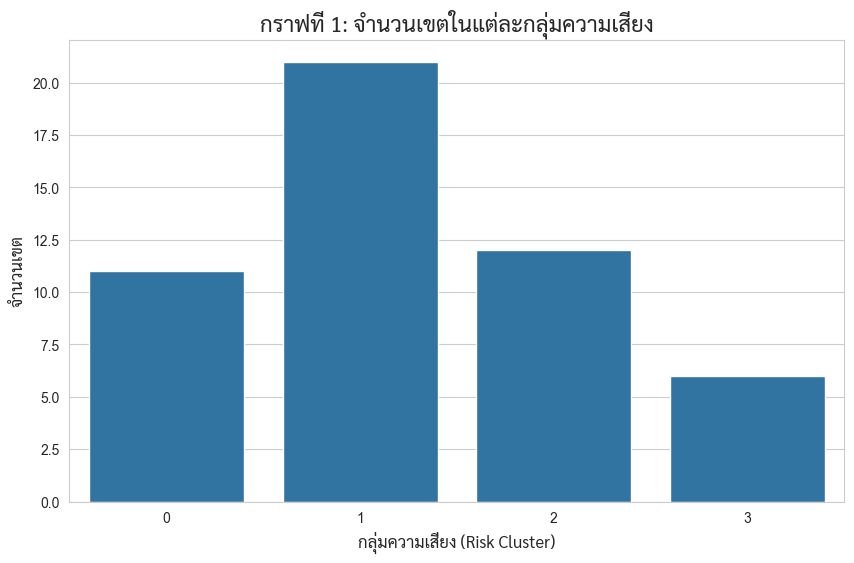

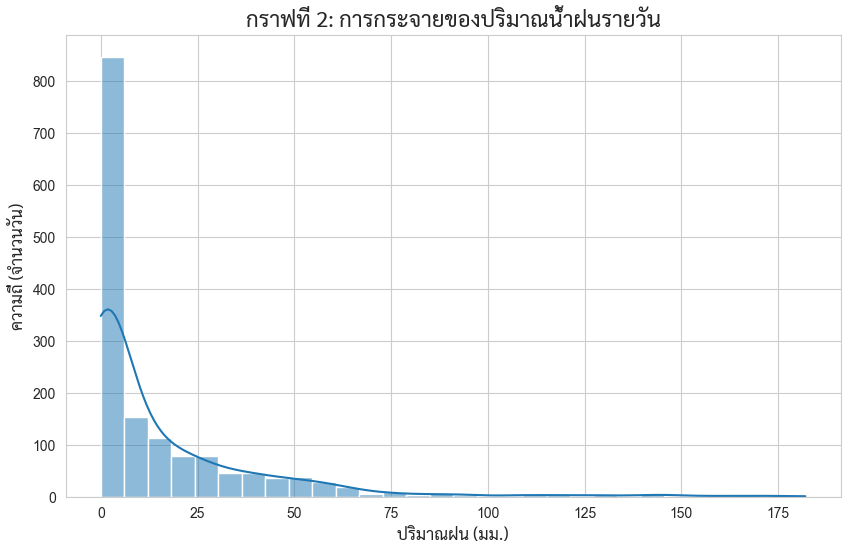

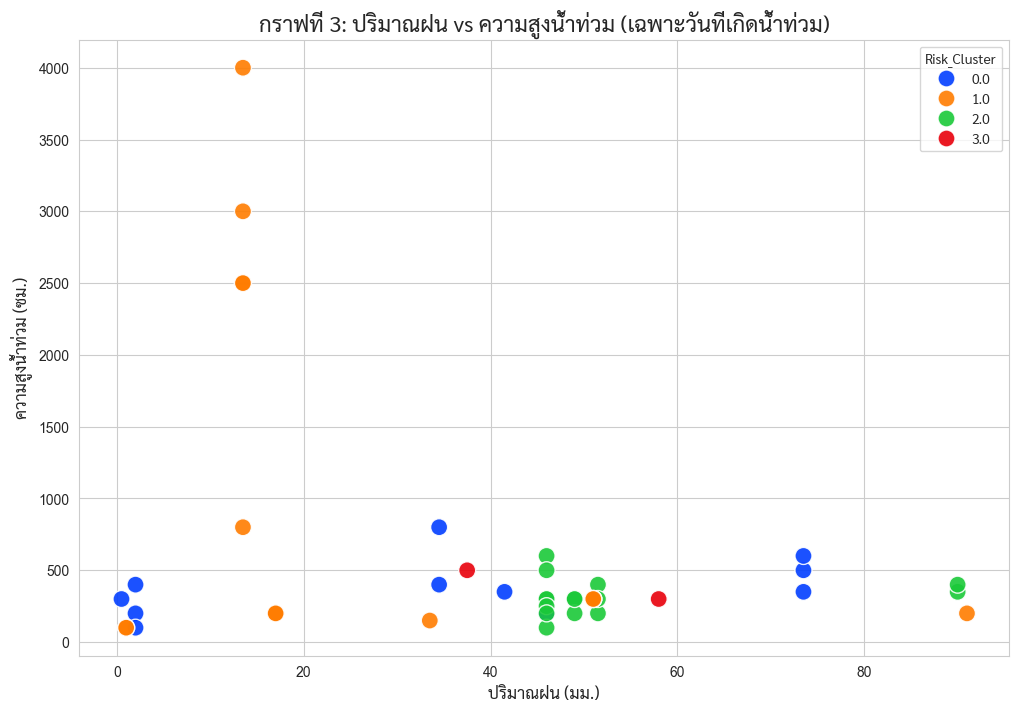

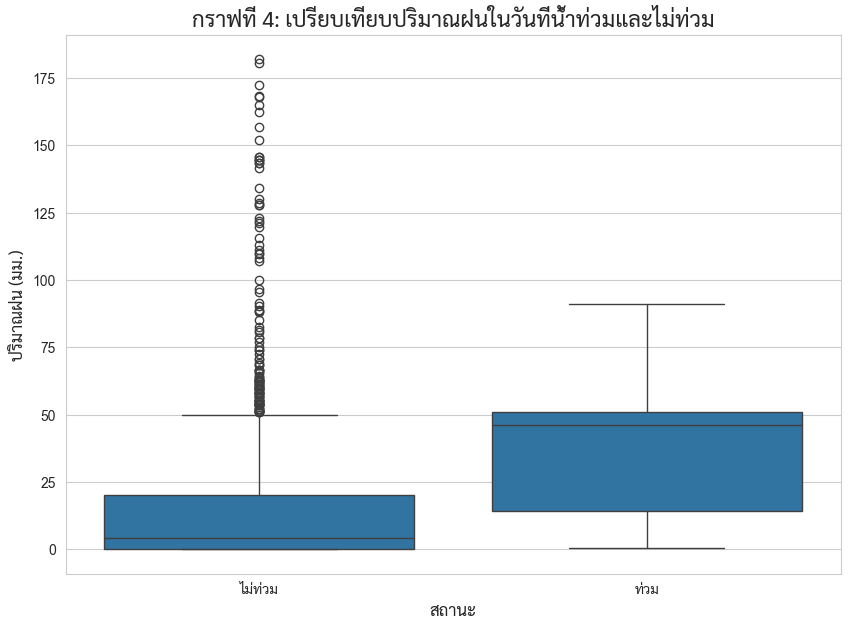

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
import os


FONT_PATH = '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bff515501313f56409358f8994642696000d2dbc.asset/AssetData/Sarabun.ttc' # <--- ตัวอย่างสำหรับ macOS

# สร้าง FontProperties object จาก Path ที่ระบุ
try:
    thai_font_prop = fm.FontProperties(fname=FONT_PATH)
    print(f"โหลดฟอนต์จาก Path: '{FONT_PATH}' สำเร็จ")
except Exception as e:
    print(f"Error: ไม่สามารถโหลดฟอนต์จาก Path ที่ระบุได้: {e}")
    thai_font_prop = None # ใช้ฟอนต์เริ่มต้นถ้าหาไม่เจอ

# --- ⚙️ Configuration & Setup ---
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
print("--- เริ่มต้นกระบวนการสร้างกราฟวิเคราะห์ข้อมูล ---")

# (โค้ดส่วนที่เหลือเหมือนเดิม แต่จะมีการเพิ่ม fontproperties ในส่วนสร้างกราฟ)

# --- Definitions ---
DATA_FOLDER = '../data/RAW/csv'
RAINFALL_FILE_PATH = '../data/RAW/rainfall_2560_10/rainfall_data_month_combined.csv'
FLOOD_EVENTS_FILE_PATH = '../data/RAW/csv/flood_2560.csv'
# ... (ส่วนที่เหลือของโค้ดเหมือนเดิม) ...

def generate_visualizations():
    # --- Phase 1: Create District Profiles (in memory) ---
    print(f"\n--- เฟสที่ 1: กำลังสร้างโปรไฟล์ความเสี่ยงของแต่ละเขต ---")
    # ... (ส่วนนี้เหมือนเดิม) ...
    try:
        districts_df = pd.read_csv(os.path.join(DATA_FOLDER, 'districts.csv'))
        flood_points_df = pd.read_csv(os.path.join(DATA_FOLDER, 'flood_points.csv'))
        pump_stations_df = pd.read_csv(os.path.join(DATA_FOLDER, 'pump_stations.csv'))
        floodgate_df = pd.read_csv(os.path.join(DATA_FOLDER, 'floodgate.csv'))
    except Exception as e:
        print(f"ข้อผิดพลาดในการโหลดไฟล์: {e}")
        return
    district_profiles = districts_df[['dcode', 'dname', 'AREA']].copy().rename(columns={'dname': 'district', 'AREA': 'area_sqkm'})
    district_profiles['district'] = district_profiles['district'].str.replace('เขต', '').str.strip()
    flood_points_count = flood_points_df.groupby('dcode').size().reset_index(name='num_flood_points')
    pump_stations_count = pump_stations_df.groupby('dcode').size().reset_index(name='num_pump_stations')
    floodgate_count = floodgate_df.groupby('dcode').size().reset_index(name='num_floodgates')
    district_profiles = pd.merge(district_profiles, flood_points_count, on='dcode', how='left')
    district_profiles = pd.merge(district_profiles, pump_stations_count, on='dcode', how='left')
    district_profiles = pd.merge(district_profiles, floodgate_count, on='dcode', how='left')
    district_profiles.fillna(0, inplace=True)
    features_for_clustering = ['area_sqkm', 'num_flood_points', 'num_pump_stations', 'num_floodgates']
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(district_profiles[features_for_clustering])
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    district_profiles['Risk_Cluster'] = kmeans.fit_predict(scaled_features)
    print("สร้างโปรไฟล์และจัดกลุ่มเขตสำเร็จ")

    # --- Phase 2: Prepare Training Data (in memory) ---
    print("\n--- เฟสที่ 2: กำลังเตรียมข้อมูลสำหรับสร้างกราฟ ---")
    try:
        rain_df_raw = pd.read_csv(RAINFALL_FILE_PATH)
        flood_df_raw = pd.read_csv(FLOOD_EVENTS_FILE_PATH, header=0)
    except Exception as e:
        print(f"ข้อผิดพลาดในการโหลดไฟล์: {e}")
        return
    rain_df = rain_df_raw.rename(columns={'เขต': 'district', 'ฝน 24 ชม.': 'rainfall_mm', 'วัน-เวลา': 'datetime_str'})
    datetime_str_series = rain_df['datetime_str'].astype(str)
    buddhist_year = pd.to_numeric(datetime_str_series.str[:4], errors='coerce')
    gregorian_year = buddhist_year - 543
    month_day_time = datetime_str_series.str[4:]
    corrected_date_str = gregorian_year.astype(str) + month_day_time
    rain_df['datetime'] = pd.to_datetime(corrected_date_str, errors='coerce')
    rain_df.dropna(subset=['datetime'], inplace=True)
    rain_df['date'] = rain_df['datetime'].dt.date
    rain_df['district'] = rain_df['district'].str.replace('เขต', '').str.strip()
    rain_df = rain_df.groupby(['date', 'district'])['rainfall_mm'].max().reset_index()
    flood_df = flood_df_raw.iloc[:, [1, 5, 12]].copy()
    flood_df.columns = ['district', 'flood_height_cm', 'rainfall_mm_event']
    flood_df['flood_height_cm'] = pd.to_numeric(flood_df['flood_height_cm'], errors='coerce')
    flood_df.dropna(subset=['flood_height_cm'], inplace=True)
    flood_df['date'] = pd.to_datetime('2017-10-14').date()
    flood_df['district'] = flood_df['district'].str.replace('เขต', '').str.strip()
    flood_df = flood_df[['date', 'district', 'flood_height_cm']]
    rain_df['date'] = rain_df['date'].astype(str)
    flood_df['date'] = flood_df['date'].astype(str)
    training_df = pd.merge(rain_df, flood_df, on=['date', 'district'], how='left')
    training_df['flood_height_cm'].fillna(0, inplace=True)
    training_df = pd.merge(training_df, district_profiles[['district', 'Risk_Cluster']], on='district', how='left')
    training_df.dropna(subset=['rainfall_mm', 'Risk_Cluster'], inplace=True)
    print("เตรียมข้อมูลสำหรับสร้างกราฟเสร็จสิ้น")

    # --- Phase 3: Generate Plots (แก้ไขให้ใช้ fontproperties) ---
    print("\n--- เฟสที่ 3: กำลังสร้างกราฟ ---")
    
    # Graph 1
    plt.figure(figsize=(10, 6))
    cluster_counts = district_profiles['Risk_Cluster'].value_counts().sort_index()
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
    plt.title('กราฟที่ 1: จำนวนเขตในแต่ละกลุ่มความเสี่ยง', fontproperties=thai_font_prop, fontsize=16)
    plt.xlabel('กลุ่มความเสี่ยง (Risk Cluster)', fontproperties=thai_font_prop, fontsize=12)
    plt.ylabel('จำนวนเขต', fontproperties=thai_font_prop, fontsize=12)
    plt.savefig('risk_cluster_distribution.png')
    print("บันทึก risk_cluster_distribution.png สำเร็จ")

    # Graph 2
    plt.figure(figsize=(10, 6))
    sns.histplot(training_df['rainfall_mm'], bins=30, kde=True)
    plt.title('กราฟที่ 2: การกระจายของปริมาณน้ำฝนรายวัน', fontproperties=thai_font_prop, fontsize=16)
    plt.xlabel('ปริมาณฝน (มม.)', fontproperties=thai_font_prop, fontsize=12)
    plt.ylabel('ความถี่ (จำนวนวัน)', fontproperties=thai_font_prop, fontsize=12)
    plt.savefig('rainfall_distribution.png')
    print("บันทึก rainfall_distribution.png สำเร็จ")

    # Graph 3
    plt.figure(figsize=(12, 8))
    flooded_data = training_df[training_df['flood_height_cm'] > 0]
    if not flooded_data.empty:
        ax = sns.scatterplot(data=flooded_data, x='rainfall_mm', y='flood_height_cm', hue='Risk_Cluster', palette='bright', s=150, alpha=0.9, legend='full')
        ax.set_title('กราฟที่ 3: ปริมาณฝน vs ความสูงน้ำท่วม (เฉพาะวันที่เกิดน้ำท่วม)', fontproperties=thai_font_prop, fontsize=16)
        ax.set_xlabel('ปริมาณฝน (มม.)', fontproperties=thai_font_prop, fontsize=12)
        ax.set_ylabel('ความสูงน้ำท่วม (ซม.)', fontproperties=thai_font_prop, fontsize=12)
        plt.setp(ax.get_legend().get_texts(), fontproperties=thai_font_prop)
        plt.setp(ax.get_legend().get_title(), fontproperties=thai_font_prop)
        plt.savefig('rainfall_vs_flood_by_cluster.png')
        print("บันทึก rainfall_vs_flood_by_cluster.png สำเร็จ")
    else:
        print("ไม่พบข้อมูลวันที่เกิดน้ำท่วม จึงข้ามการสร้างกราฟที่ 3")

    # Graph 4
    training_df['สถานะน้ำท่วม'] = training_df['flood_height_cm'].apply(lambda x: 'ท่วม' if x > 0 else 'ไม่ท่วม')
    plt.figure(figsize=(10, 7))
    ax = sns.boxplot(data=training_df, x='สถานะน้ำท่วม', y='rainfall_mm')
    ax.set_title('กราฟที่ 4: เปรียบเทียบปริมาณฝนในวันที่น้ำท่วมและไม่ท่วม', fontproperties=thai_font_prop, fontsize=16)
    ax.set_xlabel('สถานะ', fontproperties=thai_font_prop, fontsize=12)
    ax.set_ylabel('ปริมาณฝน (มม.)', fontproperties=thai_font_prop, fontsize=12)
    # ตั้งค่า font ของแกน x
    for label in ax.get_xticklabels():
        label.set_fontproperties(thai_font_prop)
    plt.savefig('rainfall_by_flood_status.png')
    print("บันทึก rainfall_by_flood_status.png สำเร็จ")
    
    print("\n--- สร้างกราฟทั้งหมด 4 รูปและบันทึกเป็นไฟล์ .png เรียบร้อยแล้ว ---")

if __name__ == '__main__':
    generate_visualizations()

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib
import warnings

warnings.filterwarnings('ignore')

# --- 1. โหลดข้อมูลที่เตรียมไว้แล้ว ---
try:
    training_df = pd.read_csv("final_training_data_real.csv")
    profiles_df = pd.read_csv("district_profiles_with_clusters.csv")
    print("โหลดข้อมูลสำหรับเทรนและข้อมูลโปรไฟล์เขตสำเร็จ")
except FileNotFoundError as e:
    print(f"Error: ไม่พบไฟล์ {e.filename} กรุณารันสคริปต์ก่อนหน้านี้เพื่อสร้างไฟล์ก่อน")
    exit()

# --- 2. เทรนโมเดล ---
print("\n--- กำลังเทรนโมเดล ---")
X = training_df[['rainfall_mm', 'Risk_Cluster']]
y = training_df['flood_height_cm']

model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, min_samples_leaf=5)
model.fit(X, y)
print("เทรนโมเดลสำเร็จ!")

# --- 3. สร้างฟังก์ชันสำหรับทำนาย (ฉบับแก้ไข) ---
def predict_flood(district_name, rainfall_mm):
    """
    ฟังก์ชันสำหรับทำนายความสูงของน้ำท่วมจากชื่อเขตและปริมาณน้ำฝน
    """
    try:
        # --- ส่วนที่แก้ไข ---
        # เราจะใช้ district_name ที่รับเข้ามาโดยตรงในการค้นหา
        # เพราะข้อมูลใน profiles_df มีคำว่า "เขต" นำหน้าอยู่แล้ว
        cluster_info = profiles_df[profiles_df['district'] == district_name]
        # --- สิ้นสุดส่วนแก้ไข ---

        if cluster_info.empty:
            print(f"\nError: ไม่พบข้อมูลของเขต '{district_name}'")
            return
        
        risk_cluster = cluster_info['Risk_Cluster'].iloc[0]
        
        input_data = pd.DataFrame({
            'rainfall_mm': [rainfall_mm],
            'Risk_Cluster': [risk_cluster]
        })
        
        predicted_height = model.predict(input_data)
        
        print(f"\n--- ผลการทำนายสำหรับ '{district_name}' ---")
        print(f"ปริมาณฝน: {rainfall_mm} มม.")
        print(f"กลุ่มความเสี่ยงของเขต: {risk_cluster}")
        if predicted_height[0] > 5:
             print(f"ผลลัพธ์: 🟢 คาดการณ์ว่าน้ำจะท่วมสูงประมาณ {predicted_height[0]:.2f} ซม.")
        else:
             print("ผลลัพธ์: ⚪ คาดการณ์ว่าน้ำไม่ท่วม")

    except Exception as e:
        print(f"เกิดข้อผิดพลาด: {e}")

# --- 4. ทดลองใช้โมเดล ---
if __name__ == "__main__":
    # เรียกใช้ฟังก์ชันด้วยชื่อเขตแบบเต็ม
    predict_flood(district_name="เขตจตุจักร", rainfall_mm=40)
    predict_flood(district_name="เขตจตุจักร", rainfall_mm=85)
    predict_flood(district_name="เขตจตุจักร", rainfall_mm=100)

โหลดข้อมูลสำหรับเทรนและข้อมูลโปรไฟล์เขตสำเร็จ

--- กำลังเทรนโมเดล ---
เทรนโมเดลสำเร็จ!

--- ผลการทำนายสำหรับ 'เขตจตุจักร' ---
ปริมาณฝน: 40 มม.
กลุ่มความเสี่ยงของเขต: 0
ผลลัพธ์: 🟢 คาดการณ์ว่าน้ำจะท่วมสูงประมาณ 32.06 ซม.

--- ผลการทำนายสำหรับ 'เขตจตุจักร' ---
ปริมาณฝน: 85 มม.
กลุ่มความเสี่ยงของเขต: 0
ผลลัพธ์: 🟢 คาดการณ์ว่าน้ำจะท่วมสูงประมาณ 124.72 ซม.

--- ผลการทำนายสำหรับ 'เขตจตุจักร' ---
ปริมาณฝน: 100 มม.
กลุ่มความเสี่ยงของเขต: 0
ผลลัพธ์: 🟢 คาดการณ์ว่าน้ำจะท่วมสูงประมาณ 58.56 ซม.


In [30]:
import pandas as pd
import os
import re

# --- 📍 ปรับแก้ Path หลักของข้อมูลที่นี่ที่เดียว ---
BASE_DATA_DIR = '../data'
RAW_DIR = os.path.join(BASE_DATA_DIR, 'RAW')
PROCESSED_DIR = os.path.join(BASE_DATA_DIR, 'processed')

RAIN_INPUT_DIR = os.path.join(RAW_DIR, 'rain_2024')
RISK_INPUT_DIR = RAW_DIR

def process_rainfall_data(input_dir=RAIN_INPUT_DIR, output_dir=PROCESSED_DIR):
    """
    ฟังก์ชันสำหรับรวมและประมวลผลข้อมูลจากไฟล์ Excel รายเดือน (ฉบับแก้ไขสมบูรณ์)
    """
    print(f"--- 1. กำลังประมวลผลข้อมูลปริมาณน้ำฝนจาก: {input_dir} ---")

    if not os.path.exists(input_dir):
        print(f"❌ ไม่พบโฟลเดอร์ '{input_dir}'!")
        return None

    all_excel_files = sorted([
        f for f in os.listdir(input_dir)
        if f.endswith('.xlsx') and not f.startswith('~$')
    ])

    if not all_excel_files:
        print(f"❌ ไม่พบไฟล์ Excel (.xlsx) ที่ถูกต้องในโฟลเดอร์ '{input_dir}'!")
        return None

    print(f"พบไฟล์ Excel ทั้งหมด {len(all_excel_files)} ไฟล์: {all_excel_files}")

    list_of_dfs = []
    for filename in all_excel_files:
        file_path = os.path.join(input_dir, filename)
        try:
            month_match = re.search(r'(\d{2})\.xlsx', filename)
            if not month_match: continue
            month, year = int(month_match.group(1)), 2024

            xls = pd.ExcelFile(file_path)
            for sheet_name in xls.sheet_names:
                day_match = re.search(r'Sheet(\d+)', sheet_name)
                if not day_match: continue
                day = int(day_match.group(1))

                try: date_obj = pd.to_datetime(f"{year}-{month}-{day}")
                except ValueError: continue

                # อ่านข้อมูลโดยยังไม่กำหนด Header เพื่อหาตำแหน่งที่ถูกต้องก่อน
                df_temp = pd.read_excel(xls, sheet_name=sheet_name, header=None)
                
                header_row_index = 0 # ตั้งค่าเริ่มต้น
                found_header = False
                for i, row in df_temp.iterrows():
                    # แปลงทั้งแถวเป็น string เพื่อค้นหา
                    row_str = ' '.join(map(str, row.values))
                    if 'เขต' in row_str and 'ฝน 24 ชม.' in row_str:
                        header_row_index = i
                        found_header = True
                        break

                if not found_header:
                    continue # ถ้าชีตนี้ไม่มี Header ที่ถูกต้อง ให้ข้ามไป

                # อ่านไฟล์อีกครั้งโดยใช้ Header ที่หาเจอ
                df = pd.read_excel(xls, sheet_name=sheet_name, skiprows=header_row_index)
                df.columns = df.columns.str.strip()

                # --- ✨ ส่วนที่แก้ไข: ใช้ชื่อคอลัมน์ที่ถูกต้อง ---
                station_col_name = 'เขต'
                rainfall_col_name = 'ฝน 24 ชม.' # <--- แก้ไขตรงนี้ให้ถูกต้อง

                if station_col_name in df.columns and rainfall_col_name in df.columns:
                    df_selected = df[[station_col_name, rainfall_col_name]].copy()
                    df_selected.columns = ['station_name', 'rainfall_mm']
                    df_selected['date'] = date_obj
                    list_of_dfs.append(df_selected)
        except Exception as e:
            print(f"เกิดข้อผิดพลาดในการอ่านไฟล์ Excel {filename}, ชีต {sheet_name}: {e}")

    if not list_of_dfs:
        print("❌ ไม่สามารถประมวลผลข้อมูลน้ำฝนได้ เพราะไม่พบชีตที่มีคอลัมน์ 'เขต' และ 'ฝน 24 ชม.' ที่ถูกต้องเลย")
        return None

    combined_df = pd.concat(list_of_dfs, ignore_index=True)
    combined_df['rainfall_mm'] = pd.to_numeric(combined_df['rainfall_mm'], errors='coerce').fillna(0)

    print("\nทำความสะอาดและแปลงข้อมูลปริมาณฝนเป็นตัวเลขเรียบร้อยแล้ว")

    combined_df.dropna(subset=['station_name'], inplace=True)
    combined_df = combined_df[~combined_df['station_name'].astype(str).str.contains('เขต|รวม|เฉลี่ย|สูงสุด|ต่ำสุด', na=False)]

    daily_avg_rainfall = combined_df.groupby('date')['rainfall_mm'].mean().reset_index()
    daily_avg_rainfall.rename(columns={'rainfall_mm': 'avg_rainfall_mm'}, inplace=True)

    output_path = os.path.join(output_dir, "daily_rainfall_2024_processed.csv")
    daily_avg_rainfall.to_csv(output_path, index=False)
    print(f"\n✅ ประมวลผลข้อมูลน้ำฝนเสร็จสิ้น! บันทึกไฟล์ที่ '{output_path}'")
    return daily_avg_rainfall

def process_risk_data(input_dir=RISK_INPUT_DIR, output_dir=PROCESSED_DIR):
    """
    ฟังก์ชันสำหรับโหลดข้อมูลความเสี่ยงและรวมกับข้อมูลขนาดพื้นที่
    (ฟังก์ชันนี้ทำงานสมบูรณ์แล้ว ไม่ต้องแก้ไข)
    """
    print(f"\n--- 2. กำลังประมวลผลข้อมูลความเสี่ยงของเขตจาก: {input_dir} ---")
    
    risk_file_path = os.path.join(input_dir, "risk_data.csv")
    area_file_path = os.path.join(input_dir, "csv/districts.csv")

    if not os.path.exists(risk_file_path): return None
    try:
        risk_df = pd.read_csv(risk_file_path)
        
        if os.path.exists(area_file_path):
            area_df = pd.read_csv(area_file_path)
            
            if 'dname' in area_df.columns: area_df.rename(columns={'dname': 'เขต'}, inplace=True)
            if 'เขต' not in area_df.columns: return None
            if 'เขต' not in risk_df.columns: return None

            print("กำลังทำความสะอาดชื่อเขต (ลบ 'เขต' และตัดช่องว่าง)...")
            risk_df['เขต'] = risk_df['เขต'].str.strip()
            area_df['เขต'] = area_df['เขต'].str.replace('เขต', '').str.strip()
            
            risk_df = pd.merge(risk_df, area_df, on='เขต', how='left')
            print(f"รวมข้อมูลขนาดพื้นที่จาก '{area_file_path}' เรียบร้อยแล้ว")
        else:
            print(f"⚠️ ไม่พบไฟล์ขนาดพื้นที่ '{area_file_path}'")

        output_path = os.path.join(output_dir, "district_risk_profile_processed.csv")
        risk_df.to_csv(output_path, index=False)
        print(f"✅ ประมวลผลข้อมูลความเสี่ยงเสร็จสิ้น! บันทึกไฟล์ที่ '{output_path}'")
        return risk_df

    except Exception as e:
        print(f"เกิดข้อผิดพลาดที่ไม่คาดคิดในการประมวลผลข้อมูลความเสี่ยง: {e}")
        return None

# --- รันโค้ด ---
if __name__ == '__main__':
    # ก่อนรันโค้ด อาจต้องติดตั้ง library สำหรับอ่าน Excel
    # ลองรันคำสั่งนี้ใน terminal: pip install openpyxl
    os.makedirs(PROCESSED_DIR, exist_ok=True)
    
    rainfall_data = process_rainfall_data()
    if rainfall_data is not None:
        print("\n**ตัวอย่างข้อมูลน้ำฝนที่ประมวลผลแล้ว:**")
        print(rainfall_data.head())

    risk_data = process_risk_data()
    if risk_data is not None:
        print("\n**ตัวอย่างข้อมูลความเสี่ยงที่ประมวลผลแล้ว:**")
        print(risk_data.head())

--- 1. กำลังประมวลผลข้อมูลปริมาณน้ำฝนจาก: ../data/RAW/rain_2024 ---
พบไฟล์ Excel ทั้งหมด 12 ไฟล์: ['01.xlsx', '02.xlsx', '03.xlsx', '04.xlsx', '05.xlsx', '06.xlsx', '07.xlsx', '08.xlsx', '09.xlsx', '10.xlsx', '11.xlsx', '12.xlsx']

ทำความสะอาดและแปลงข้อมูลปริมาณฝนเป็นตัวเลขเรียบร้อยแล้ว

✅ ประมวลผลข้อมูลน้ำฝนเสร็จสิ้น! บันทึกไฟล์ที่ '../data/processed/daily_rainfall_2024_processed.csv'

**ตัวอย่างข้อมูลน้ำฝนที่ประมวลผลแล้ว:**
        date  avg_rainfall_mm
0 2024-01-01         0.156863
1 2024-01-02         0.205882
2 2024-01-03         0.039216
3 2024-01-04         0.000000
4 2024-01-05         0.000000

--- 2. กำลังประมวลผลข้อมูลความเสี่ยงของเขตจาก: ../data/RAW ---
กำลังทำความสะอาดชื่อเขต (ลบ 'เขต' และตัดช่องว่าง)...
รวมข้อมูลขนาดพื้นที่จาก '../data/RAW/csv/districts.csv' เรียบร้อยแล้ว
✅ ประมวลผลข้อมูลความเสี่ยงเสร็จสิ้น! บันทึกไฟล์ที่ '../data/processed/district_risk_profile_processed.csv'

**ตัวอย่างข้อมูลความเสี่ยงที่ประมวลผลแล้ว:**
   Ranking                เขต  คะแนนรวม  จำนวนจุดเ

In [4]:
import requests
import json
import os

def create_geojson_file():
    """
    ฟังก์ชันสำหรับดาวน์โหลดข้อมูลขอบเขตของกรุงเทพฯ และสร้างเป็นไฟล์ GeoJSON (ฉบับแก้ไขล่าสุด)
    """
    url = "https://raw.githubusercontent.com/apisit/thailand.json/master/thailand.json"
    
    output_folder = '../data/RAW'
    output_path = os.path.join(output_folder, 'bangkok_districts.geojson')

    print(f"--- 🌎 กำลังสร้างไฟล์แผนที่ {output_path} ---")

    try:
        os.makedirs(output_folder, exist_ok=True)
        
        print(f"กำลังดาวน์โหลดข้อมูลจาก: {url}")
        response = requests.get(url)
        response.raise_for_status()
        all_data = response.json()
        print("ดาวน์โหลดข้อมูลสำเร็จ!")

        bangkok_features = []
        for feature in all_data['features']:
            # --- ✨ ส่วนที่แก้ไข: เปลี่ยน "กรุงเทพมหานคร" เป็น "Bangkok" ---
            if feature['properties'].get('pname') == 'Bangkok':
                
                # ปรับแก้ชื่อเขตให้สั้นลง (เช่น 'เขตพระนคร' -> 'พระนคร')
                district_name = feature['properties'].get('dname', '').replace('เขต', '').strip()
                feature['properties']['dname'] = district_name
                bangkok_features.append(feature)
        
        if not bangkok_features:
            print("❌ ไม่พบข้อมูลของกรุงเทพมหานครในไฟล์ที่ดาวน์โหลดมา (ตรวจสอบ key 'pname' และค่า 'Bangkok')")
            return

        bangkok_geojson = {
            "type": "FeatureCollection",
            "features": bangkok_features
        }

        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(bangkok_geojson, f, ensure_ascii=False, indent=2)

        print(f"✅ สร้างไฟล์ '{output_path}' สำเร็จแล้ว!")
        print("ตอนนี้คุณสามารถรัน Dashboard ได้เลย")

    except requests.exceptions.RequestException as e:
        print(f"❌ เกิดข้อผิดพลาดในการดาวน์โหลดข้อมูล: {e}")
    except KeyError as e:
        print(f"❌ เกิดข้อผิดพลาด: ไม่พบ Key ที่ต้องการในข้อมูล JSON -> {e}. โครงสร้างข้อมูลอาจมีการเปลี่ยนแปลง")
    except Exception as e:
        print(f"❌ เกิดข้อผิดพลาดที่ไม่คาดคิด: {e}")

if __name__ == '__main__':
    create_geojson_file()

--- 🌎 กำลังสร้างไฟล์แผนที่ ../data/RAW/bangkok_districts.geojson ---
กำลังดาวน์โหลดข้อมูลจาก: https://raw.githubusercontent.com/apisit/thailand.json/master/thailand.json
ดาวน์โหลดข้อมูลสำเร็จ!
❌ ไม่พบข้อมูลของกรุงเทพมหานครในไฟล์ที่ดาวน์โหลดมา (ตรวจสอบ key 'pname' และค่า 'Bangkok')


In [22]:
import pandas as pd
import os
import time
import calendar
from datetime import datetime
from io import StringIO 

# --- 1. Import Selenium และ Webdriver Manager ---
try:
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import Select, WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.chrome.service import Service as ChromeService
    from webdriver_manager.chrome import ChromeDriverManager
    
    # ตรวจสอบว่ามี pyperclip หรือยัง
    import pyperclip
except ImportError:
    print("="*50)
    print("!!! คำเตือน: ยังไม่ได้ติดตั้ง Library ที่จำเป็น (lxml, pyperclip) !!!")
    print("โปรดรันคำสั่งนี้ใน Terminal หรือ Anaconda Prompt ของคุณ:")
    print("pip install selenium pandas openpyxl webdriver-manager lxml pyperclip")
    print("="*50)
    raise

# --- 2. ตั้งค่าตัวแปรหลัก (แก้ค่าตรงนี้) ---

# ==============================================================
# === ⬇️⬇️⬇️ [สำคัญ] ปรับค่าเดือนและปีตรงนี้ก่อนรัน ⬇️⬇️⬇️ ===

# ใช้ปี ค.ศ. (เช่น 2023 หรือ 2024)
YEAR_TO_SCRAPE = 2023 

# <--- เปลี่ยนค่านี้เพื่อเลือกเดือน (เช่น 1=ม.ค., 2=ก.พ., ... 9=ก.ย.)
MONTH_TO_SCRAPE = 12

# ==============================================================

# โฟลเดอร์ที่จะบันทึกไฟล์
base_path = '../'
OUTPUT_DIR = os.path.join(base_path, 'data', 'RAW', 'rain_2023') # บันทึกที่ rain_2023
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"ปีเป้าหมาย: {YEAR_TO_SCRAPE}, เดือนเป้าหมาย: {MONTH_TO_SCRAPE}")
print(f"จะบันทึกไฟล์ Excel ลงใน: {OUTPUT_DIR}")

# URL เป้าหมาย
url = "https://weather.bangkok.go.th/rain/RainHistory/IndexAllStation"

# --- 3. ฟังก์ชันหลักในการ Scrape ข้อมูล (เวอร์ชันทนทาน) ---

def scrape_bkk_rain_by_month(year, month, output_dir):
    """
    Scrape ข้อมูลฝน 24ชม. (ณ เวลา 00:00) ของทุกวันในเดือนที่กำหนด
    และบันทึกเป็นไฟล์ Excel หนึ่งไฟล์ โดยแบ่ง Sheet ตามวัน
    """
    
    month_str = f"{month:02d}" # '9' -> '09'
    output_filename = os.path.join(output_dir, f"{month_str}.xlsx")
    
    print(f"\n--- 🚀 เริ่มต้นเดือน {month_str} ปี {year} ---")
    
    # 1. หาจำนวนวันในเดือนนั้น
    num_days = calendar.monthrange(year, month)[1]
    print(f"เดือนนี้มี {num_days} วัน")

    # 2. ตั้งค่า Selenium Webdriver
    try:
        service = ChromeService(ChromeDriverManager().install())
        driver = webdriver.Chrome(service=service)
    except Exception as e:
        print(f"[ข้อผิดพลาด] ไม่สามารถเริ่ม Chrome Driver ได้: {e}")
        print("อาจเกิดจาก Chrome อัปเดต หรือปัญหา permission")
        return

    # 3. สร้างไฟล์ Excel Writer
    try:
        with pd.ExcelWriter(output_filename, engine='openpyxl') as writer:
            
            # 4. วนลูปรายวัน
            for day in range(1, num_days + 1):
                day_str = f"{day:02d}" # '1' -> '01'
                
                date_to_select = f"{day_str}/{month_str}/{year}" 
                sheet_name = str(day) # ชื่อ Sheet คือ '1', '2', '3'...
                
                print(f"  -> กำลังดึงข้อมูลวันที่: {date_to_select} (Sheet: {sheet_name})...", end="")

                # --- [เพิ่ม] Retry Loop ---
                success = False
                attempts = 0
                MAX_ATTEMPTS = 3 # ตั้งค่าให้ลองใหม่ 3 ครั้ง

                while not success and attempts < MAX_ATTEMPTS:
                    attempts += 1
                    if attempts > 1:
                        print(f" [ลองใหม่ครั้งที่ {attempts}]...", end="")
                
                    try:
                        # 4.1 เปิดหน้าเว็บ
                        driver.get(url)
                        
                        # 4.2 [เพิ่มเวลารอ] รอ 15 วินาที
                        WebDriverWait(driver, 15).until(
                            EC.presence_of_element_located((By.ID, "datePick"))
                        )

                        # 4.3 กรอกวันที่ (id="datePick")
                        date_input = driver.find_element(By.ID, "datePick")
                        driver.execute_script(f"arguments[0].value = '{date_to_select}';", date_input)

                        # 4.4 กรอกเวลา "00:00" (id="StationTime")
                        time_input = driver.find_element(By.ID, "StationTime")
                        driver.execute_script("arguments[0].value = '00:00';", time_input)
                        
                        # 4.5 เลือก "24 ชม." (id="account", value="8")
                        rain_type_dropdown = Select(driver.find_element(By.ID, "account"))
                        rain_type_dropdown.select_by_value("8") # "8" คือ 24 ชม.

                        # 4.6 [เพิ่มเวลารอ] รอ 15 วินาที
                        search_button_selector = (By.ID, "btnSearch") 
                        WebDriverWait(driver, 15).until(
                            EC.element_to_be_clickable(search_button_selector)
                        )
                        search_button = driver.find_element(*search_button_selector)
                        search_button.click()
                        
                        # 4.7 [เพิ่มเวลารอ] รอ 15 วินาที
                        copy_button_selector = (By.LINK_TEXT, "Copy")
                        WebDriverWait(driver, 15).until(
                            EC.element_to_be_clickable(copy_button_selector)
                        )
                        copy_button = driver.find_element(*copy_button_selector)
                        
                        # 4.8 คลิกปุ่ม Copy
                        copy_button.click()
                        
                        # [เพิ่ม] หยุดรอ 0.5 วินาที ให้ Clipboard ประมวลผล
                        time.sleep(0.5) 
                        
                        # 4.9 อ่านข้อมูลจาก Clipboard ด้วย Pandas
                        df = pd.read_clipboard()

                        # 4.10 บันทึก DataFrame ลงใน Sheet ของ Excel
                        df.to_excel(writer, sheet_name=sheet_name, index=False)
                        print(" [สำเร็จ]")
                        success = True # แจ้งว่าทำสำเร็จแล้ว ให้ออกจาก loop 'while'
                        
                        time.sleep(1.0) # พักก่อนเริ่มวันถัดไป

                    except Exception as e:
                        # ถ้าล้มเหลว (success=False) loop while จะวนกลับมาลองใหม่
                        if attempts == MAX_ATTEMPTS:
                            # ถ้าลองครั้งสุดท้ายแล้วยังพลาด ให้แสดง Error
                            print(f" [ล้มเหลวถาวร] {e}")
                        time.sleep(2) # หยุด 2 วินาทีก่อนลองใหม่
            
            # จบ Loop 'for' (รายวัน)
            
    except Exception as e:
        print(f"[ข้อผิดพลาดร้ายแรง] ไม่สามารถเขียนไฟล์ Excel ได้: {e}")
    finally:
        # 5. ปิดเบราว์เซอร์
        driver.quit()
        print(f"--- ✅ เสร็จสิ้นเดือน {month_str}. บันทึกไฟล์ที่: {output_filename} ---")


# --- 4. รันสคริปต์ (รันครั้งเดียว) ---
print(f"=== 🔔 เริ่มการดึงข้อมูลสำหรับเดือน {MONTH_TO_SCRAPE} ปี {YEAR_TO_SCRAPE} ===")
scrape_bkk_rain_by_month(YEAR_TO_SCRAPE, MONTH_TO_SCRAPE, OUTPUT_DIR)
print(f"\n🎉🎉🎉 ดึงข้อมูลเดือน {MONTH_TO_SCRAPE} เสร็จสิ้น! 🎉🎉🎉")

ปีเป้าหมาย: 2023, เดือนเป้าหมาย: 12
จะบันทึกไฟล์ Excel ลงใน: ../data/RAW/rain_2023
=== 🔔 เริ่มการดึงข้อมูลสำหรับเดือน 12 ปี 2023 ===

--- 🚀 เริ่มต้นเดือน 12 ปี 2023 ---
เดือนนี้มี 31 วัน
  -> กำลังดึงข้อมูลวันที่: 01/12/2023 (Sheet: 1)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 02/12/2023 (Sheet: 2)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 03/12/2023 (Sheet: 3)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 04/12/2023 (Sheet: 4)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 05/12/2023 (Sheet: 5)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 06/12/2023 (Sheet: 6)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 07/12/2023 (Sheet: 7)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 08/12/2023 (Sheet: 8)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 09/12/2023 (Sheet: 9)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 10/12/2023 (Sheet: 10)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 11/12/2023 (Sheet: 11)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 12/12/2023 (Sheet: 12)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 13/12/2023 (Sheet: 13)... [สำเร็จ]
  -> กำลังดึงข้อ

In [17]:
import pandas as pd
import os
import time
import calendar
from datetime import datetime
from io import StringIO 

# --- 1. Import Selenium และ Webdriver Manager ---
try:
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import Select, WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.chrome.service import Service as ChromeService
    from webdriver_manager.chrome import ChromeDriverManager
    
    # ตรวจสอบว่ามี pyperclip หรือยัง
    import pyperclip
except ImportError:
    print("="*50)
    print("!!! คำเตือน: ยังไม่ได้ติดตั้ง Library ที่จำเป็น (lxml, pyperclip) !!!")
    print("โปรดรันคำสั่งนี้ใน Terminal หรือ Anaconda Prompt ของคุณ:")
    print("pip install selenium pandas openpyxl webdriver-manager lxml pyperclip")
    print("="*50)
    raise

# --- 2. ตั้งค่าตัวแปรหลัก (แก้ค่าตรงนี้) ---

# ==============================================================
# === ⬇️⬇️⬇️ ตั้งค่าปีเป้าหมาย (ค.ศ.) ⬇️⬇️⬇️ ===

YEAR_TO_SCRAPE = 2023 

# ==============================================================

# [แก้ไข] โฟลเดอร์ที่จะบันทึกไฟล์
base_path = '../'
OUTPUT_DIR = os.path.join(base_path, 'data', 'RAW', 'rain_2023')
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"ปีเป้าหมาย: {YEAR_TO_SCRAPE}")
print(f"จะบันทึกไฟล์ Excel ทั้ง 12 เดือน ลงใน: {OUTPUT_DIR}")

# URL เป้าหมาย
url = "https://weather.bangkok.go.th/rain/RainHistory/IndexAllStation"

# --- 3. ฟังก์ชันหลักในการ Scrape ข้อมูล (ไม่ต้องแก้ไข) ---

def scrape_bkk_rain_by_month(year, month, output_dir):
    """
    Scrape ข้อมูลฝน 24ชม. (ณ เวลา 00:00) ของทุกวันในเดือนที่กำหนด
    และบันทึกเป็นไฟล์ Excel หนึ่งไฟล์ โดยแบ่ง Sheet ตามวัน
    """
    
    month_str = f"{month:02d}" # '1' -> '01'
    output_filename = os.path.join(output_dir, f"{month_str}.xlsx")
    
    print(f"\n--- 🚀 เริ่มต้นเดือน {month_str} ปี {year} ---")
    
    # 1. หาจำนวนวันในเดือนนั้น
    num_days = calendar.monthrange(year, month)[1]
    print(f"เดือนนี้มี {num_days} วัน")

    # 2. ตั้งค่า Selenium Webdriver
    try:
        service = ChromeService(ChromeDriverManager().install())
        driver = webdriver.Chrome(service=service)
    except Exception as e:
        print(f"[ข้อผิดพลาด] ไม่สามารถเริ่ม Chrome Driver ได้: {e}")
        print("อาจเกิดจาก Chrome อัปเดต หรือปัญหา permission")
        return

    # 3. สร้างไฟล์ Excel Writer
    try:
        with pd.ExcelWriter(output_filename, engine='openpyxl') as writer:
            
            # 4. วนลูปรายวัน
            for day in range(1, num_days + 1):
                day_str = f"{day:02d}" # '1' -> '01'
                
                date_to_select = f"{day_str}/{month_str}/{year}" 
                sheet_name = str(day) # ชื่อ Sheet คือ '1', '2', '3'...
                
                print(f"  -> กำลังดึงข้อมูลวันที่: {date_to_select} (Sheet: {sheet_name})...", end="")

                try:
                    # 4.1 เปิดหน้าเว็บ
                    driver.get(url)
                    
                    # 4.2 รอให้หน้าเว็บโหลดสมบูรณ์ (รอ id="datePick")
                    WebDriverWait(driver, 10).until(
                        EC.presence_of_element_located((By.ID, "datePick"))
                    )

                    # 4.3 กรอกวันที่ (id="datePick")
                    date_input = driver.find_element(By.ID, "datePick")
                    driver.execute_script(f"arguments[0].value = '{date_to_select}';", date_input)

                    # 4.4 กรอกเวลา "00:00" (id="StationTime")
                    time_input = driver.find_element(By.ID, "StationTime")
                    driver.execute_script("arguments[0].value = '00:00';", time_input)
                    
                    # 4.5 เลือก "24 ชม." (id="account", value="8")
                    rain_type_dropdown = Select(driver.find_element(By.ID, "account"))
                    rain_type_dropdown.select_by_value("8") # "8" คือ 24 ชม.

                    # 4.6 รอจนกว่าปุ่ม "ค้นหา" (id="btnSearch") จะพร้อมให้คลิกได้
                    search_button_selector = (By.ID, "btnSearch") 
                    WebDriverWait(driver, 10).until(
                        EC.element_to_be_clickable(search_button_selector)
                    )
                    search_button = driver.find_element(*search_button_selector)
                    search_button.click()
                    
                    # 4.7 รอให้ปุ่ม "Copy" (ที่มี text 'Copy') โหลดขึ้นมาและคลิกได้
                    copy_button_selector = (By.LINK_TEXT, "Copy")
                    WebDriverWait(driver, 10).until(
                        EC.element_to_be_clickable(copy_button_selector)
                    )
                    copy_button = driver.find_element(*copy_button_selector)
                    
                    # 4.8 คลิกปุ่ม Copy
                    copy_button.click()
                    
                    # 4.9 อ่านข้อมูลจาก Clipboard ด้วย Pandas
                    df = pd.read_clipboard()

                    # 4.10 บันทึก DataFrame ลงใน Sheet ของ Excel
                    df.to_excel(writer, sheet_name=sheet_name, index=False)
                    print(" [สำเร็จ]")
                    
                    # พัก 1.5 วินาที เพื่อไม่ให้โหลดเว็บเร็วเกินไป
                    time.sleep(1.5) 

                except Exception as e:
                    print(f" [ล้มเหลว] เกิดข้อผิดพลาด: {e}")
                    time.sleep(1) # พักก่อนลองวันถัดไป

    except Exception as e:
        print(f"[ข้อผิดพลาดร้ายแรง] ไม่สามารถเขียนไฟล์ Excel ได้: {e}")
    finally:
        # 5. ปิดเบราว์เซอร์
        driver.quit()
        print(f"--- ✅ เสร็จสิ้นเดือน {month_str}. บันทึกไฟล์ที่: {output_filename} ---")


# --- 4. รันสคริปต์ (แก้ไข - ใช้วนลูป) ---
# วนลูปทั้ง 12 เดือนของปีที่กำหนด
print(f"=== 🔔 เริ่มการดึงข้อมูลสำหรับปี {YEAR_TO_SCRAPE} ===")
for m in range(1, 13): # วนลูป 12 เดือน (1 ถึง 12)
    scrape_bkk_rain_by_month(YEAR_TO_SCRAPE, m, OUTPUT_DIR)

print(f"\n🎉🎉🎉 ดึงข้อมูลครบทั้ง 12 เดือน (ปี {YEAR_TO_SCRAPE}) เสร็จสิ้น! 🎉🎉🎉")

ปีเป้าหมาย: 2023
จะบันทึกไฟล์ Excel ทั้ง 12 เดือน ลงใน: ../data/RAW/rain_2023
=== 🔔 เริ่มการดึงข้อมูลสำหรับปี 2023 ===

--- 🚀 เริ่มต้นเดือน 01 ปี 2023 ---
เดือนนี้มี 31 วัน
  -> กำลังดึงข้อมูลวันที่: 01/01/2023 (Sheet: 1)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 02/01/2023 (Sheet: 2)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 03/01/2023 (Sheet: 3)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 04/01/2023 (Sheet: 4)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 05/01/2023 (Sheet: 5)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 06/01/2023 (Sheet: 6)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 07/01/2023 (Sheet: 7)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 08/01/2023 (Sheet: 8)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 09/01/2023 (Sheet: 9)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 10/01/2023 (Sheet: 10)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 11/01/2023 (Sheet: 11)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 12/01/2023 (Sheet: 12)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 13/01/2023 (Sheet: 13)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 14/

In [18]:
import pandas as pd
import os
import time
import calendar
from datetime import datetime
from io import StringIO 

# --- 1. Import Selenium และ Webdriver Manager ---
try:
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import Select, WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.chrome.service import Service as ChromeService
    from webdriver_manager.chrome import ChromeDriverManager
    import pyperclip
except ImportError:
    print("="*50)
    print("!!! คำเตือน: ยังไม่ได้ติดตั้ง Library ที่จำเป็น (lxml, pyperclip) !!!")
    print("โปรดรันคำสั่งนี้ใน Terminal หรือ Anaconda Prompt ของคุณ:")
    print("pip install selenium pandas openpyxl webdriver-manager lxml pyperclip")
    print("="*50)
    raise

# --- 2. ตั้งค่าตัวแปรหลัก (แก้ค่าตรงนี้) ---

# ==============================================================
# === ⬇️⬇️⬇️ ตั้งค่าปีเป้าหมาย (ค.ศ.) ⬇️⬇️⬇️ ===

YEAR_TO_SCRAPE = 2023 

# ==============================================================

# โฟลเดอร์ที่จะบันทึกไฟล์
base_path = '../'
OUTPUT_DIR = os.path.join(base_path, 'data', 'RAW', 'rain_2023')
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"ปีเป้าหมาย: {YEAR_TO_SCRAPE}")
print(f"จะบันทึกไฟล์ Excel ทั้ง 12 เดือน ลงใน: {OUTPUT_DIR}")

# URL เป้าหมาย
url = "https://weather.bangkok.go.th/rain/RainHistory/IndexAllStation"

# --- 3. ฟังก์ชันหลักในการ Scrape ข้อมูล (อัปเดต ID แล้ว) ---

def scrape_bkk_rain_by_month(year, month, output_dir):
    """
    Scrape ข้อมูลฝน 24ชม. (ณ เวลา 00:00) ของทุกวันในเดือนที่กำหนด
    และบันทึกเป็นไฟล์ Excel หนึ่งไฟล์ โดยแบ่ง Sheet ตามวัน
    """
    
    month_str = f"{month:02d}" # '1' -> '01'
    output_filename = os.path.join(output_dir, f"{month_str}.xlsx")
    
    print(f"\n--- 🚀 เริ่มต้นเดือน {month_str} ปี {year} ---")
    
    # 1. หาจำนวนวันในเดือนนั้น
    num_days = calendar.monthrange(year, month)[1]
    print(f"เดือนนี้มี {num_days} วัน")

    # 2. ตั้งค่า Selenium Webdriver
    try:
        service = ChromeService(ChromeDriverManager().install())
        driver = webdriver.Chrome(service=service)
    except Exception as e:
        print(f"[ข้อผิดพลาด] ไม่สามารถเริ่ม Chrome Driver ได้: {e}")
        print("อาจเกิดจาก Chrome อัปเดต หรือปัญหา permission")
        return

    # 3. สร้างไฟล์ Excel Writer
    try:
        with pd.ExcelWriter(output_filename, engine='openpyxl') as writer:
            
            # 4. วนลูปรายวัน
            for day in range(1, num_days + 1):
                day_str = f"{day:02d}" # '1' -> '01'
                
                date_to_select = f"{day_str}/{month_str}/{year}" 
                sheet_name = str(day) # ชื่อ Sheet คือ '1', '2', '3'...
                
                print(f"  -> กำลังดึงข้อมูลวันที่: {date_to_select} (Sheet: {sheet_name})...", end="")

                # --- [แก้ไข] เพิ่ม Retry Loop ---
                success = False
                attempts = 0
                MAX_ATTEMPTS = 3 # ตั้งค่าให้ลองใหม่ 3 ครั้ง

                while not success and attempts < MAX_ATTEMPTS:
                    attempts += 1
                    if attempts > 1:
                        print(f" [ลองใหม่ครั้งที่ {attempts}]...", end="")
                
                    try:
                        # 4.1 เปิดหน้าเว็บ
                        driver.get(url)
                        
                        # 4.2 [แก้ไข] เพิ่มเวลารอเป็น 15 วินาที
                        WebDriverWait(driver, 15).until(
                            EC.presence_of_element_located((By.ID, "datePick"))
                        )

                        # 4.3 กรอกวันที่ (id="datePick")
                        date_input = driver.find_element(By.ID, "datePick")
                        driver.execute_script(f"arguments[0].value = '{date_to_select}';", date_input)

                        # 4.4 กรอกเวลา "00:00" (id="StationTime")
                        time_input = driver.find_element(By.ID, "StationTime")
                        driver.execute_script("arguments[0].value = '00:00';", time_input)
                        
                        # 4.5 เลือก "24 ชม." (id="account", value="8")
                        rain_type_dropdown = Select(driver.find_element(By.ID, "account"))
                        rain_type_dropdown.select_by_value("8") # "8" คือ 24 ชม.

                        # 4.6 [แก้ไข] เพิ่มเวลารอเป็น 15 วินาที
                        search_button_selector = (By.ID, "btnSearch") 
                        WebDriverWait(driver, 15).until(
                            EC.element_to_be_clickable(search_button_selector)
                        )
                        search_button = driver.find_element(*search_button_selector)
                        search_button.click()
                        
                        # 4.7 [แก้ไข] เพิ่มเวลารอเป็น 15 วินาที
                        copy_button_selector = (By.LINK_TEXT, "Copy")
                        WebDriverWait(driver, 15).until(
                            EC.element_to_be_clickable(copy_button_selector)
                        )
                        copy_button = driver.find_element(*copy_button_selector)
                        
                        # 4.8 คลิกปุ่ม Copy
                        copy_button.click()
                        
                        # [เพิ่ม] หยุดรอ 0.5 วินาที ให้ Clipboard ประมวลผล
                        time.sleep(0.5) 
                        
                        # 4.9 อ่านข้อมูลจาก Clipboard ด้วย Pandas
                        df = pd.read_clipboard()

                        # 4.10 บันทึก DataFrame ลงใน Sheet ของ Excel
                        df.to_excel(writer, sheet_name=sheet_name, index=False)
                        print(" [สำเร็จ]")
                        success = True # แจ้งว่าทำสำเร็จแล้ว ให้ออกจาก loop 'while'
                        
                        time.sleep(1.0) # พักก่อนเริ่มวันถัดไป

                    except Exception as e:
                        # ถ้าล้มเหลว (success=False) loop while จะวนกลับมาลองใหม่
                        if attempts == MAX_ATTEMPTS:
                            # ถ้าลองครั้งสุดท้ายแล้วยังพลาด ให้แสดง Error
                            print(f" [ล้มเหลวถาวร] {e}")
                        time.sleep(2) # หยุด 2 วินาทีก่อนลองใหม่
            
            # จบ Loop 'for' (รายวัน)
            
    except Exception as e:
        print(f"[ข้อผิดพลาดร้ายแรง] ไม่สามารถเขียนไฟล์ Excel ได้: {e}")
    finally:
        # 5. ปิดเบราว์เซอร์
        driver.quit()
        print(f"--- ✅ เสร็จสิ้นเดือน {month_str}. บันทึกไฟล์ที่: {output_filename} ---")


# --- 4. รันสคริปต์ (วนลูป 12 เดือน) ---
print(f"=== 🔔 เริ่มการดึงข้อมูลสำหรับปี {YEAR_TO_SCRAPE} ===")
for m in range(1, 13): # วนลูป 12 เดือน (1 ถึง 12)
    scrape_bkk_rain_by_month(YEAR_TO_SCRAPE, m, OUTPUT_DIR)

print(f"\n🎉🎉🎉 ดึงข้อมูลครบทั้ง 12 เดือน (ปี {YEAR_TO_SCRAPE}) เสร็จสิ้น! 🎉🎉🎉")

ปีเป้าหมาย: 2023
จะบันทึกไฟล์ Excel ทั้ง 12 เดือน ลงใน: ../data/RAW/rain_2023
=== 🔔 เริ่มการดึงข้อมูลสำหรับปี 2023 ===

--- 🚀 เริ่มต้นเดือน 01 ปี 2023 ---
เดือนนี้มี 31 วัน
  -> กำลังดึงข้อมูลวันที่: 01/01/2023 (Sheet: 1)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 02/01/2023 (Sheet: 2)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 03/01/2023 (Sheet: 3)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 04/01/2023 (Sheet: 4)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 05/01/2023 (Sheet: 5)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 06/01/2023 (Sheet: 6)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 07/01/2023 (Sheet: 7)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 08/01/2023 (Sheet: 8)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 09/01/2023 (Sheet: 9)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 10/01/2023 (Sheet: 10)... [ลองใหม่ครั้งที่ 2]... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 11/01/2023 (Sheet: 11)... [สำเร็จ]
  -> กำลังดึงข้อมูลวันที่: 12/01/2023 (Sheet: 12)... [ลองใหม่ครั้งที่ 2]... [ลองใหม่ครั้งที่ 3]... [สำเร็จ]
  -> กำลังดึงข้อมูลวันท